# Random Forest

Normalmente, ao criar um modelo, passamos pelo processo de escolha de um algoritmo específico que será utilizado para treinar nosso modelo, porém, em alguns casos é difícil definir qual é o melhor modelo para o seu caso.
O Random Forest, consiste em um algoritmo conhecido por ser uma "floresta" de algoritmos, uma vez que ele tem a capacidade de combinar, de forma aleatória, uma variedade de algoritmos. Por padrão, o Random Forest utiliza diversas árvores de decisão para chegar ao resultado, porém ele não se limita a árvores de decisão, uma vez que ele tem capacidade para treinar o modelo com diversos algoritmos ao mesmo tempo, como o KNN ou regressão linear.

Este arquivo, segue o passo-a-passo, visando utilizar o algoritmo Random Forest para prever qual time será o vencedor da partida, ou se haverá empate.

Passo-a-passo:
1. Importação das bibliotecas necessárias
2. Carregar os datasets
3. Definir os dados utilizados para treinar o algoritmo
4. Treinar o algoritmo
5. Calcular a acurácia do modelo
6. Plotar o gráfico de barras da comparação entre respotas corretas e respostas previstas
7. Plotar o gráfico indicando os pesos
8. Plotar a matriz de confusão

In [8]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import unicodedata

In [9]:
# Função para remover acentos
def remove_acentos(text):
    return ''.join(
        char for char in unicodedata.normalize('NFD', text)
        if unicodedata.category(char)!='Mn'
)

In [10]:
# Carregar os datasets

ds_matches = pd.read_csv("../assets/BRA.csv", sep=",")
ds_teams1 = pd.read_csv("../assets/teams.csv", sep=",")
ds_teams2 = pd.read_csv("../assets/brazil-serie-a-teams2-2024-to-2024-stats (1).csv", sep=",")

ds_matches.rename(
  columns = {
    'Home': 'home_team_name', 
    'Away': 'away_team_name',
    'HG': 'home_team_goal_count',
    'AG': 'away_team_goal_count'
  }, inplace = True
)

ds_matches['formated_date'] = pd.to_datetime(ds_matches['Date'], format='%d/%m/%Y')
ds_matches = ds_matches.query('formated_date >= "2024-04-01"')

# Aplicar a função a uma coluna específica (ex: 'nome')
ds_matches['home_team_name'] = ds_matches['home_team_name'].apply(remove_acentos)
ds_matches['away_team_name'] = ds_matches['away_team_name'].apply(remove_acentos)
ds_teams1['common_name'] = ds_teams1['common_name'].apply(remove_acentos)
ds_teams2['common_name'] = ds_teams2['common_name'].apply(remove_acentos)

In [11]:
# Responsável pegar os dados dos times e das partidas e juntar em um novo dataset

data = []
count = 0;
for index, curr_match in ds_matches.iterrows():
  
  home_team_goals = curr_match.home_team_goal_count

  confrontation = {"winner": 0}
  if(curr_match.home_team_goal_count > curr_match.away_team_goal_count):
    confrontation = {"winner": 1}
  elif(curr_match.home_team_goal_count < curr_match.away_team_goal_count):
    confrontation = {"winner": 2}

  away_data = ds_teams1.query('common_name == "{}"'.format(curr_match.away_team_name)).drop(
    columns=['team_name', 'season',	'country'])
  
  home_data = ds_teams1.query('common_name == "{}"'.format(curr_match.home_team_name)).drop(
    columns=['team_name', 'season',	'country'])

  away_data = away_data.rename(columns=lambda col: f'{col}_a')
  home_data = home_data.rename(columns=lambda col: f'{col}_h')

  confrontation.update(home_data.iloc[0].to_dict())
  confrontation.update(away_data.iloc[0].to_dict())
  
  data.append(confrontation)

data = pd.DataFrame(data)
data.to_csv('./teams_confrontations.csv', index=False)


In [5]:
# Determinar qual time tem mais chance de ganhar uma partida

# Lista de tabelas utilizadas para treinar o modelo
selected_tables = [
    'matches_played_a', 'matches_played_h',
    'wins_h', 'wins_a',
    'draws_h', 'draws_a',
    'losses_h', 'losses_a',
    'points_per_game_h', 'points_per_game_a',
    'league_position_h', 'league_position_a',
    'goals_scored_h', 'goals_scored_a',
    'goals_conceded_h', 'goals_conceded_a',
    'minutes_per_goal_scored_h', 'minutes_per_goal_scored_a',
    'btts_count_h', 'btts_count_a',
    'shots_h', 'shots_a',
    'shots_on_target_h', 'shots_on_target_a',
    'shots_off_target_h', 'shots_off_target_a',
    'first_team_to_score_percentage_h', 'first_team_to_score_percentage_a',
    'fouls_h', 'fouls_a',
    'cards_per_match_h', 'cards_per_match_a'
]

x = data[selected_tables]
y = data['winner']

In [6]:
# Identificação de outliers
print("Média: ", np.mean(x))
print("Desvio padrão: ", np.std(x))

Média:  31.893754280821916
Desvio padrão:  matches_played_a                     0.702187
matches_played_h                     0.706332
wins_h                               1.459231
wins_a                               1.485542
draws_h                              1.072719
draws_a                              1.047346
losses_h                             1.931825
losses_a                             1.934209
points_per_game_h                    0.489341
points_per_game_a                    0.495982
league_position_h                    5.770255
league_position_a                    5.829557
goals_scored_h                       3.138099
goals_scored_a                       3.137123
goals_conceded_h                     4.232741
goals_conceded_a                     4.209753
minutes_per_goal_scored_h           25.249025
minutes_per_goal_scored_a           25.189676
btts_count_h                         1.753401
btts_count_a                         1.728683
shots_h                             1

c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


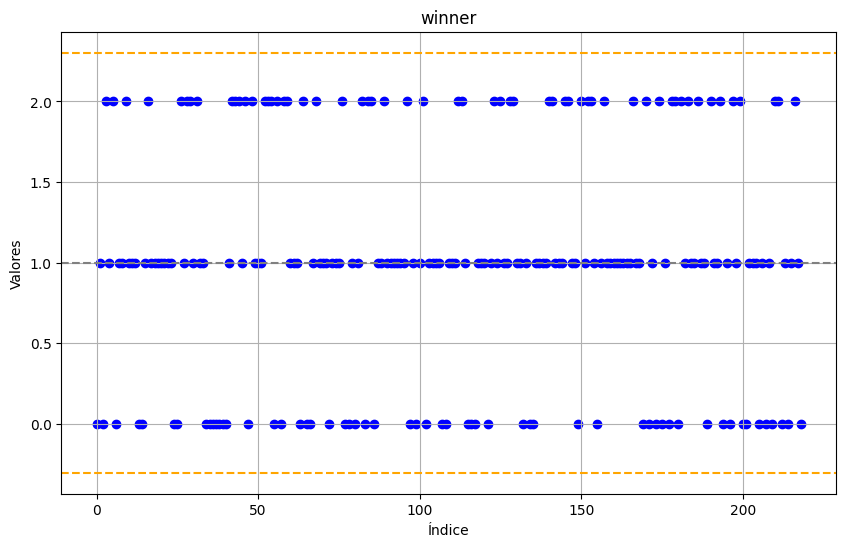

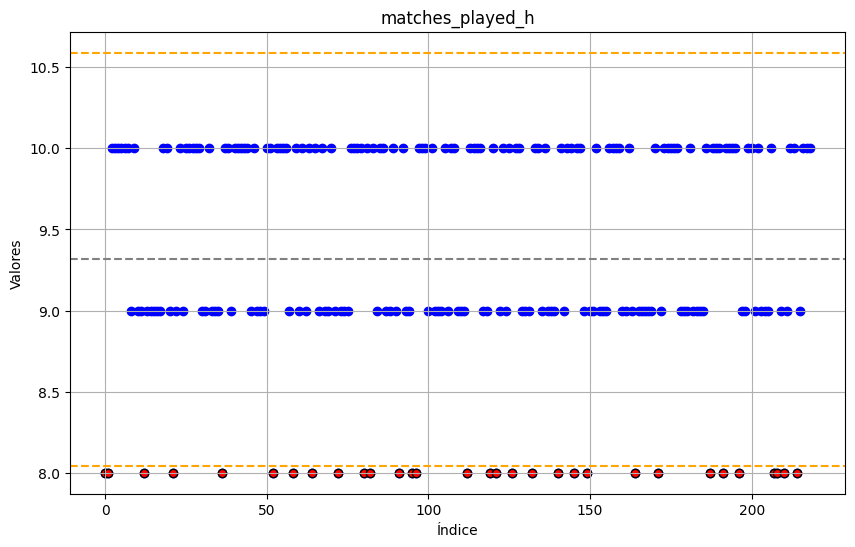

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.315068493150685' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


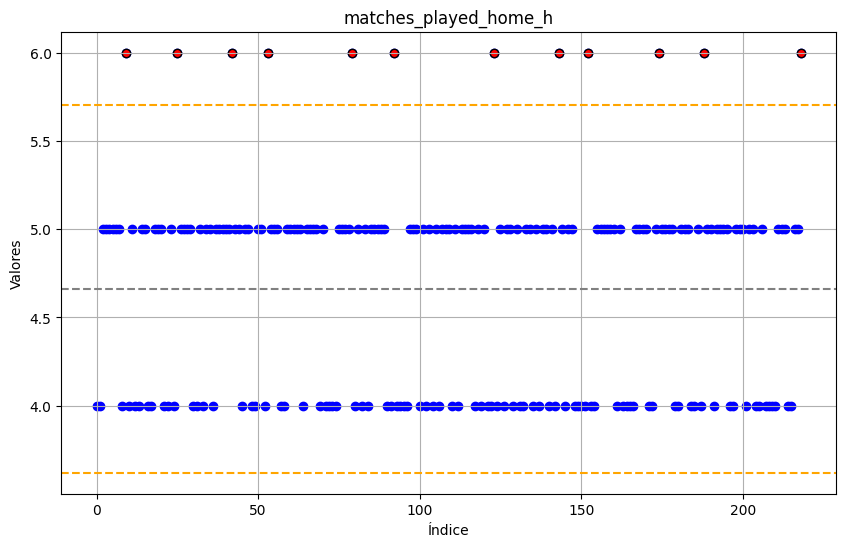

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.662100456621005' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


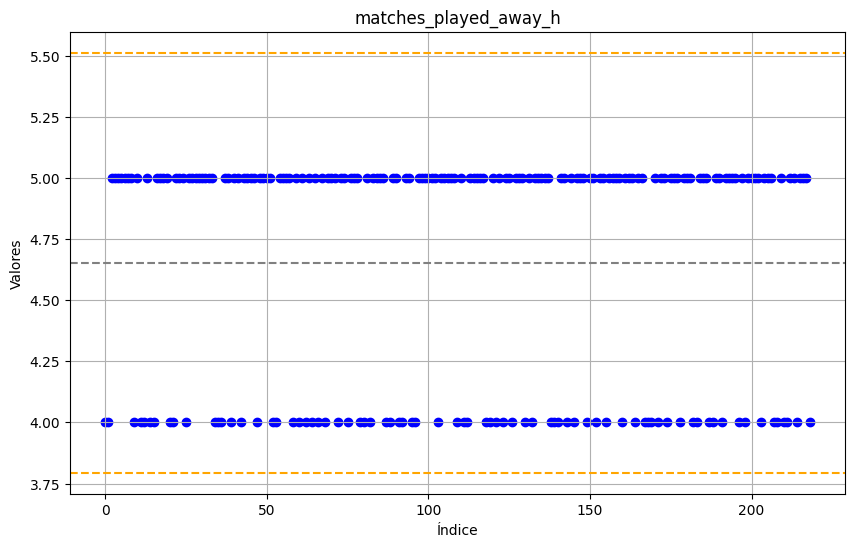

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.65296803652968' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


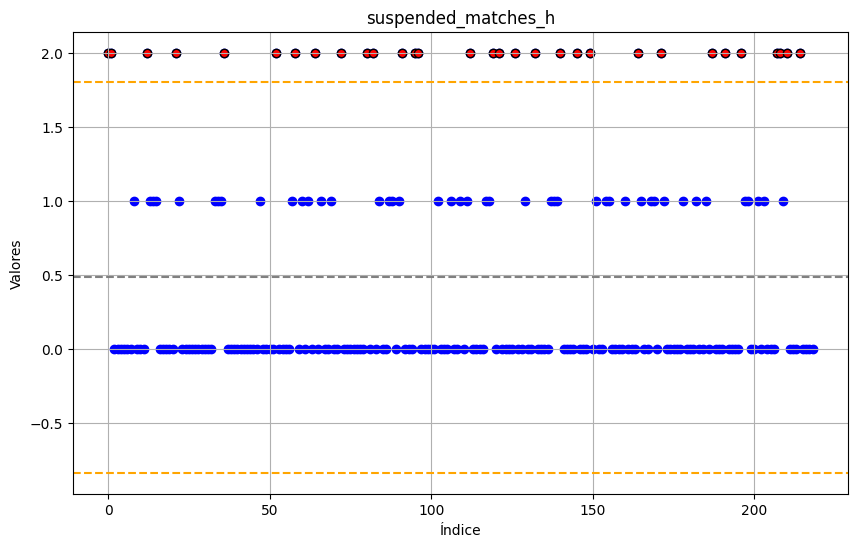

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4840182648401826' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


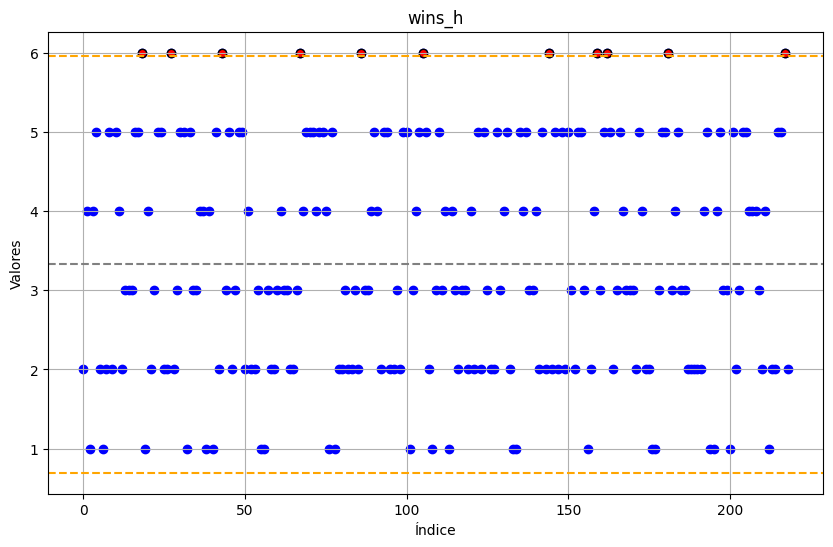

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.328767123287671' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


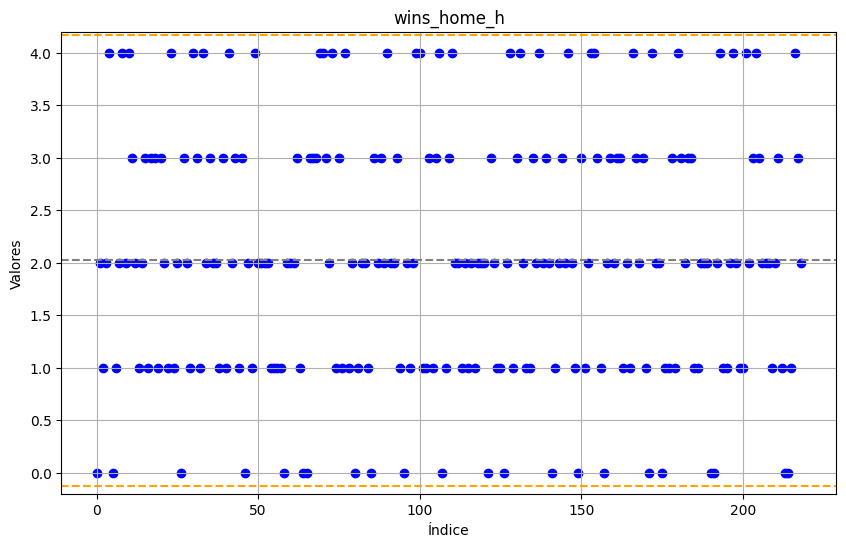

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0228310502283104' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


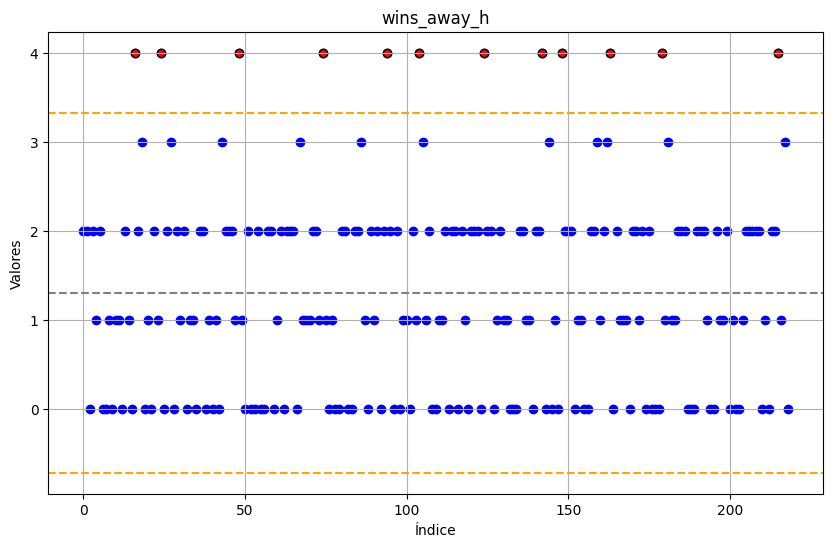

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3059360730593608' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


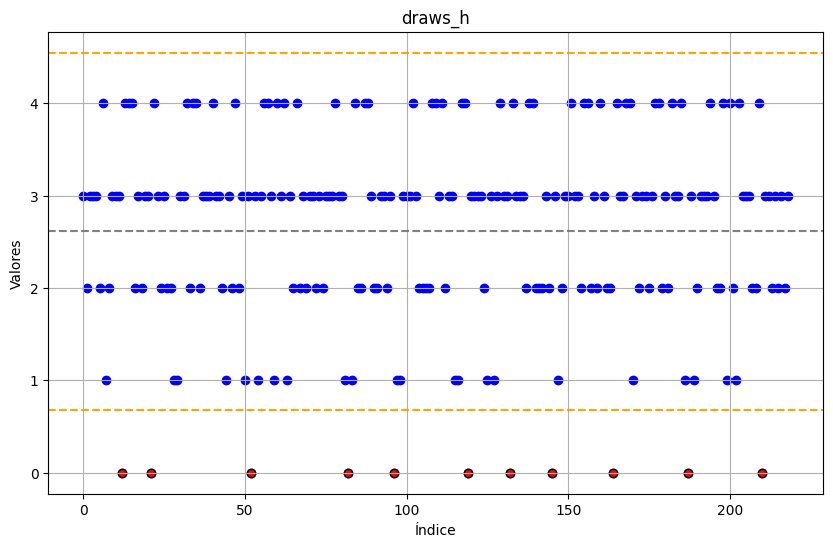

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6118721461187215' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


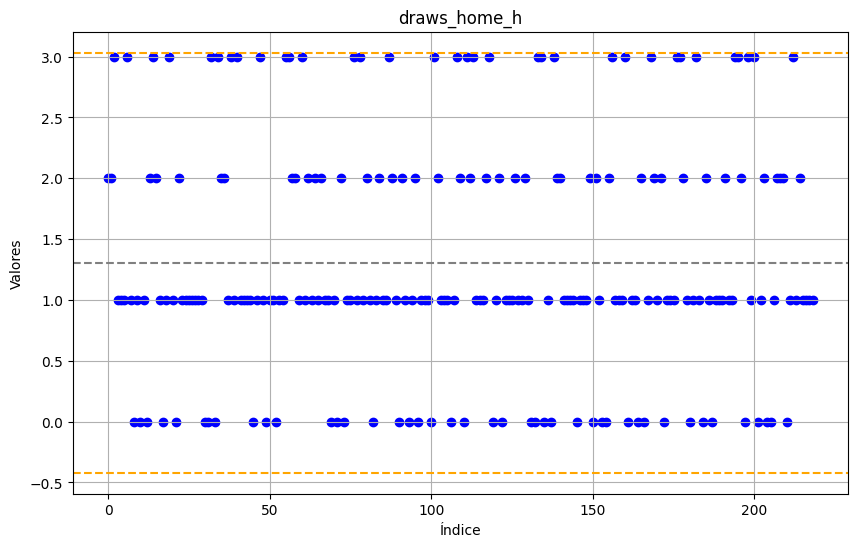

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3059360730593608' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


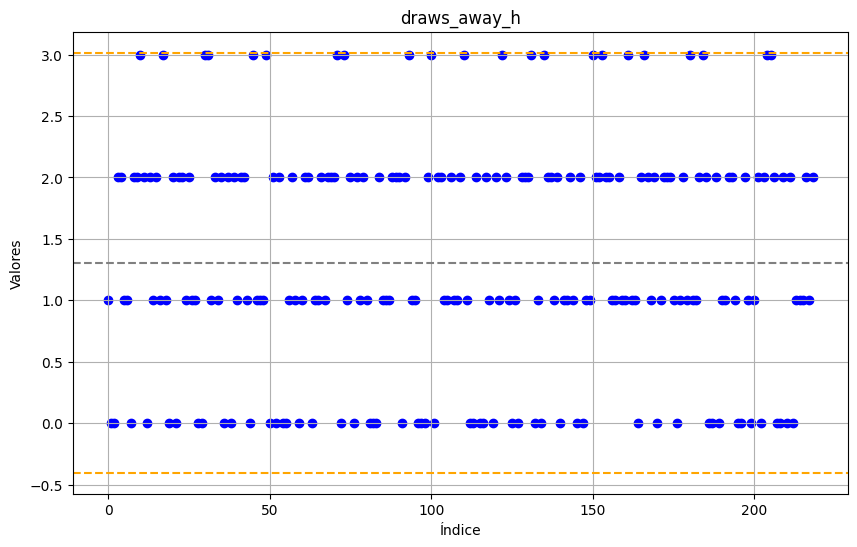

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3059360730593608' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


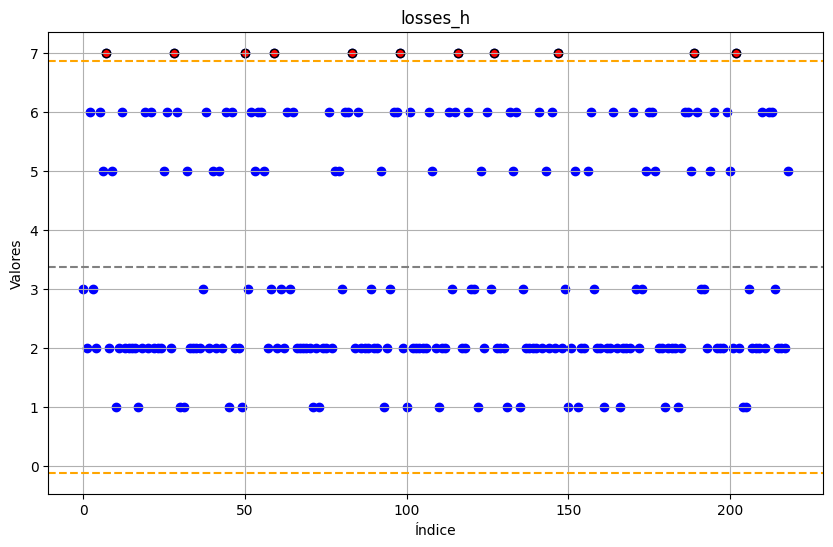

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.374429223744292' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


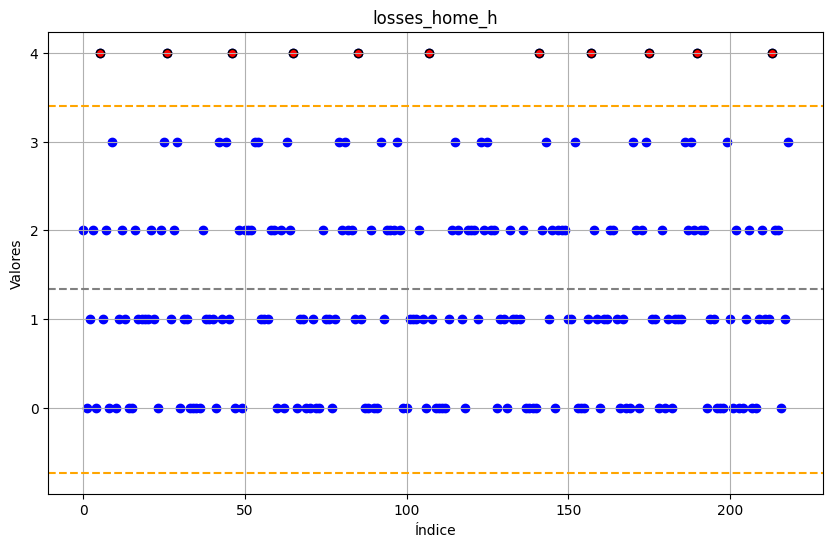

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3333333333333333' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


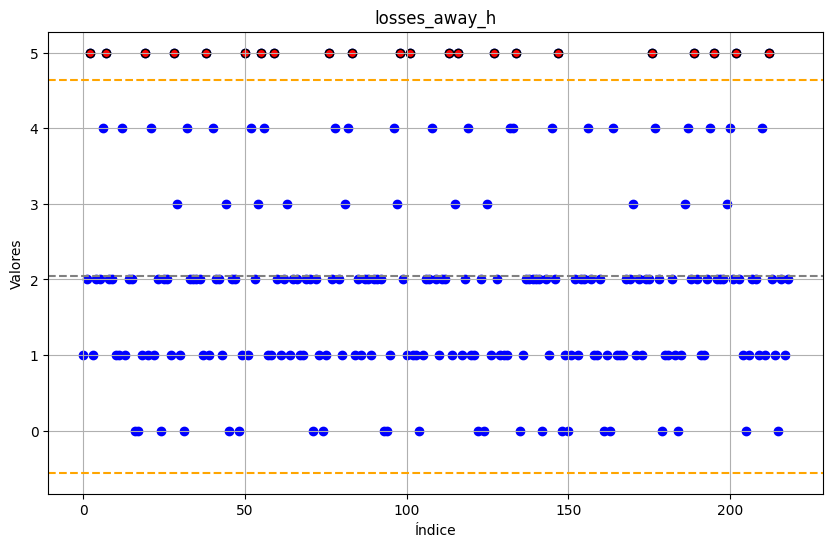

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.041095890410959' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


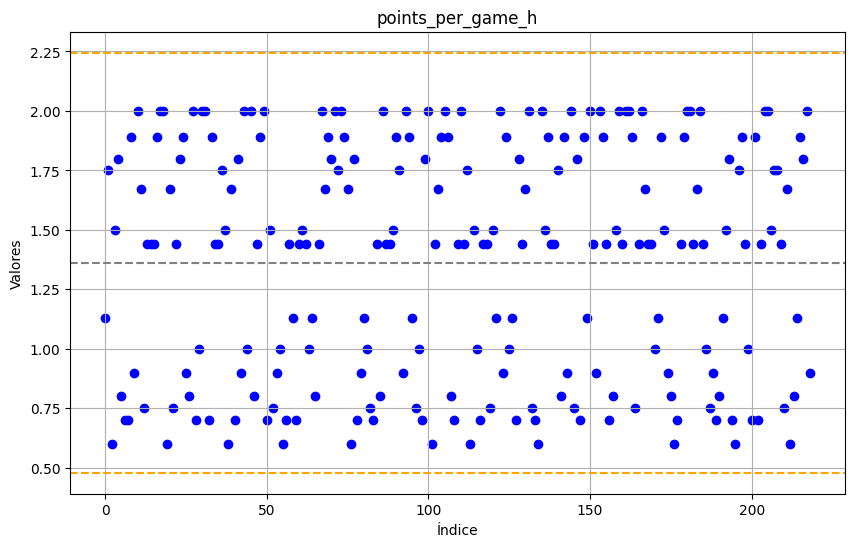

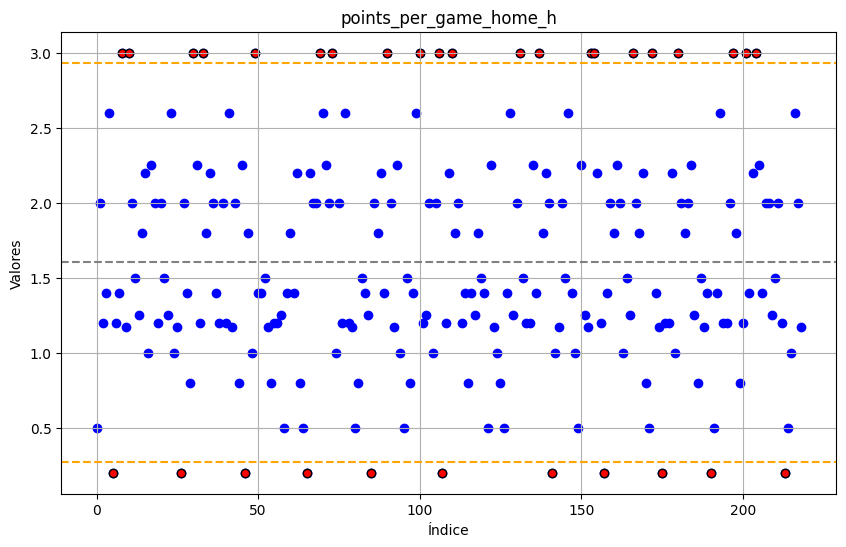

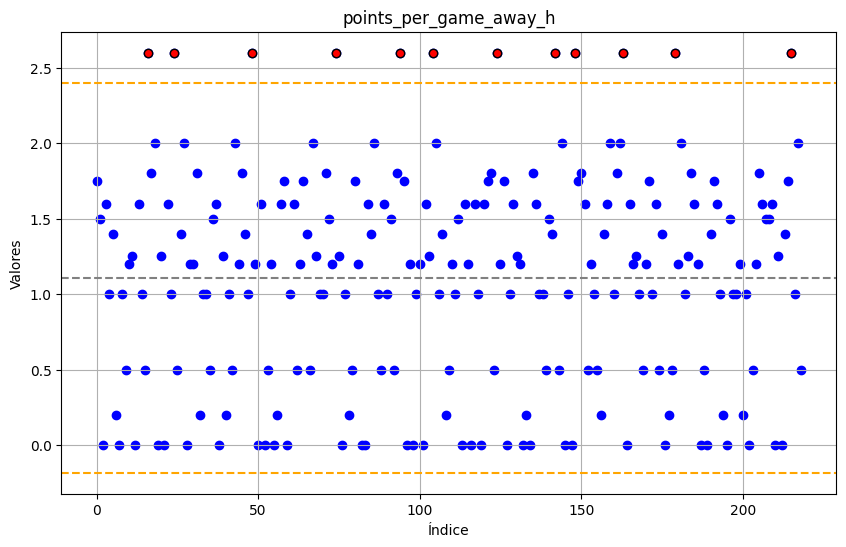

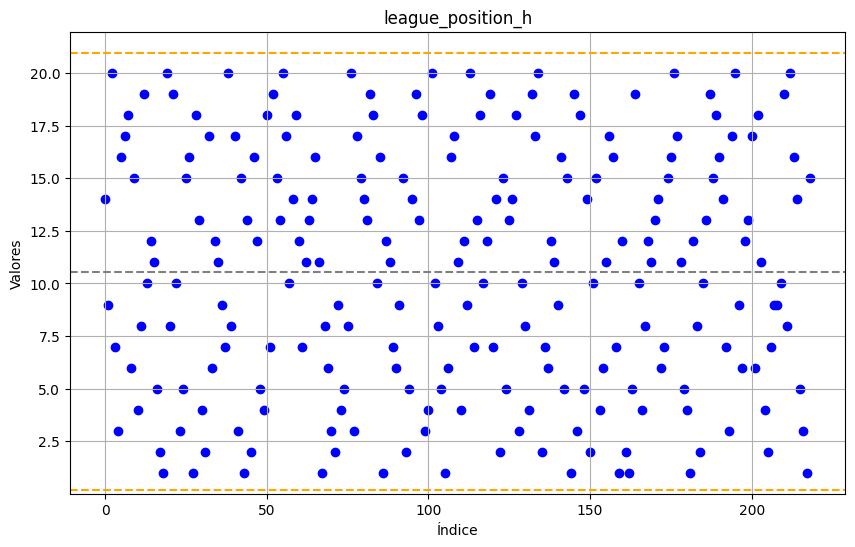

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5662100456621' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


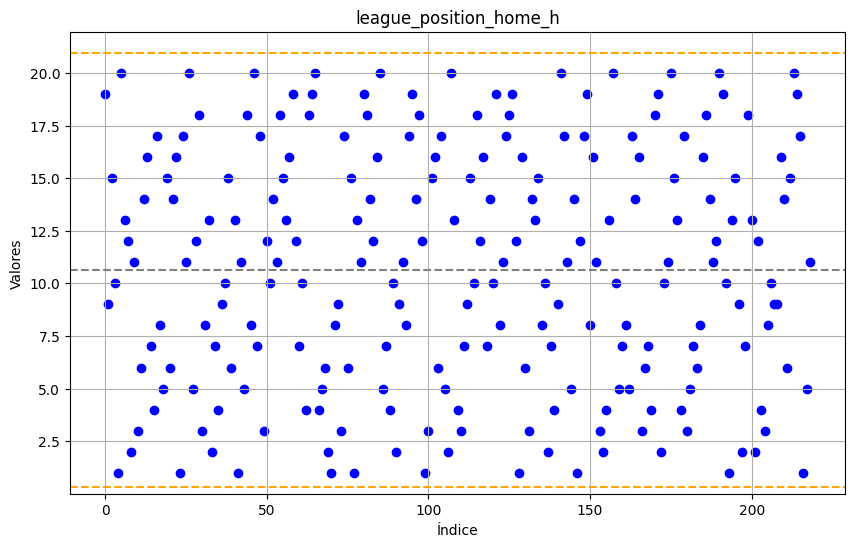

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.63013698630137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


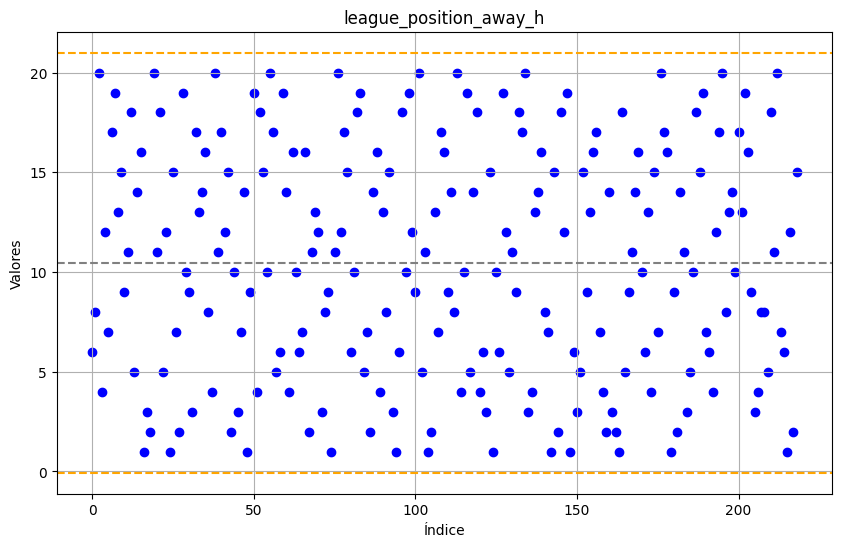

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.465753424657533' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


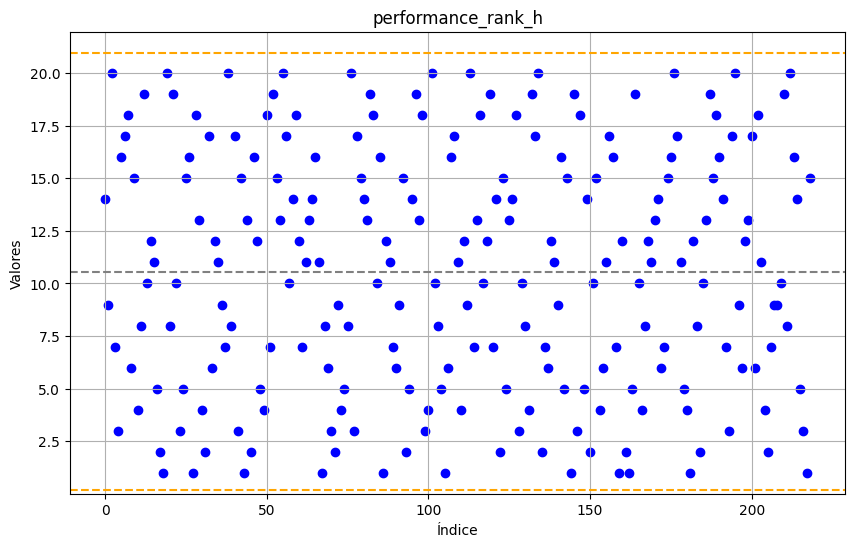

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.5662100456621' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


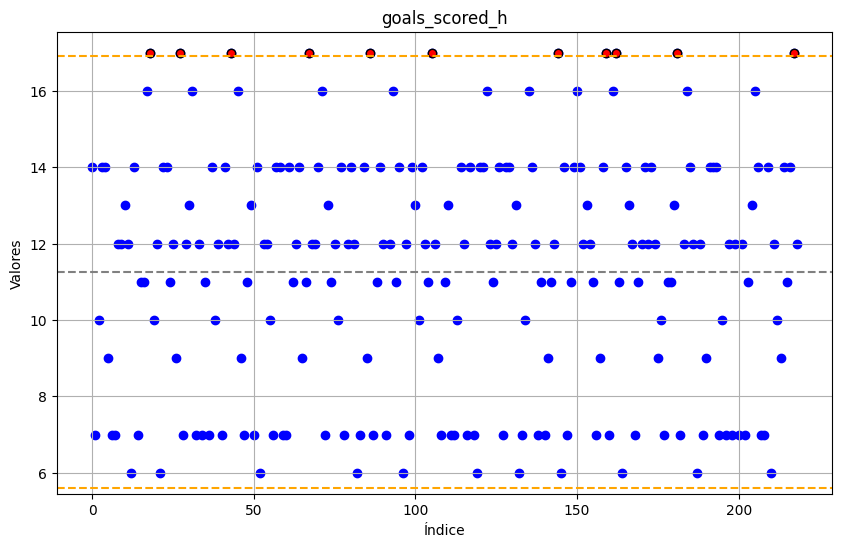

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.264840182648403' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


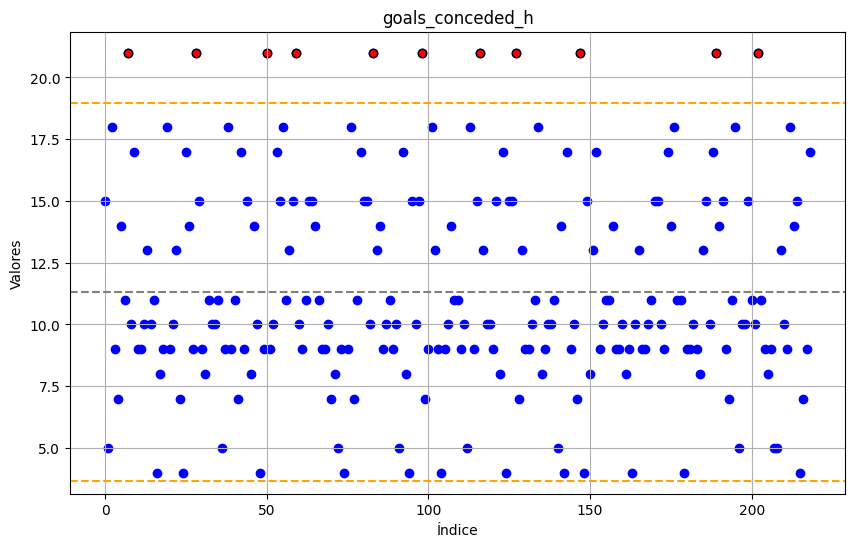

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.319634703196346' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


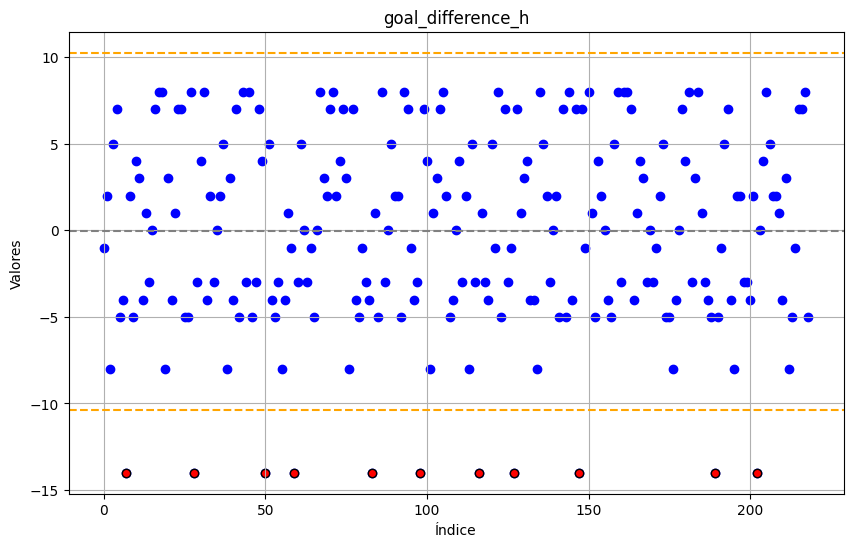

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.0547945205479452' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


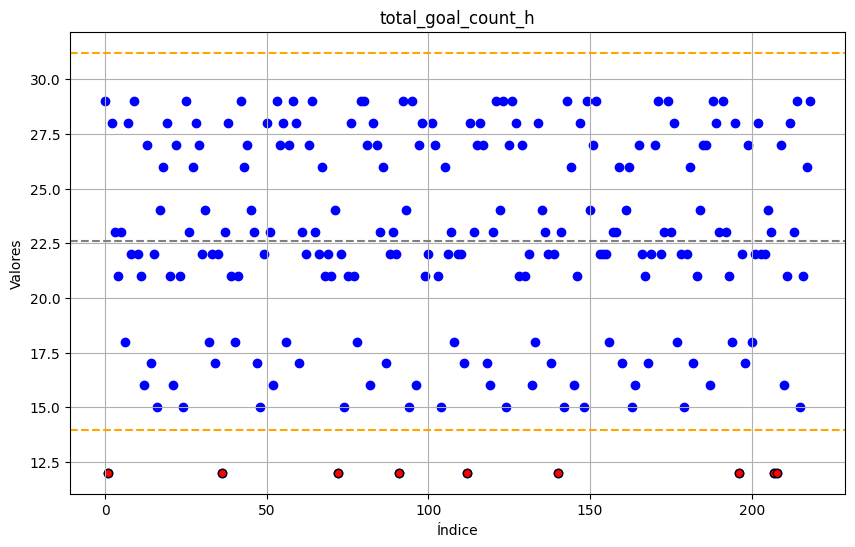

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '22.58447488584475' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


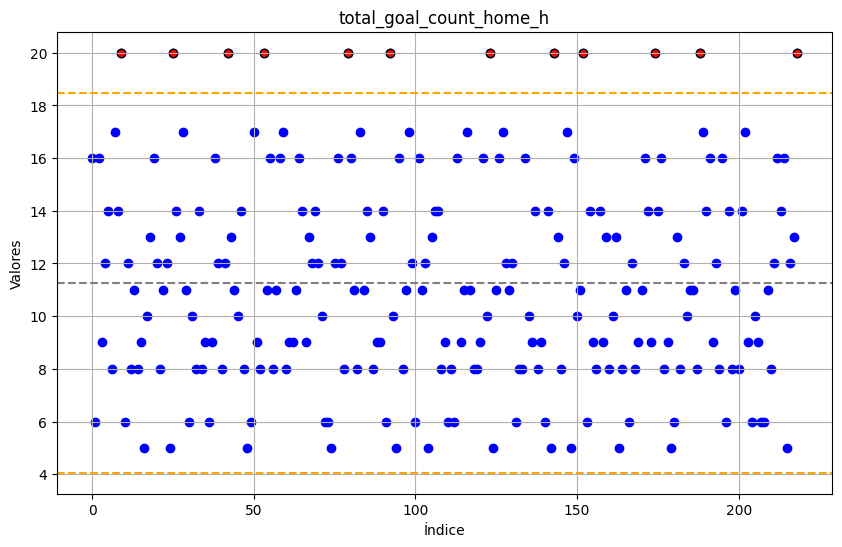

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.264840182648403' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


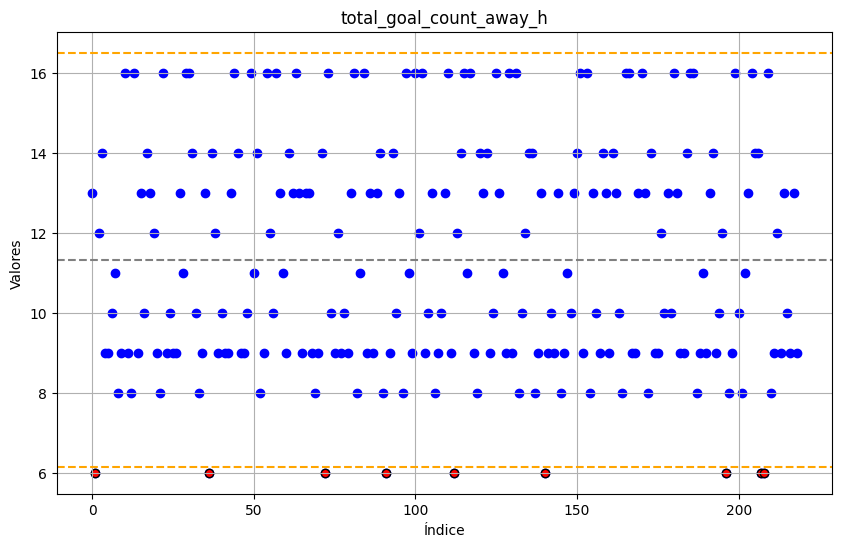

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.319634703196346' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


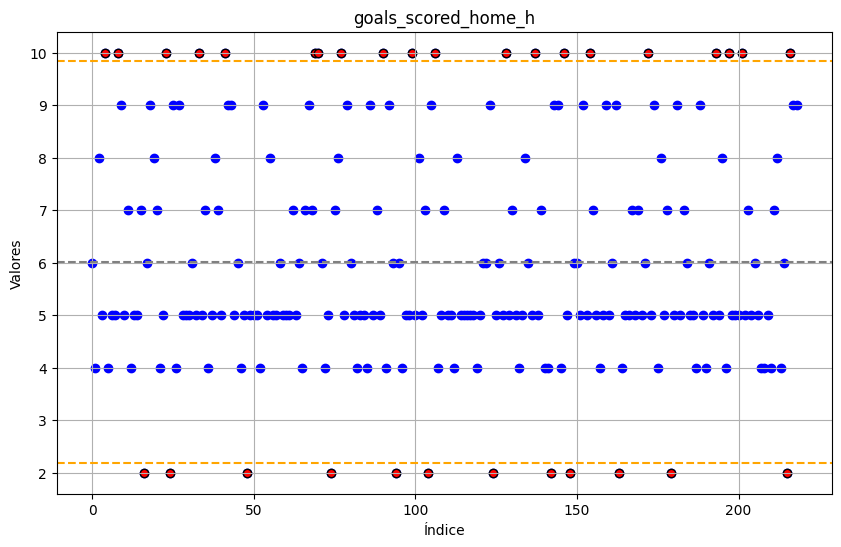

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.013698630136986' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


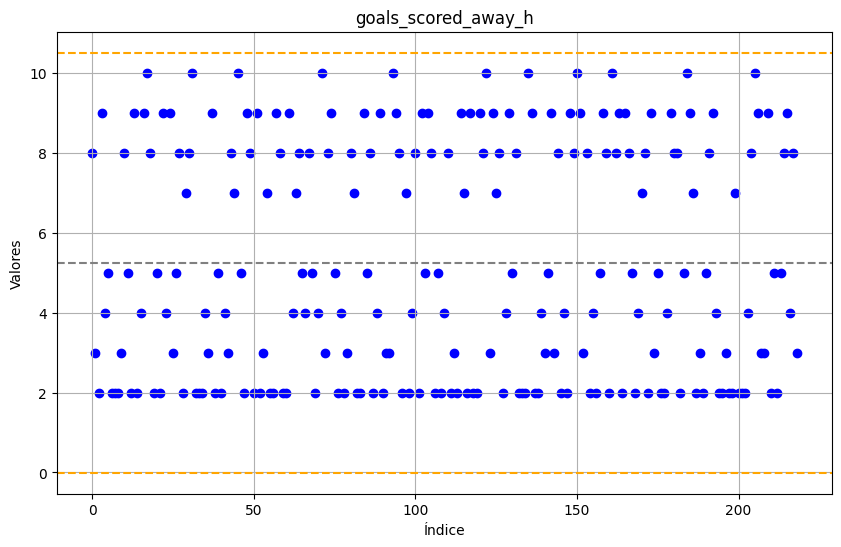

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.251141552511416' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


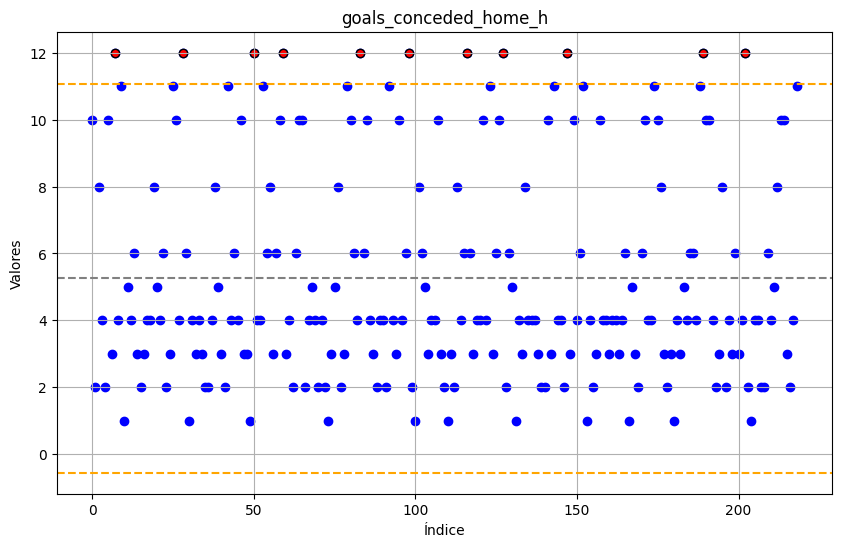

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.251141552511416' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


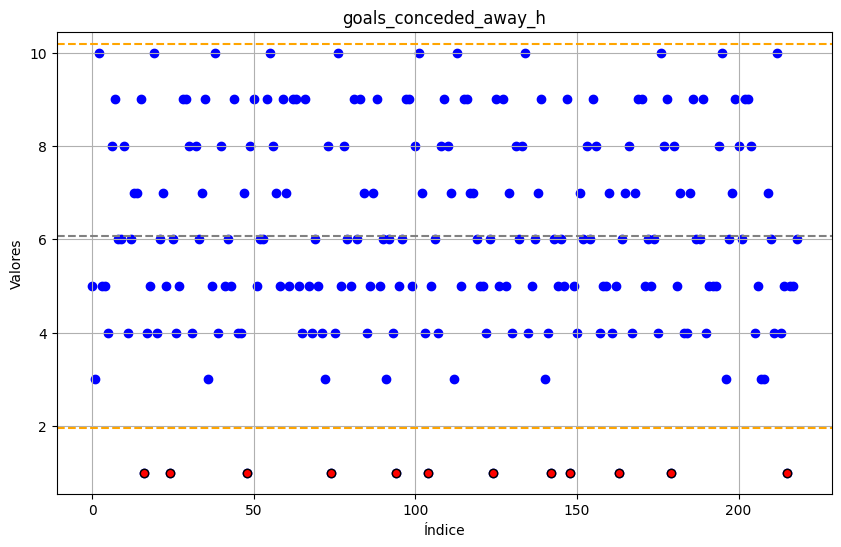

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.068493150684931' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


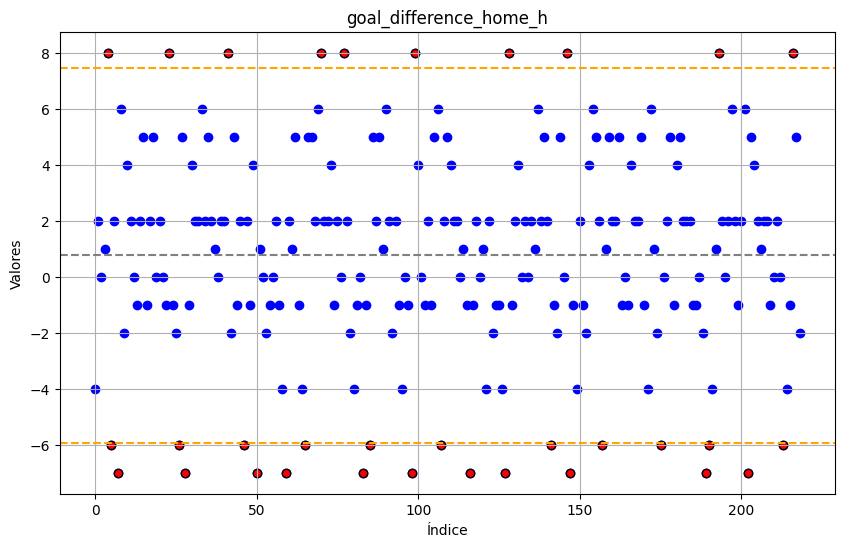

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7625570776255708' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


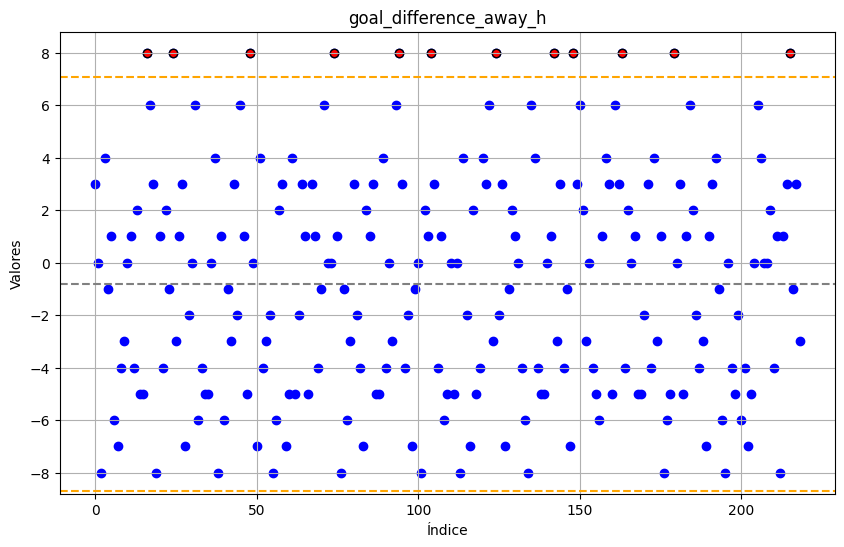

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.817351598173516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


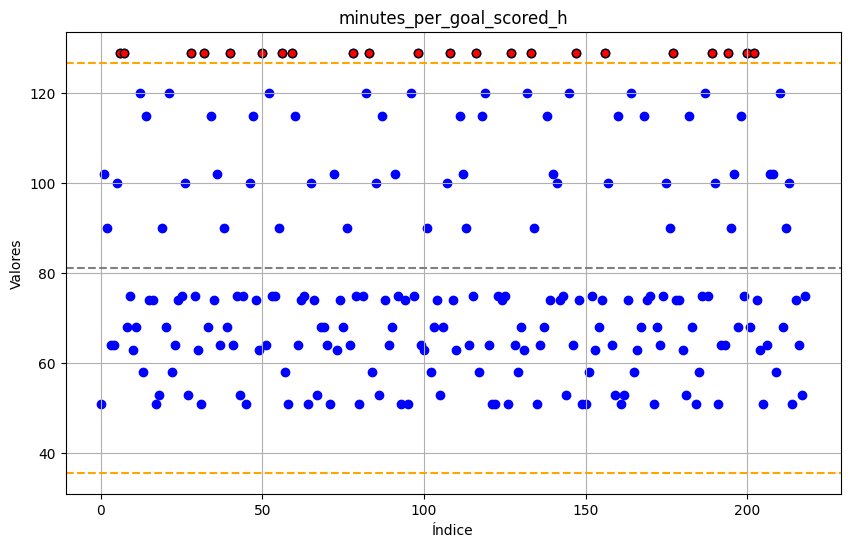

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '81.17351598173516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


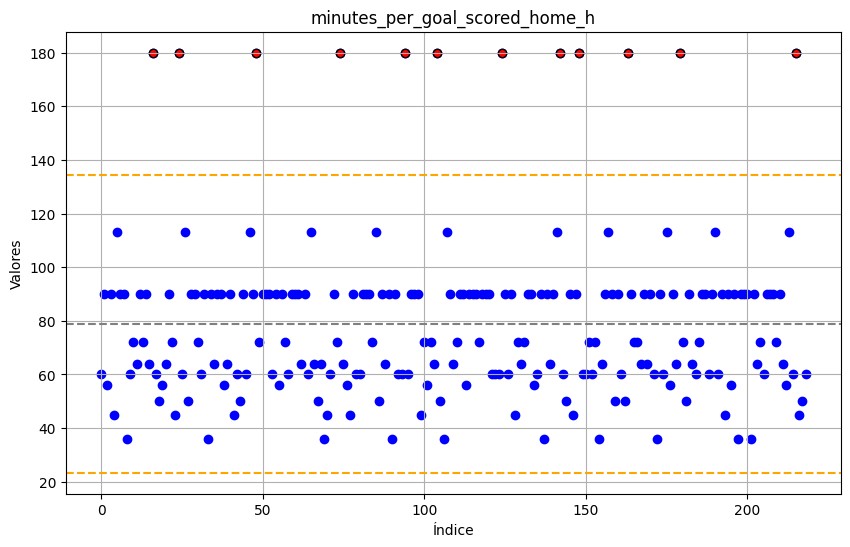

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '78.89041095890411' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


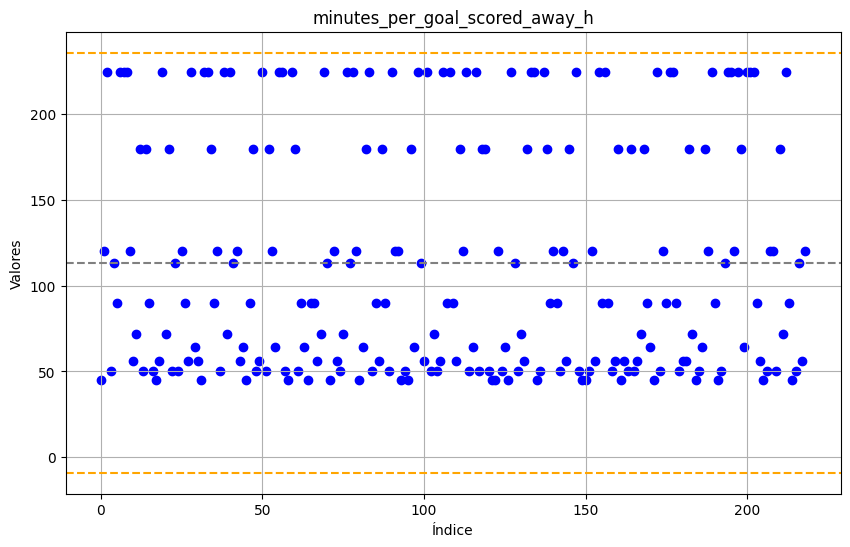

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.42922374429224' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


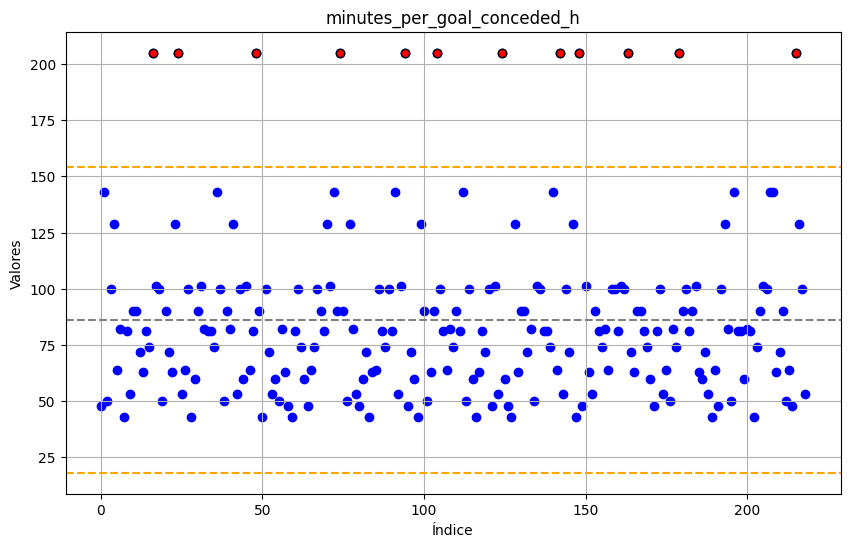

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '86.17351598173516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


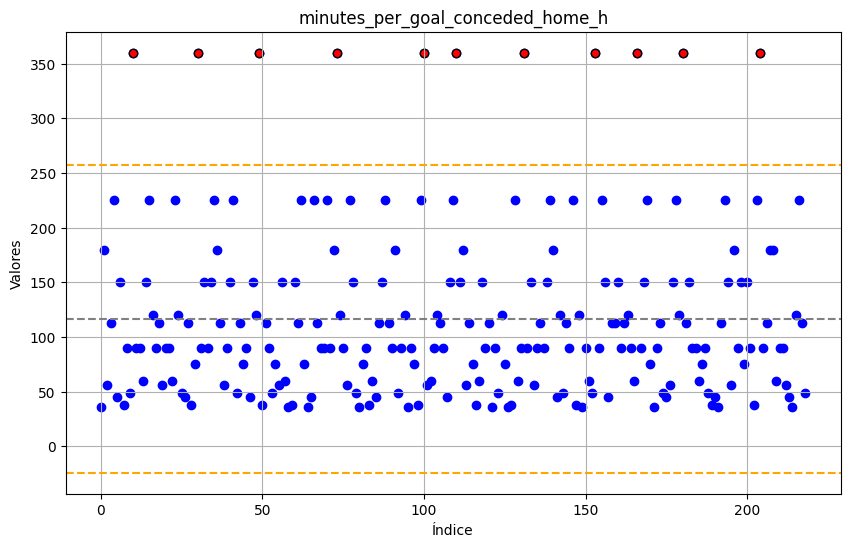

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '116.76712328767124' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


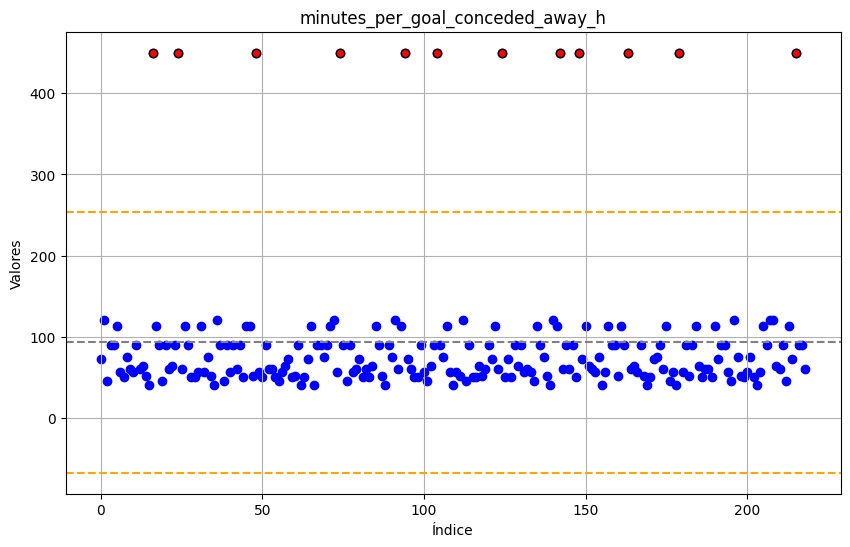

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92.88127853881278' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


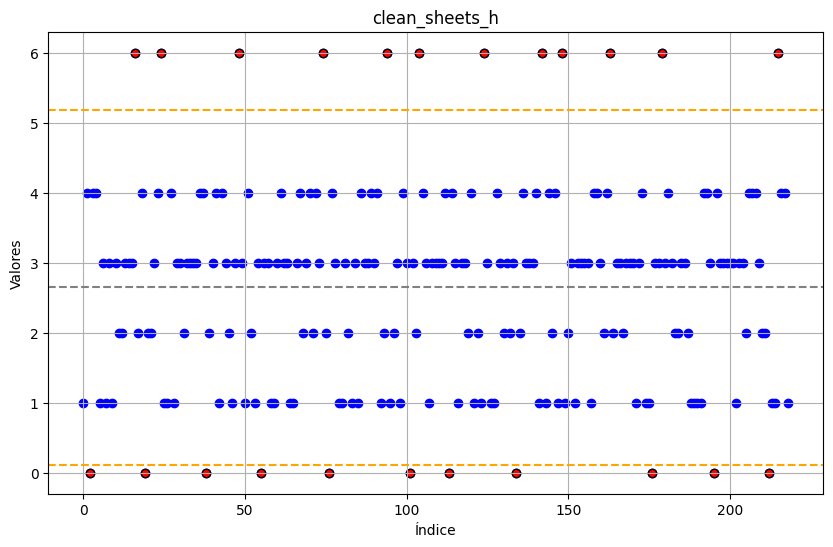

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6484018264840183' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


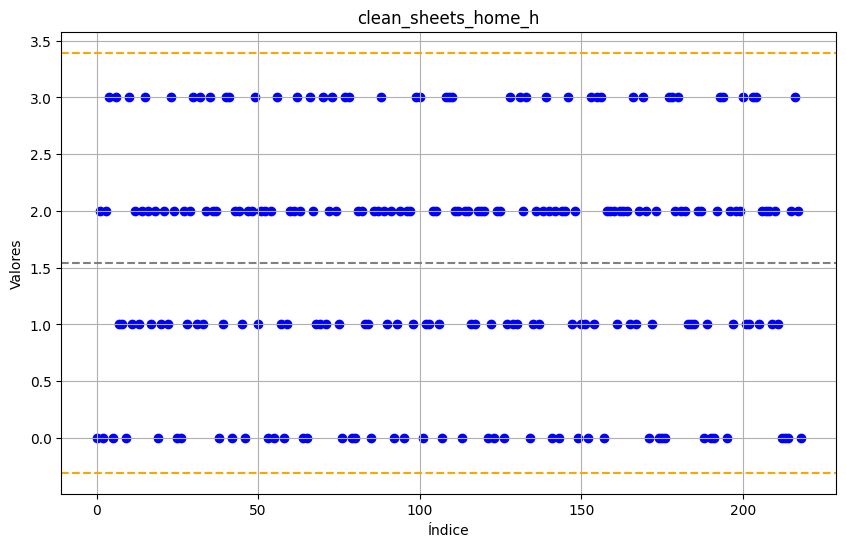

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.54337899543379' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


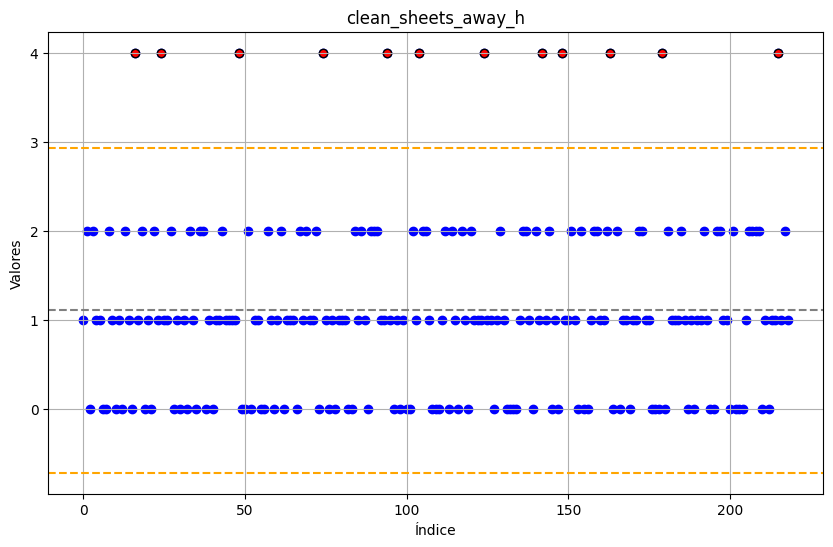

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1050228310502284' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


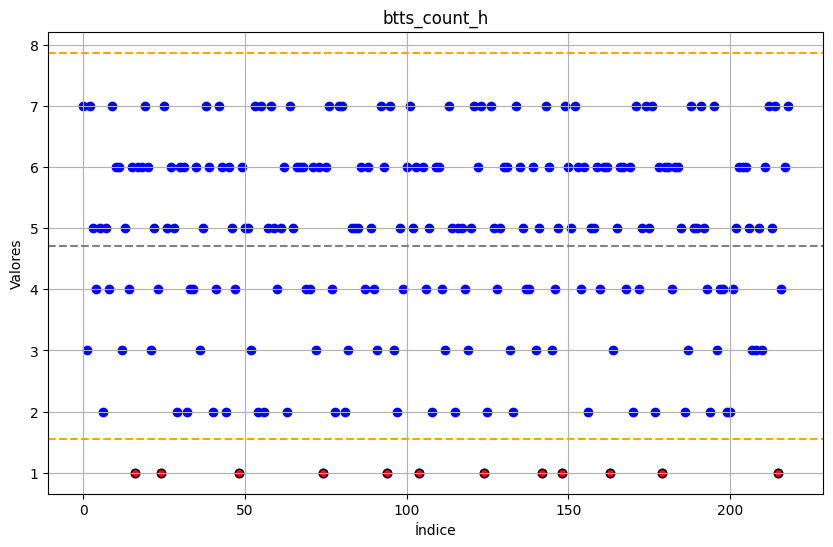

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.707762557077626' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


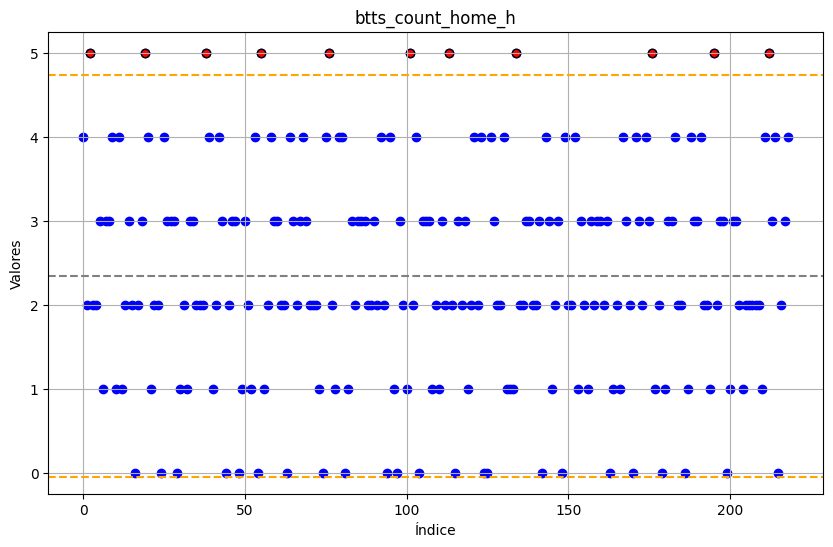

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.3424657534246576' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


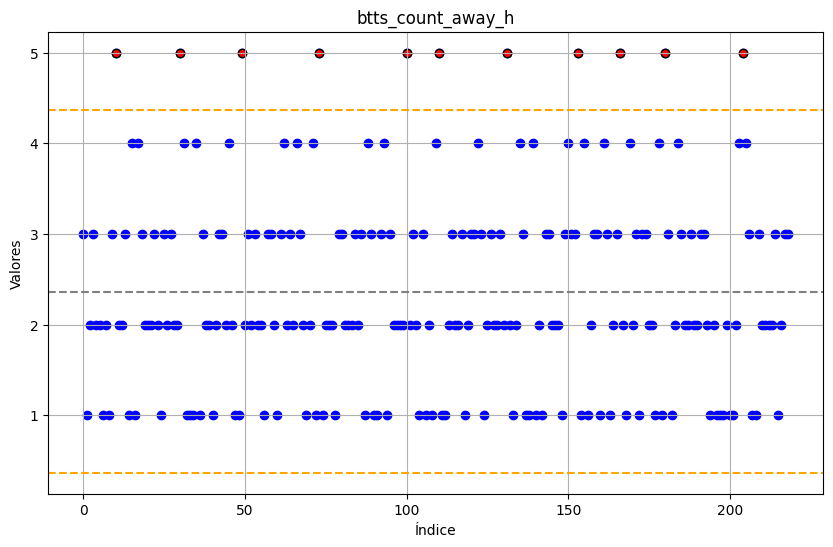

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.365296803652968' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


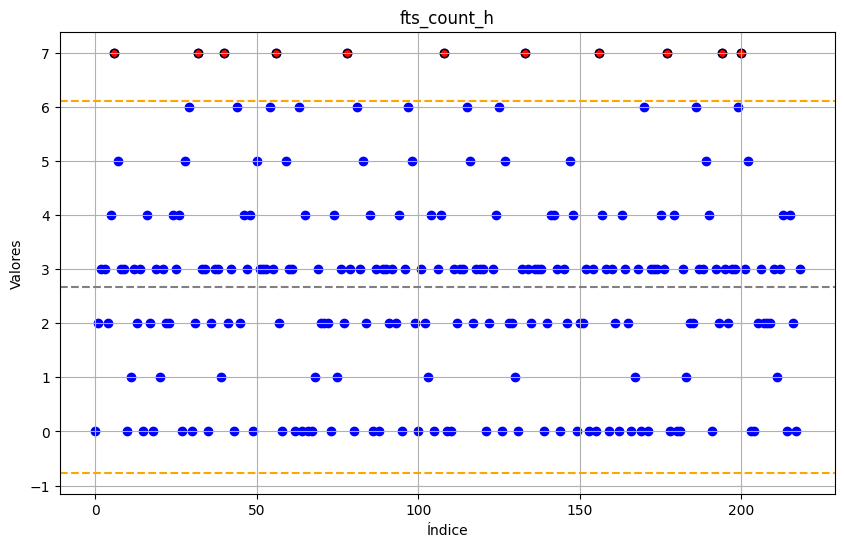

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.675799086757991' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


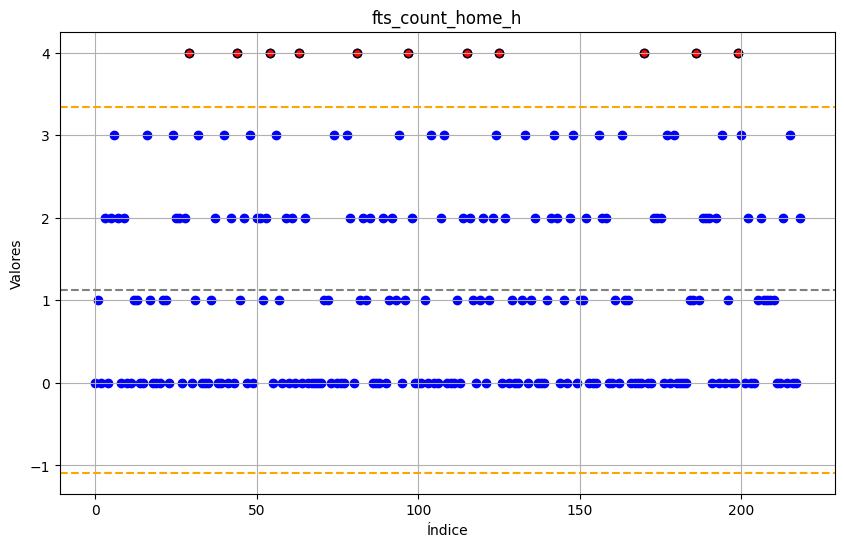

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.1278538812785388' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


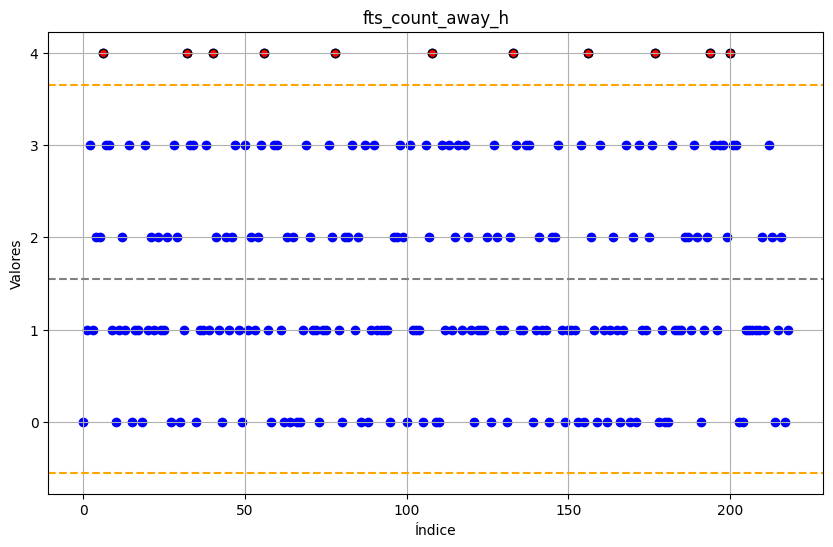

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.547945205479452' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


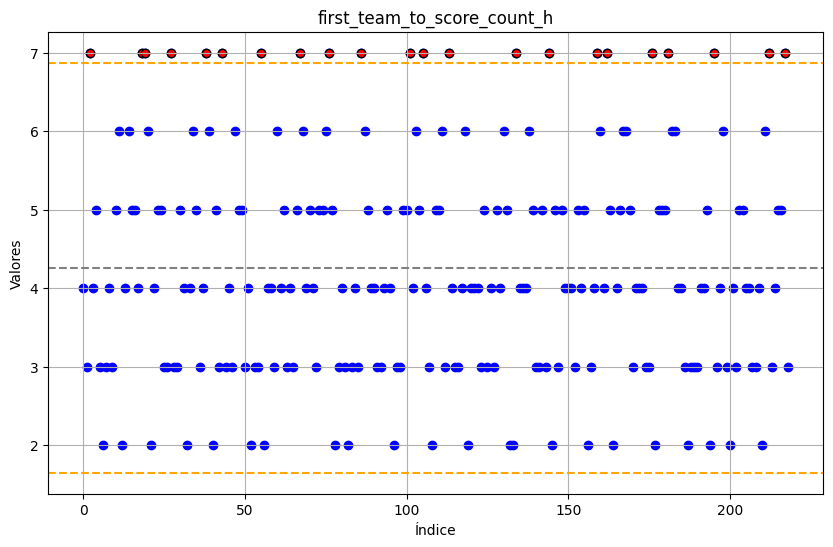

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.255707762557078' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


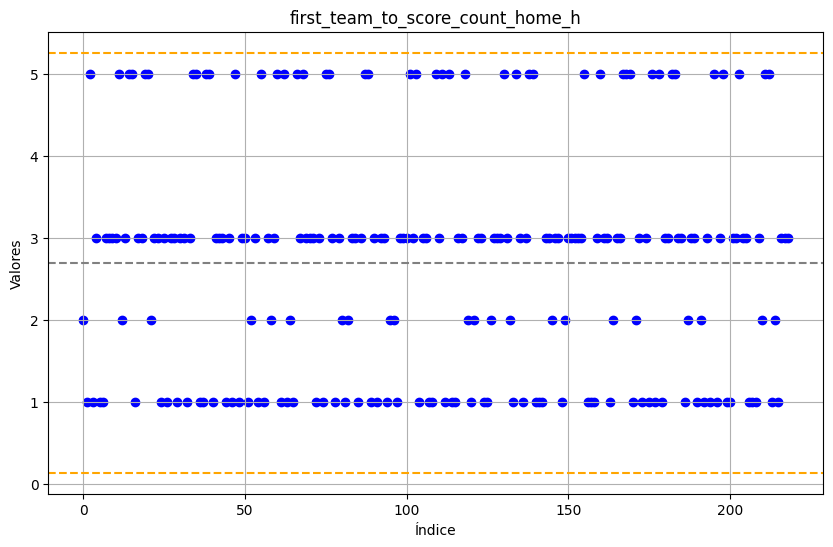

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.6986301369863015' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


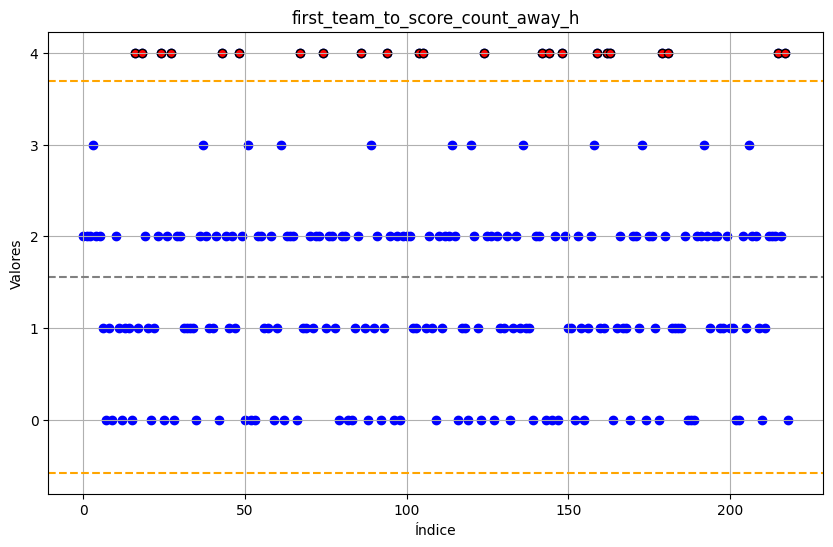

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.5570776255707763' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


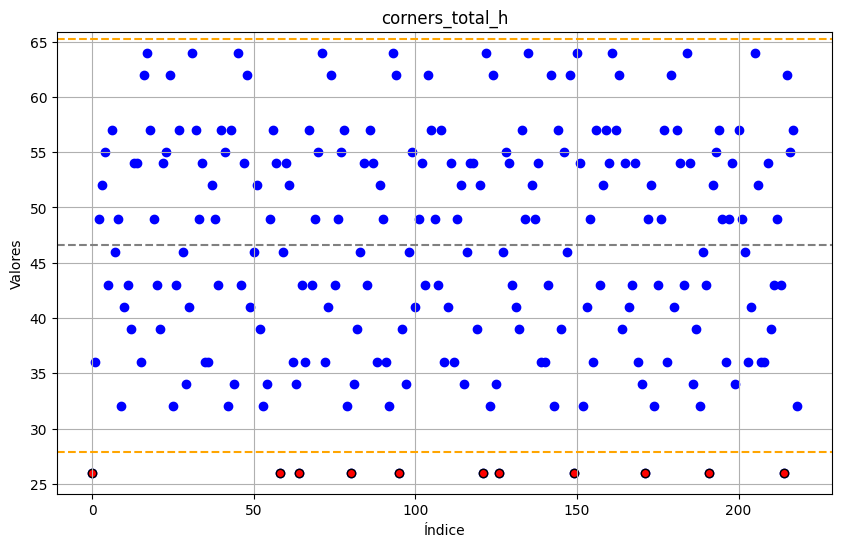

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.57534246575342' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


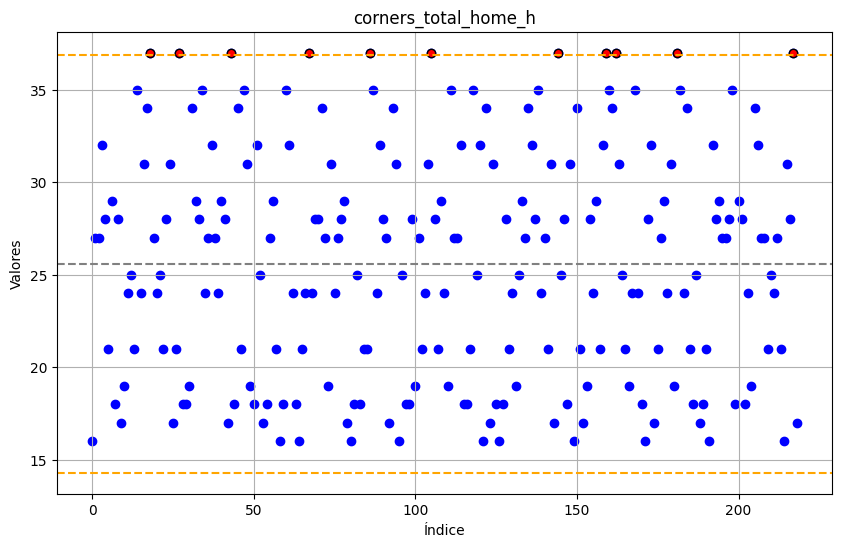

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.579908675799086' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


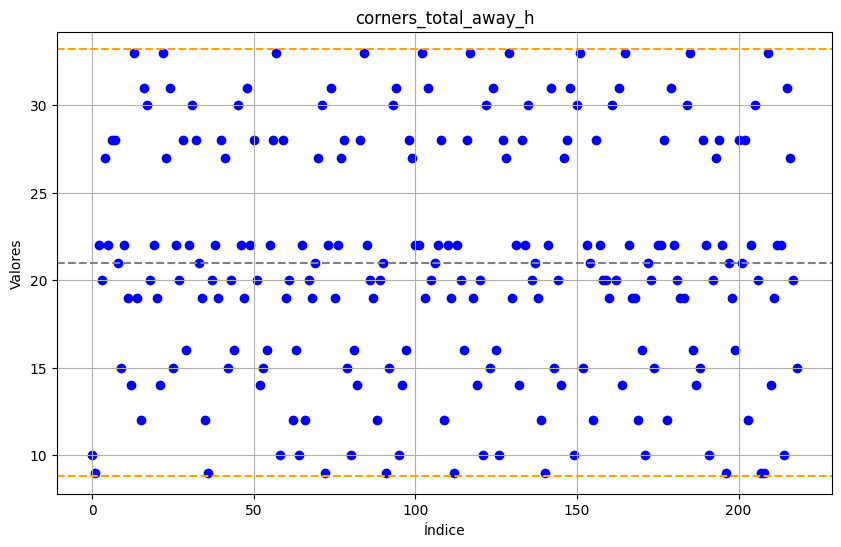

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.995433789954337' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


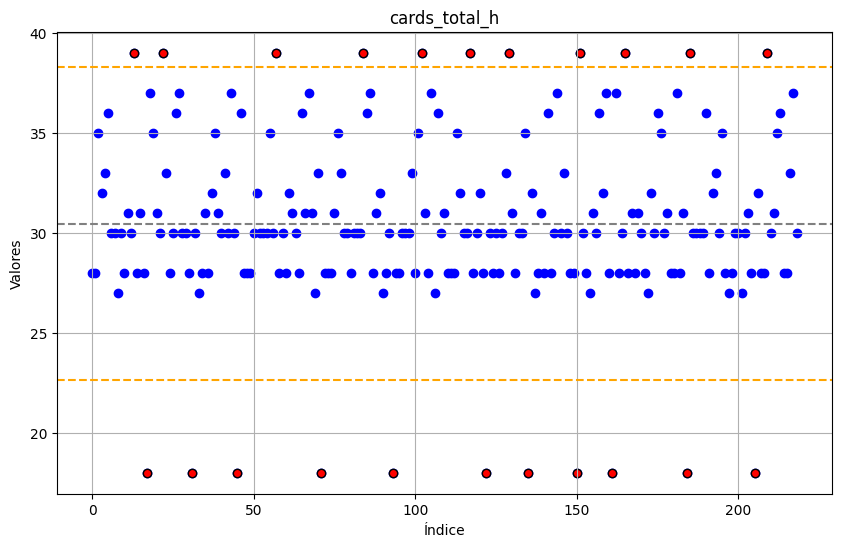

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.45662100456621' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


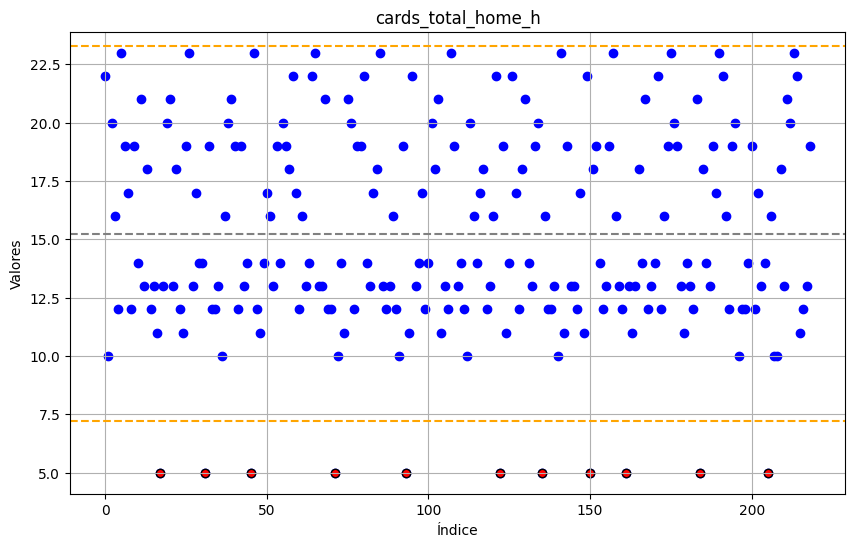

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.237442922374429' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


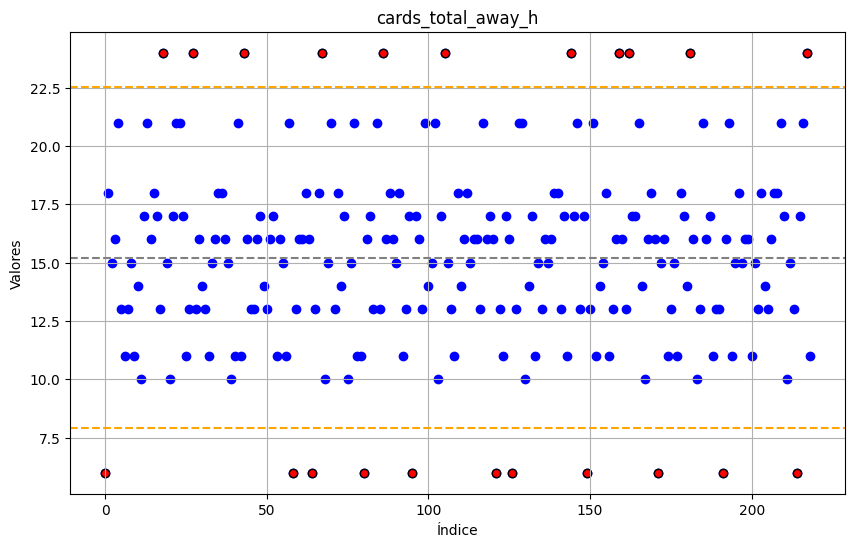

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '15.219178082191782' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


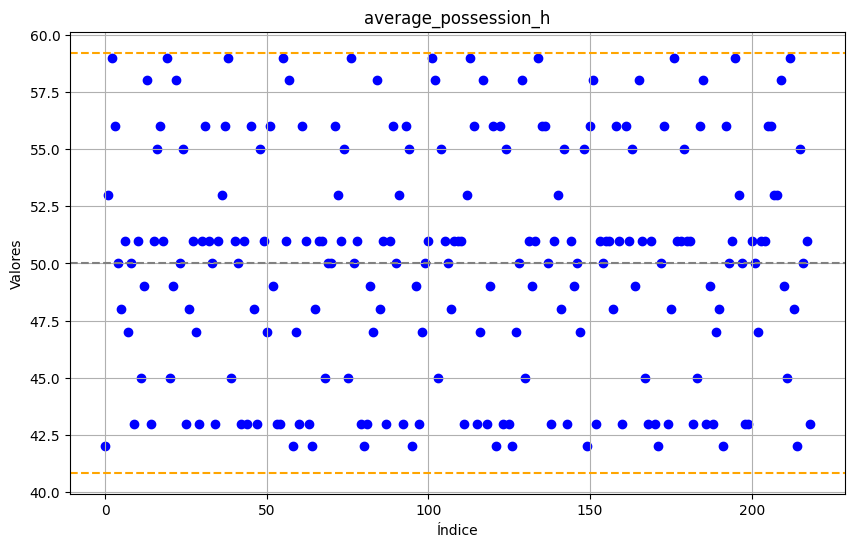

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.03196347031963' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


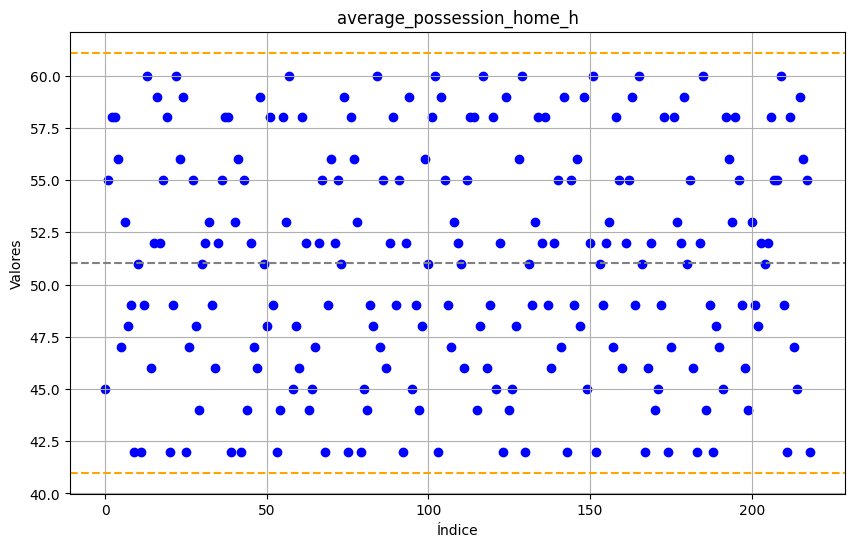

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51.045662100456624' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


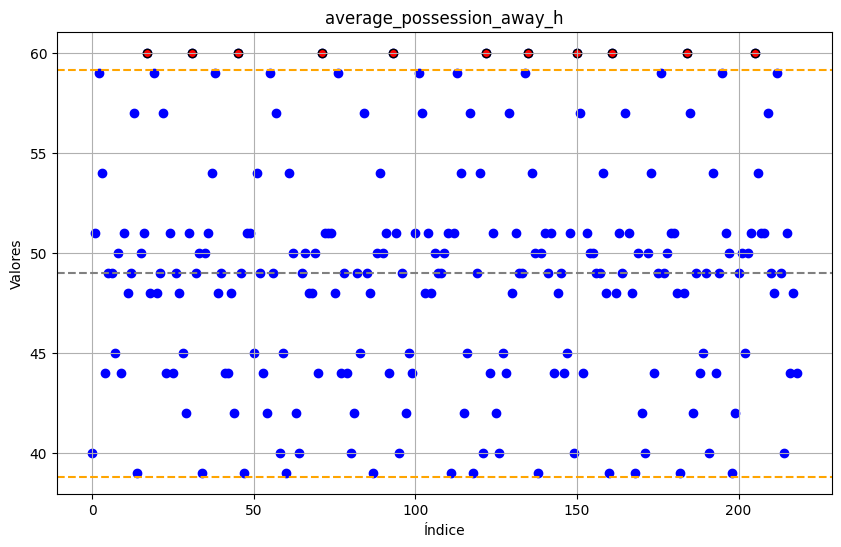

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '48.96803652968037' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


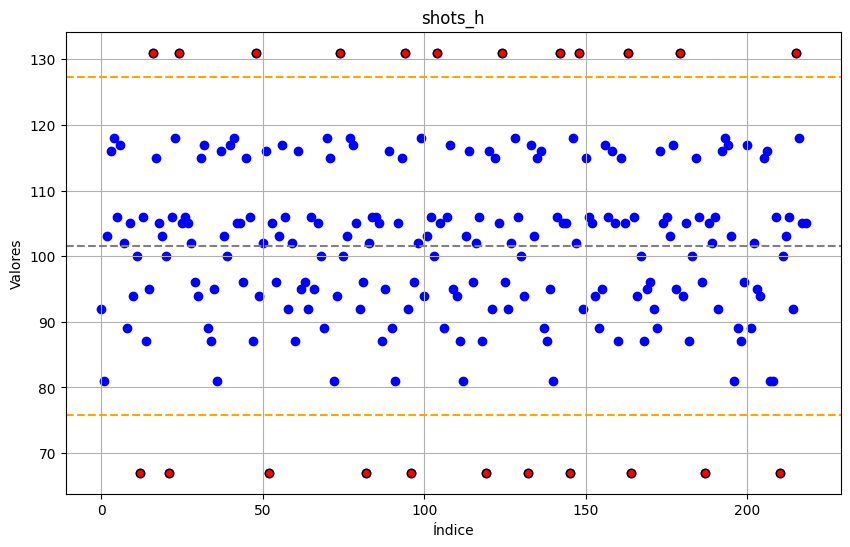

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '101.57534246575342' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


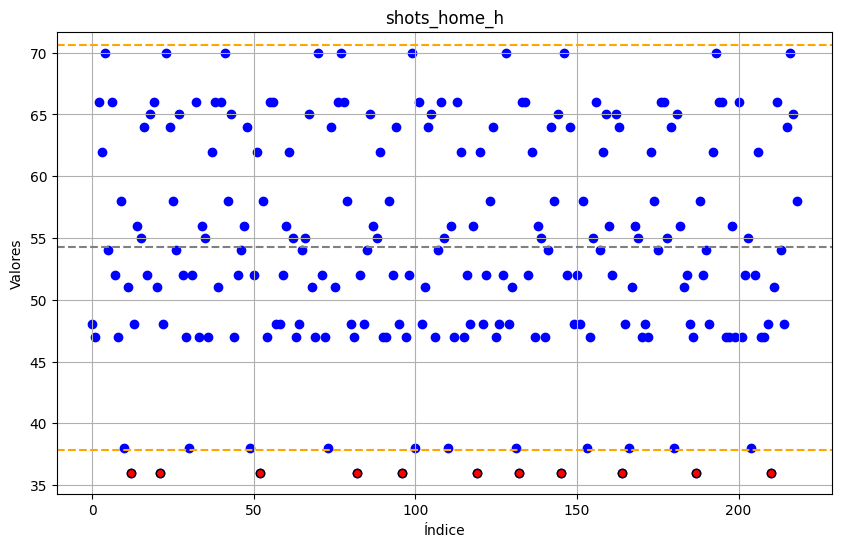

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '54.24657534246575' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


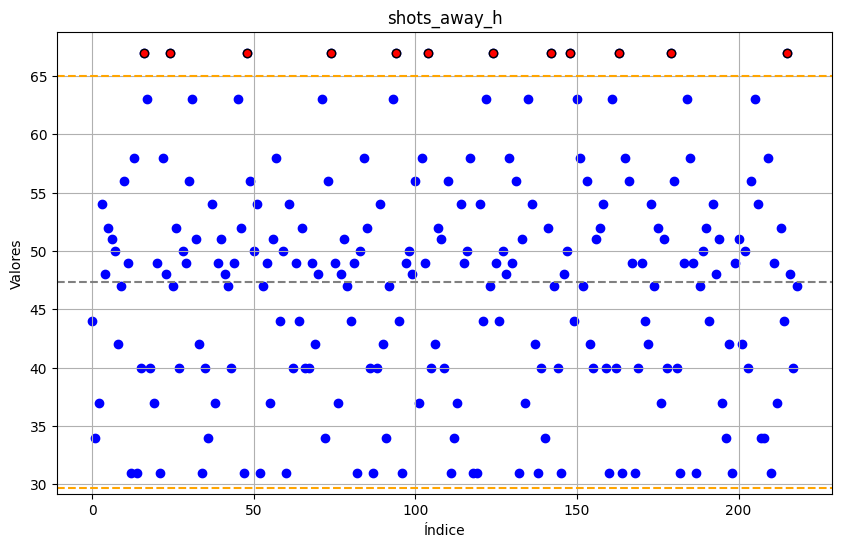

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47.32876712328767' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


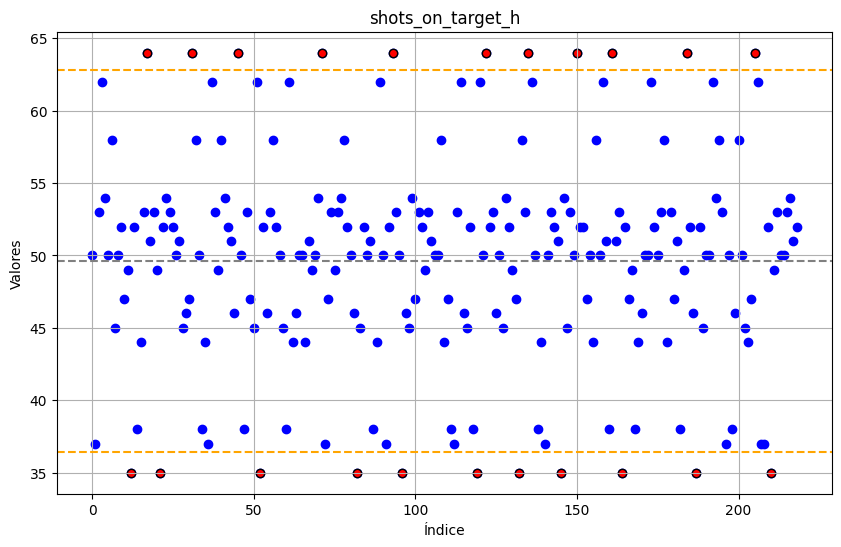

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.62557077625571' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


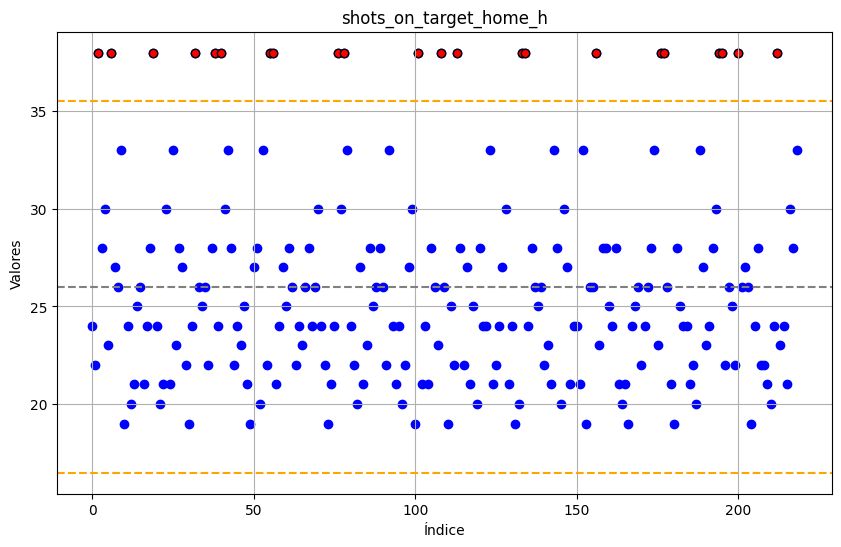

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '25.990867579908677' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


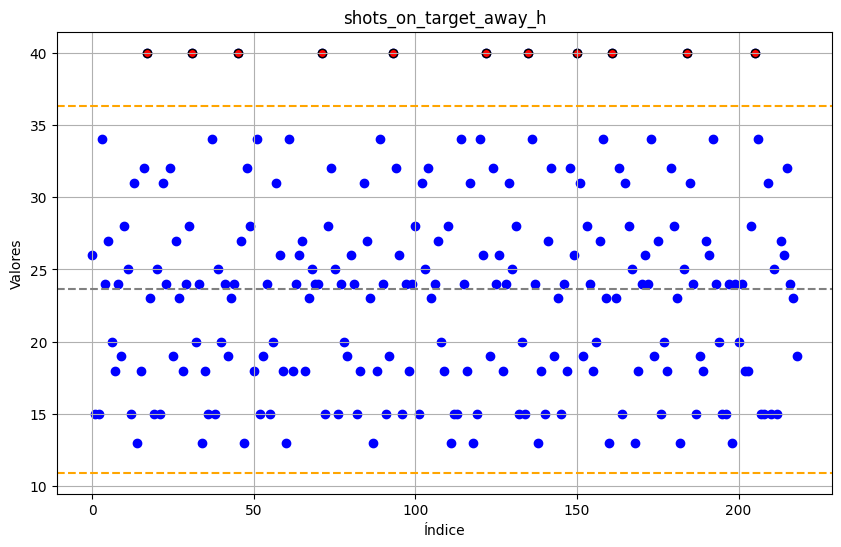

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.634703196347033' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


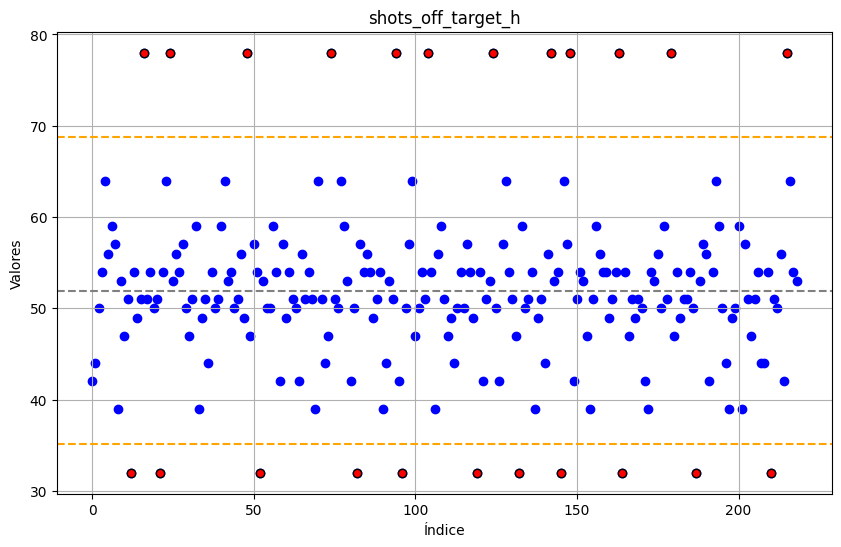

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51.949771689497716' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


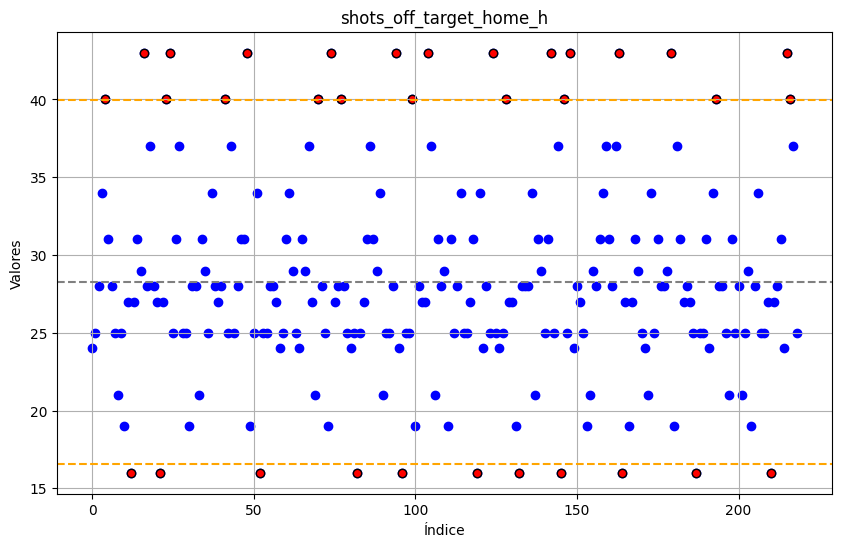

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.255707762557076' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


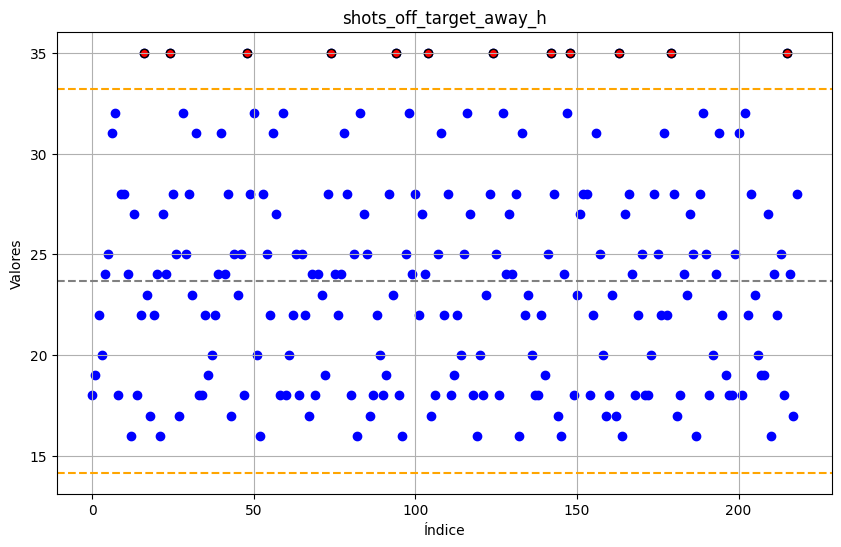

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.69406392694064' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


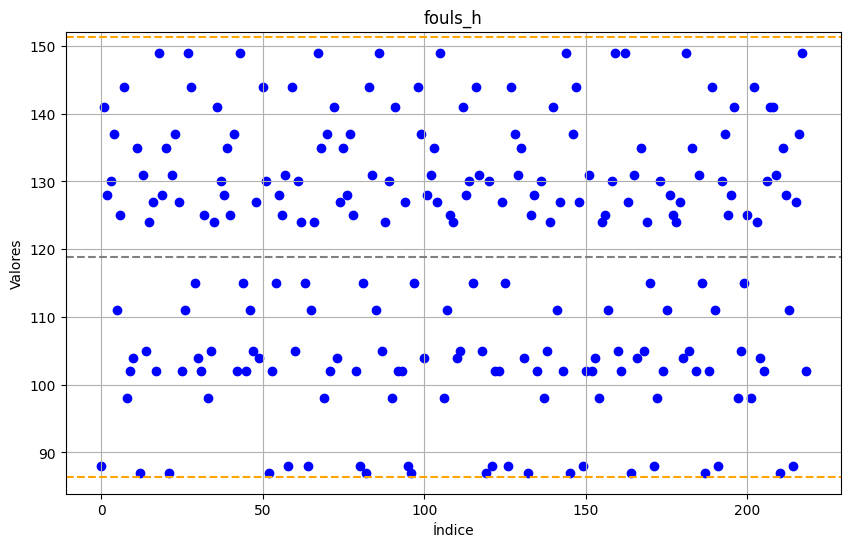

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '118.83561643835617' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


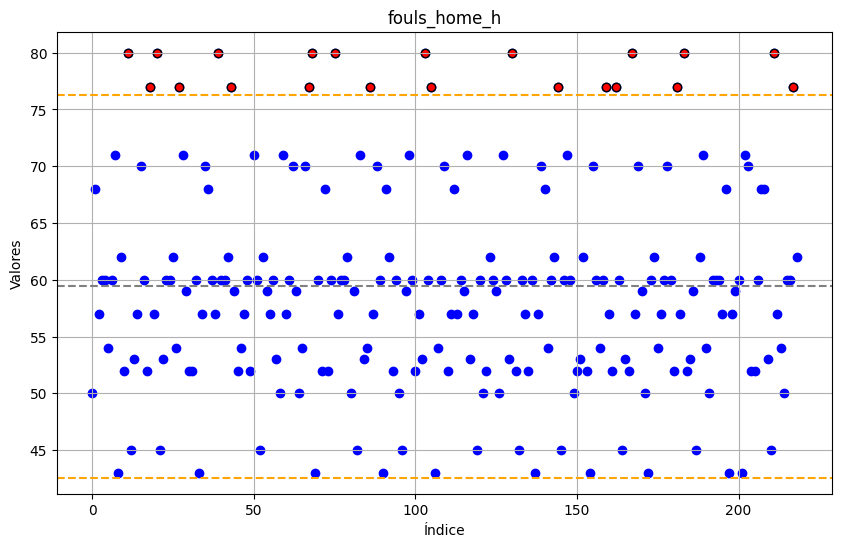

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.406392694063925' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


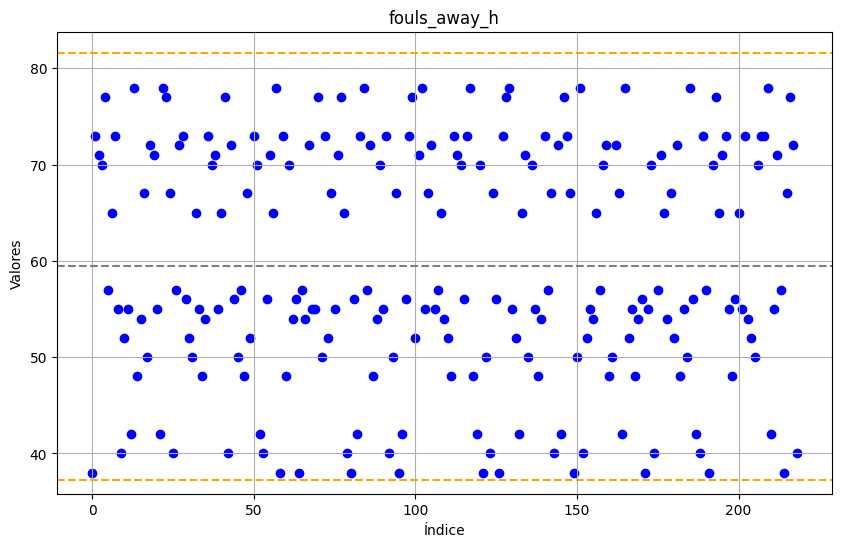

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '59.42922374429224' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


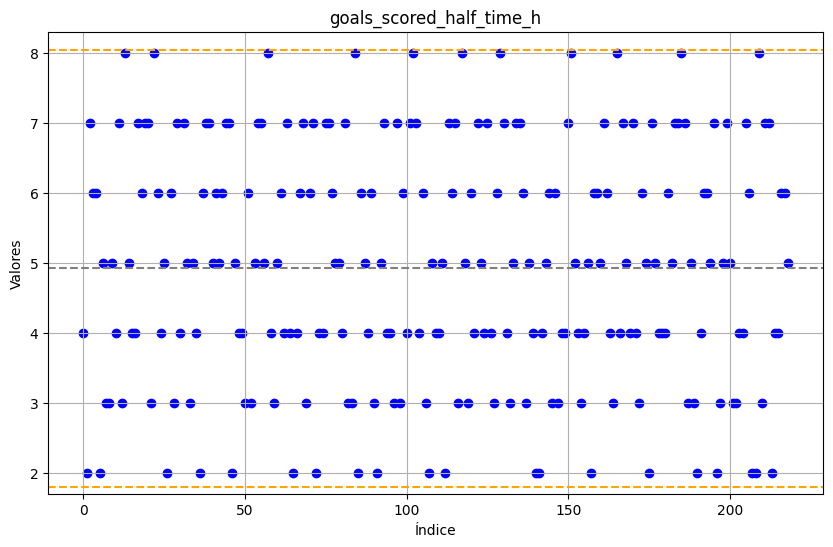

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.922374429223744' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


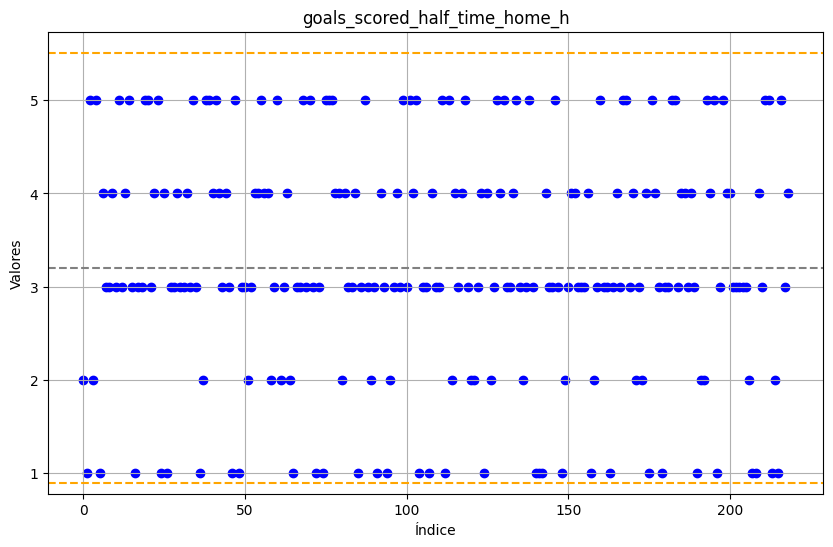

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.2009132420091326' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


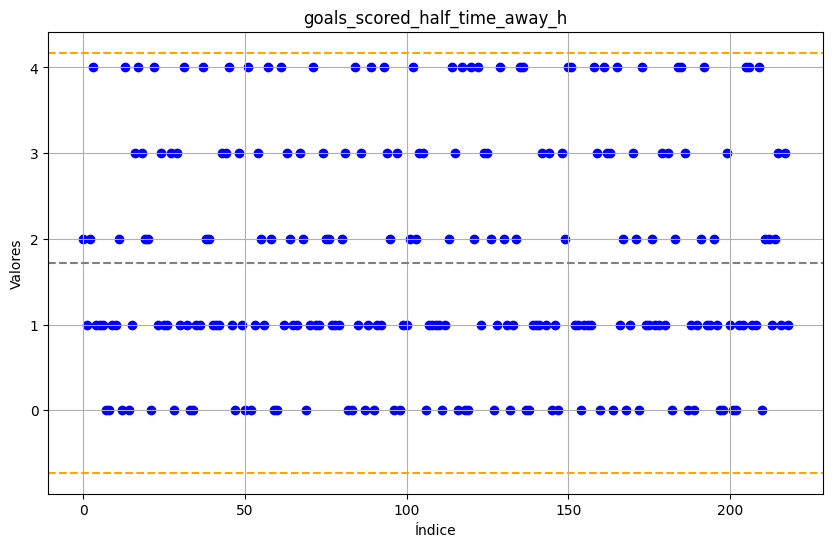

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.721461187214612' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


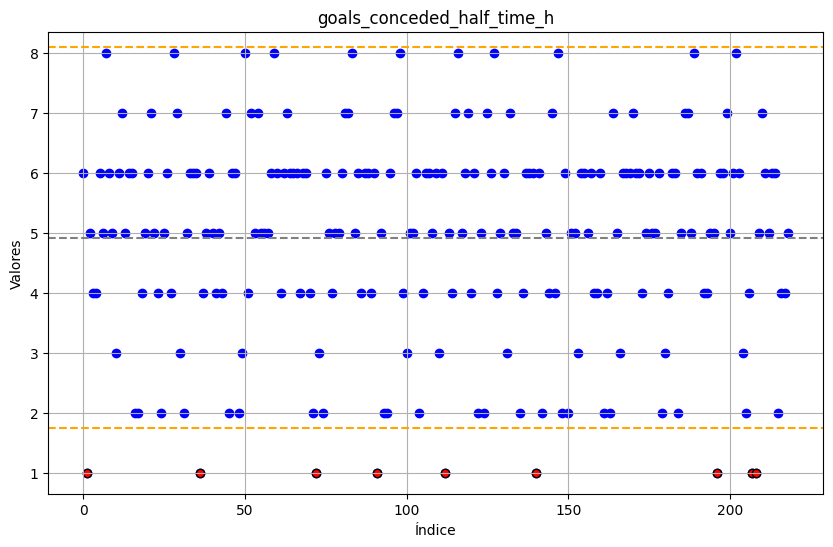

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.917808219178082' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


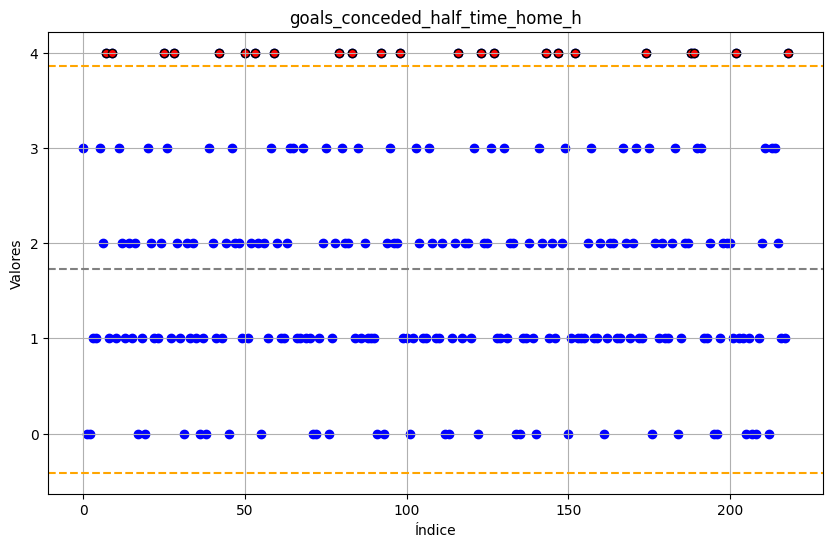

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.726027397260274' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


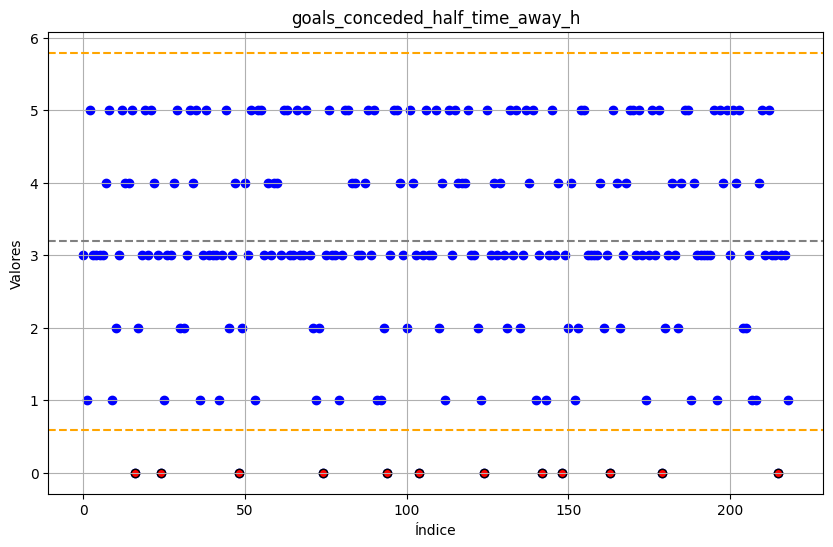

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.191780821917808' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


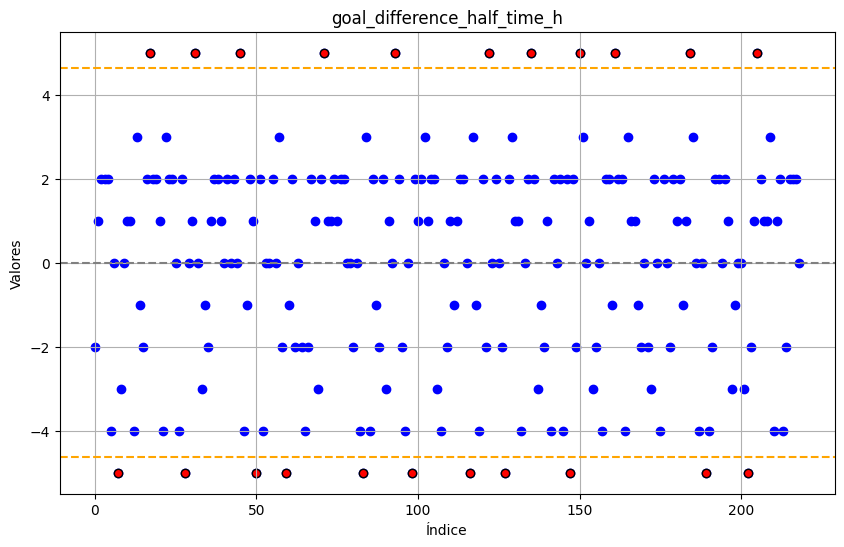

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0045662100456621' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


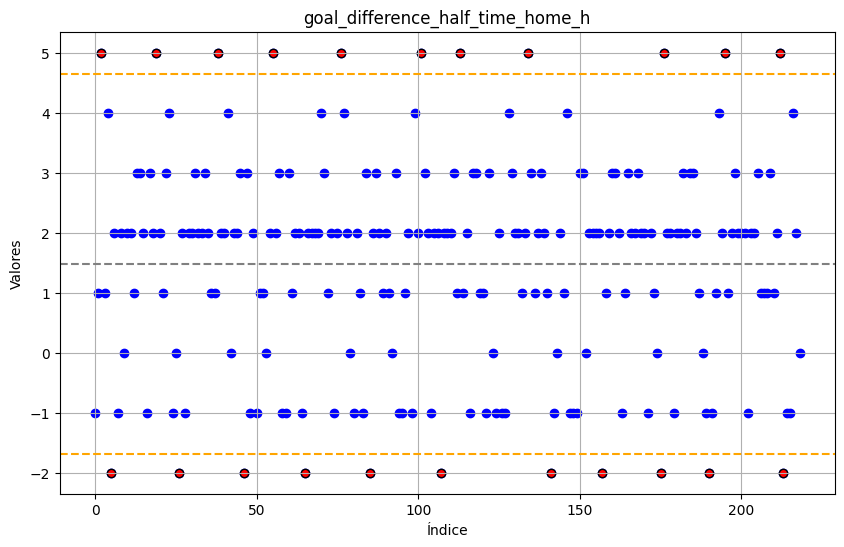

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.4748858447488584' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


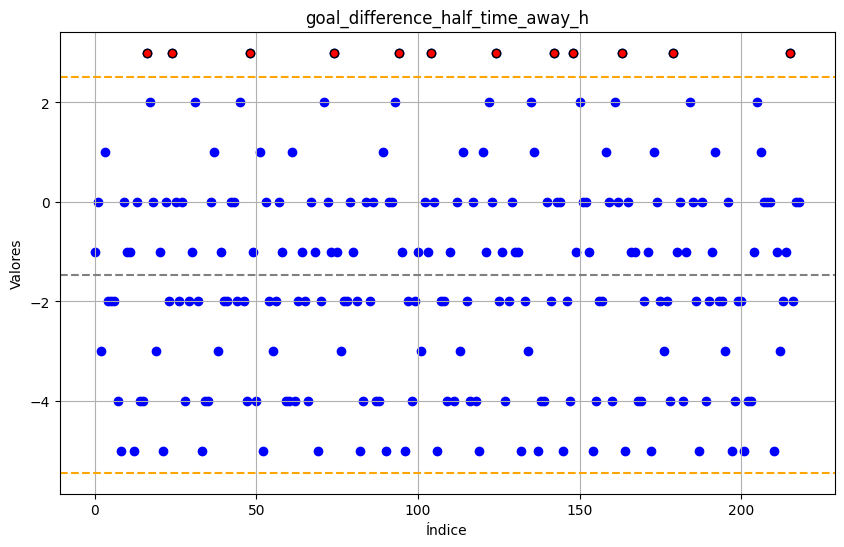

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.4703196347031964' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


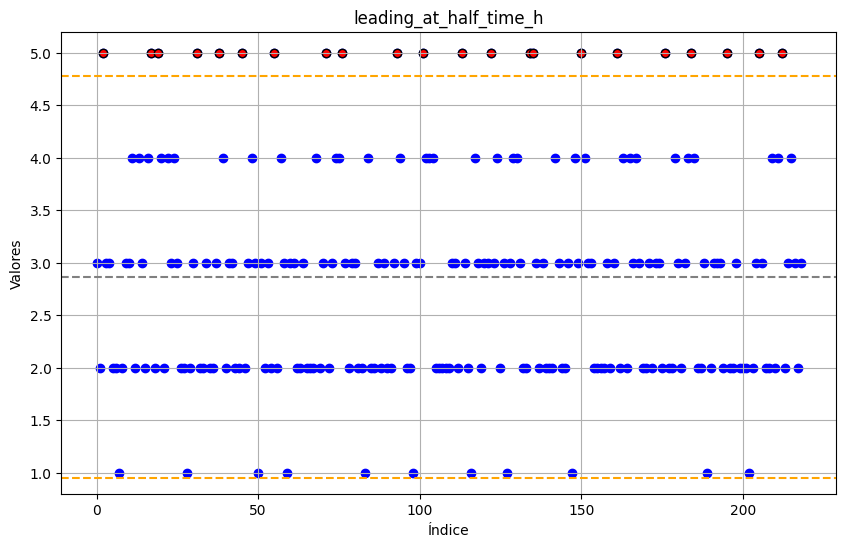

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.863013698630137' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


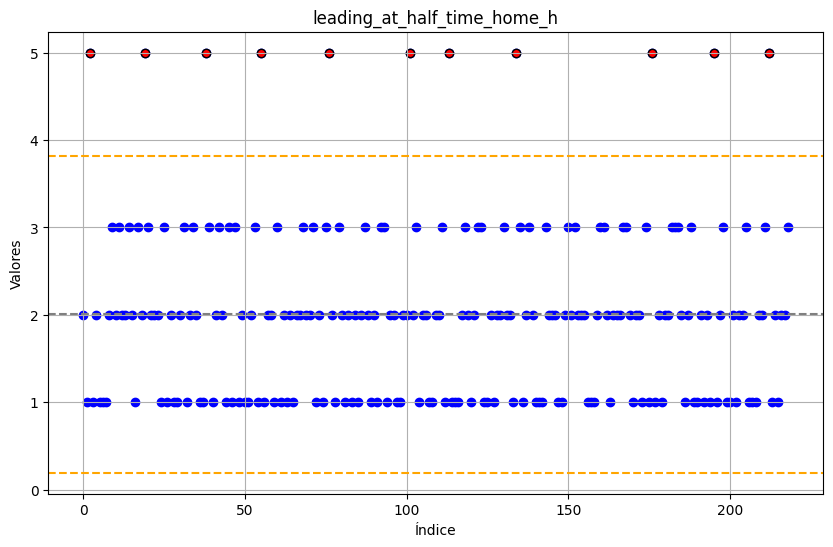

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0045662100456623' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


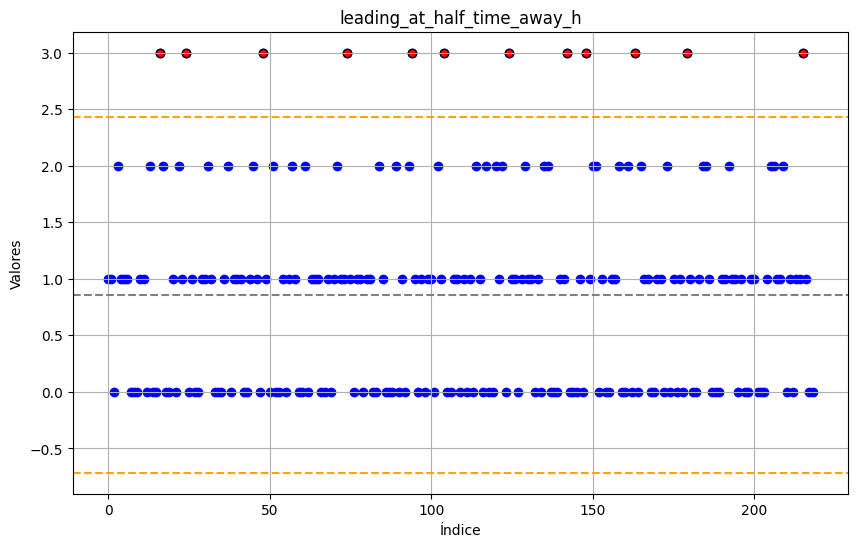

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8584474885844748' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


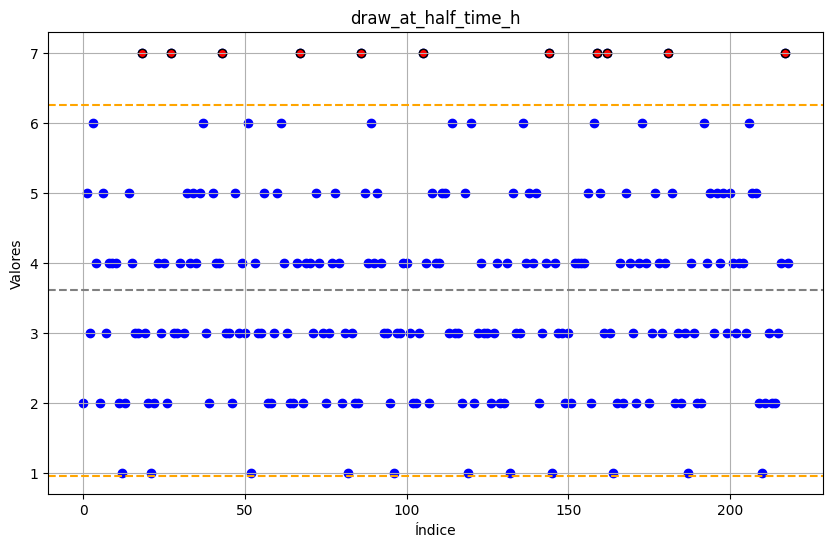

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.6073059360730593' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


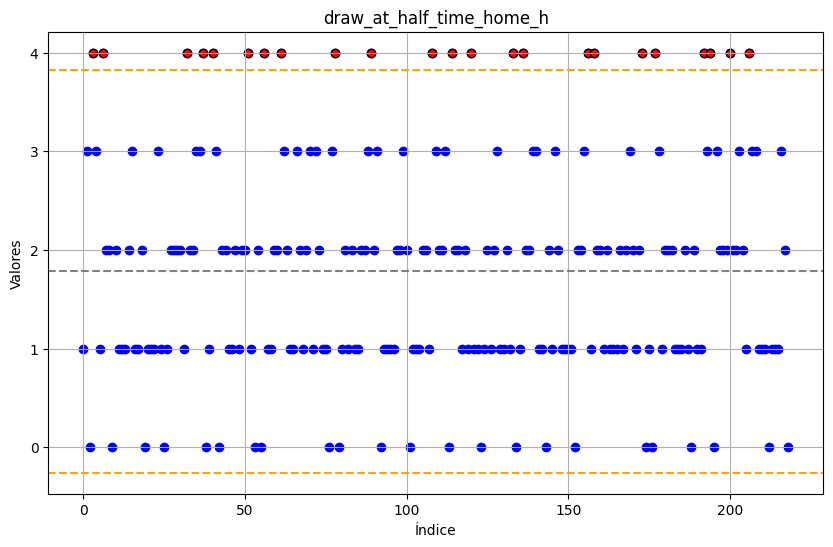

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.7853881278538812' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


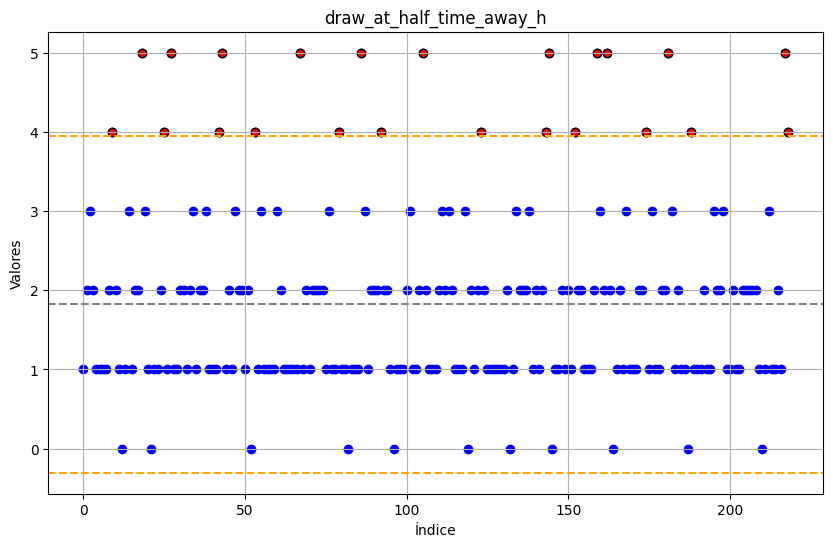

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.821917808219178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


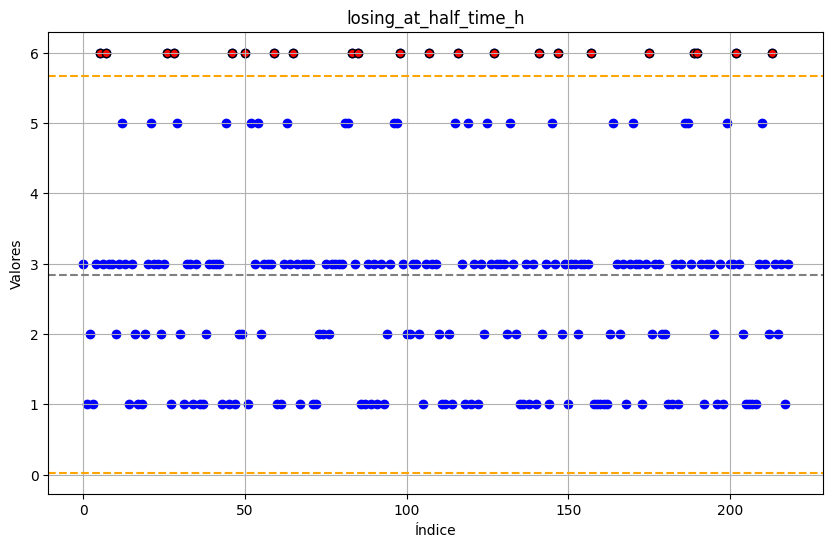

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.8447488584474887' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


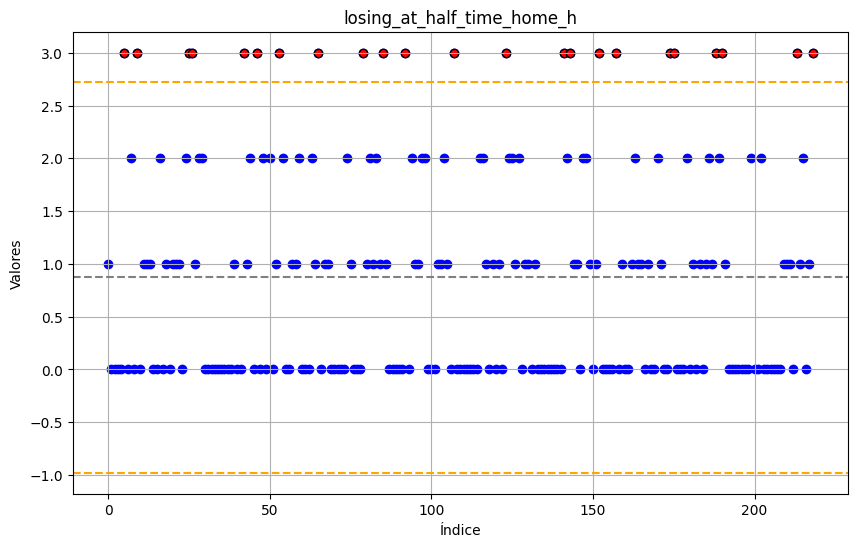

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8721461187214612' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


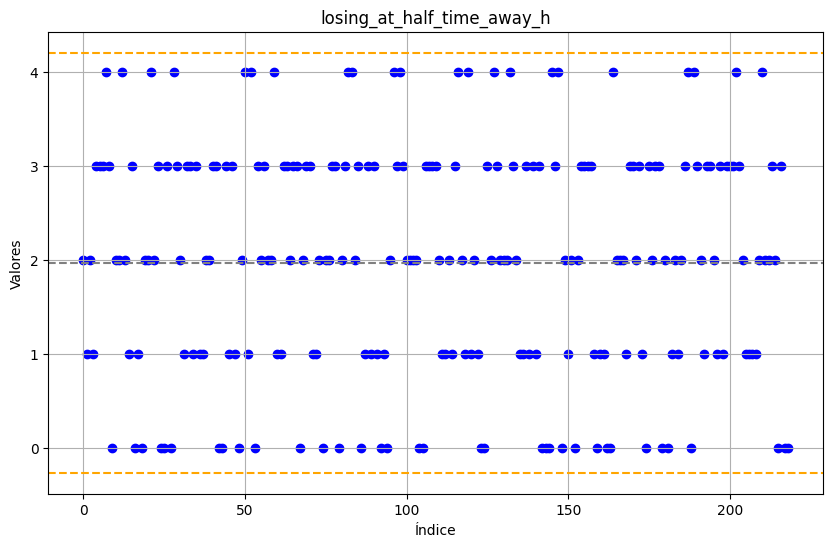

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9726027397260273' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


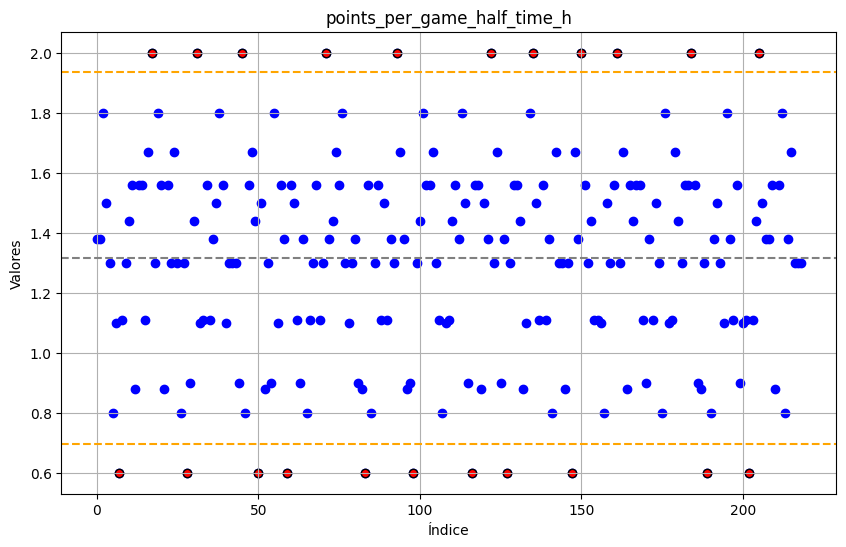

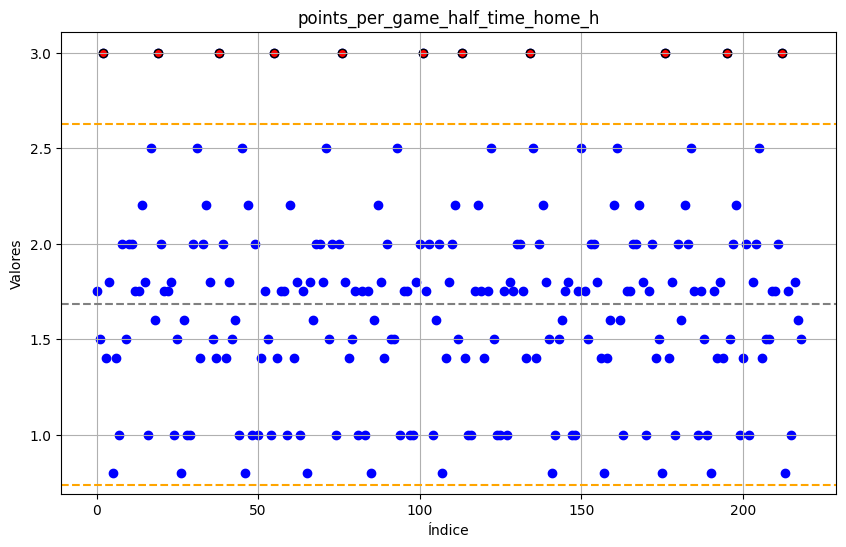

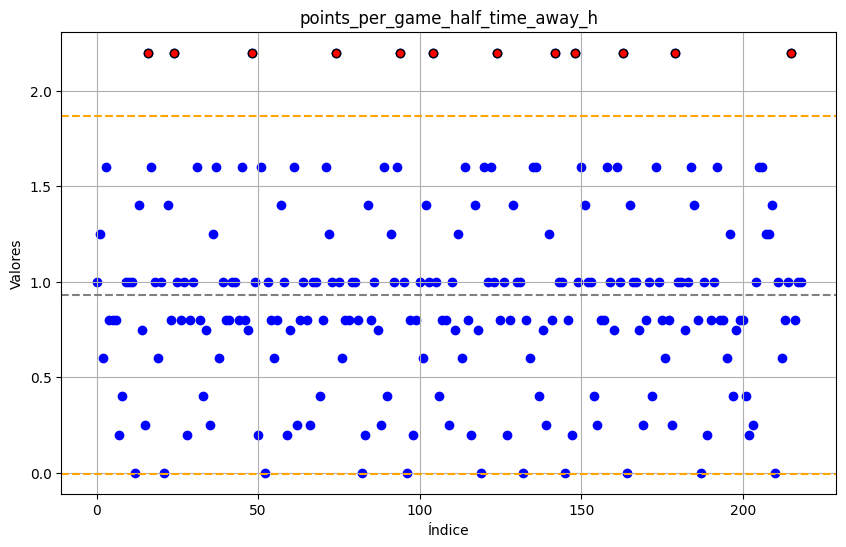

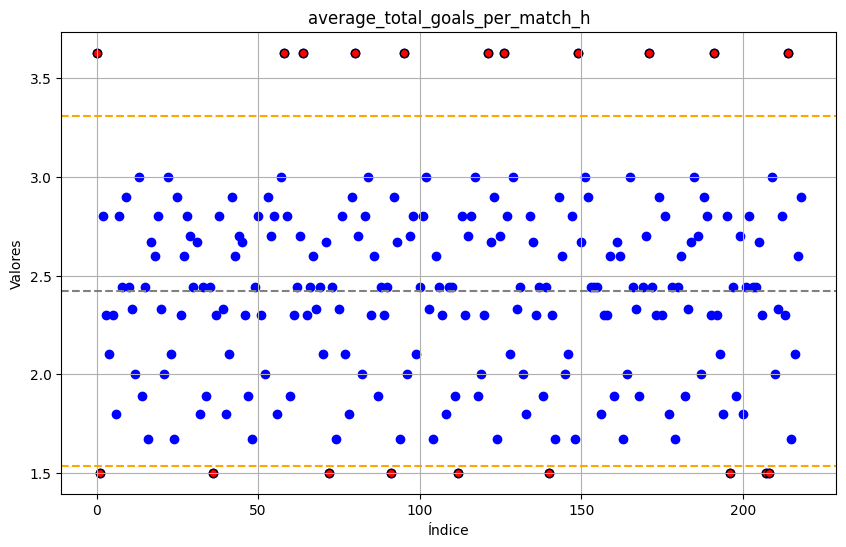

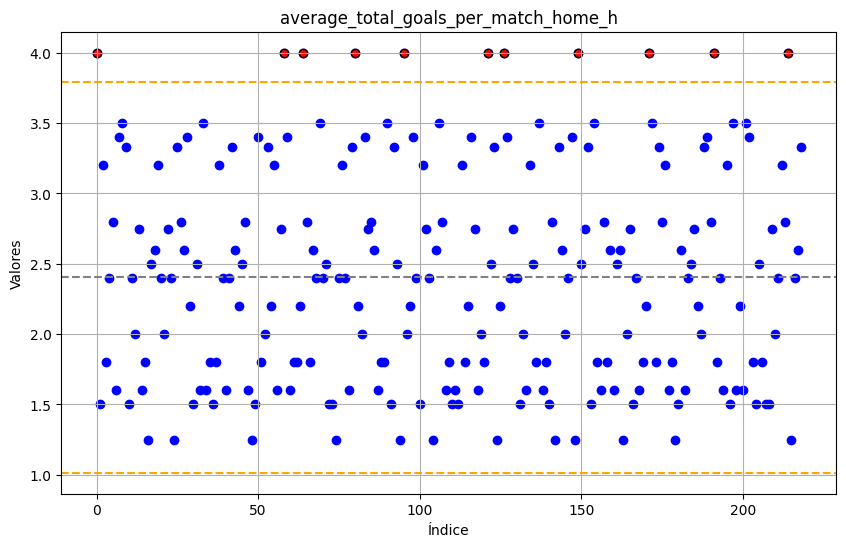

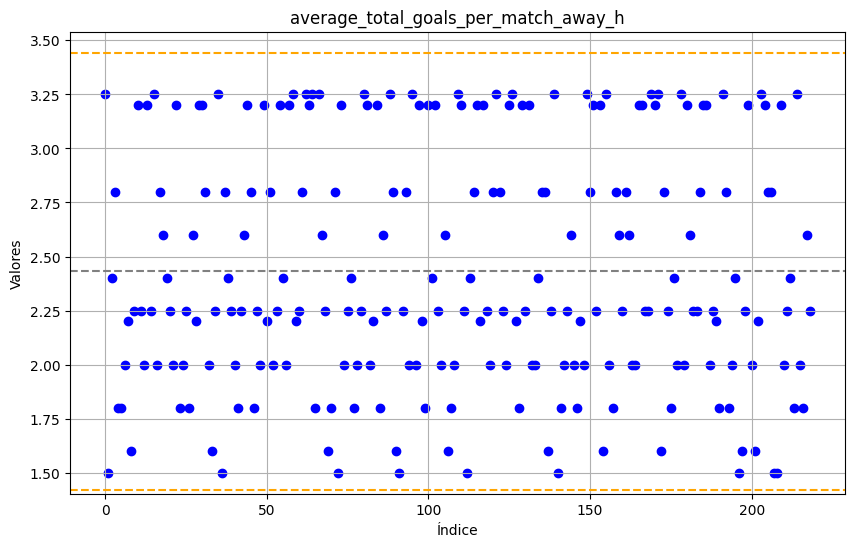

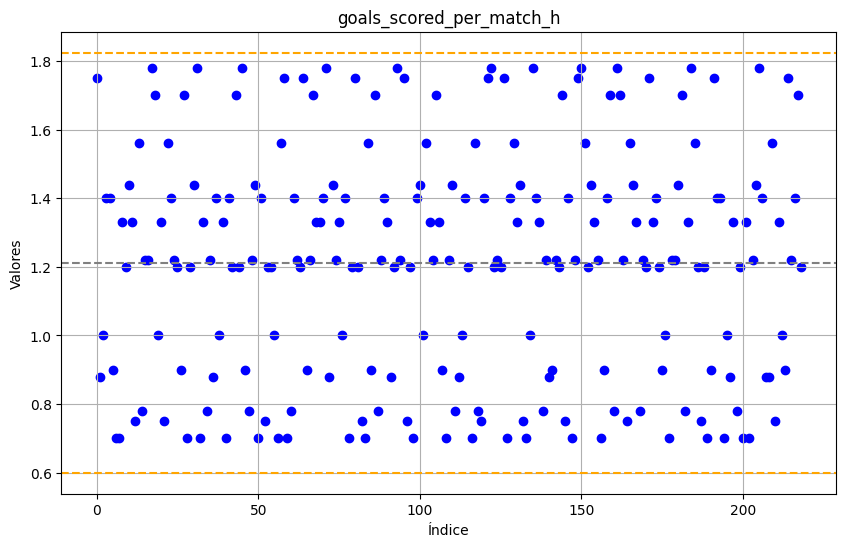

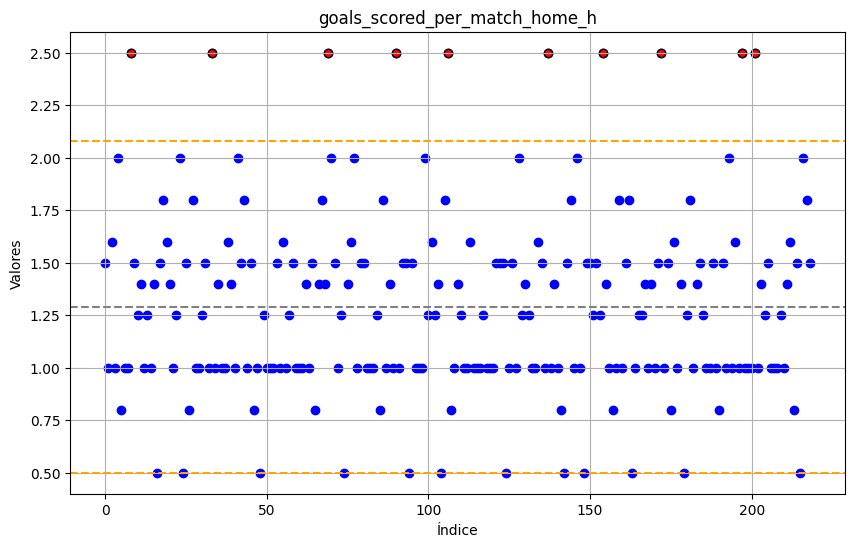

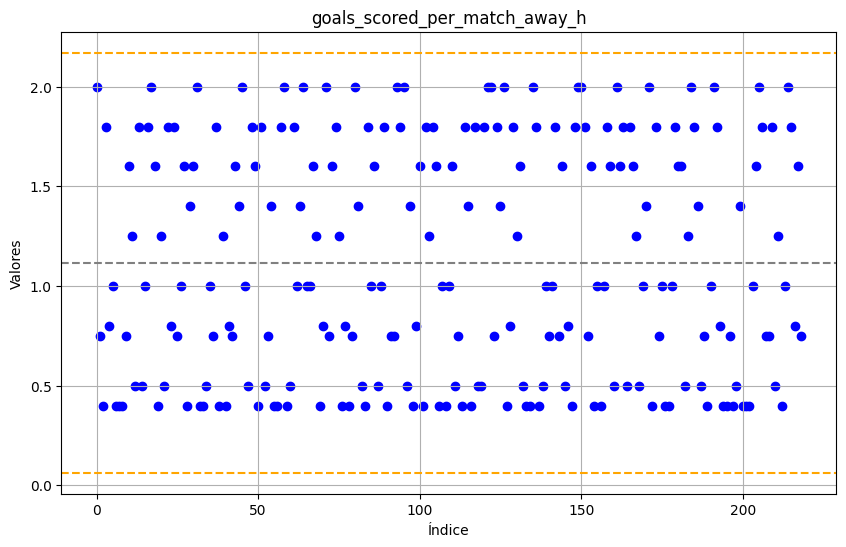

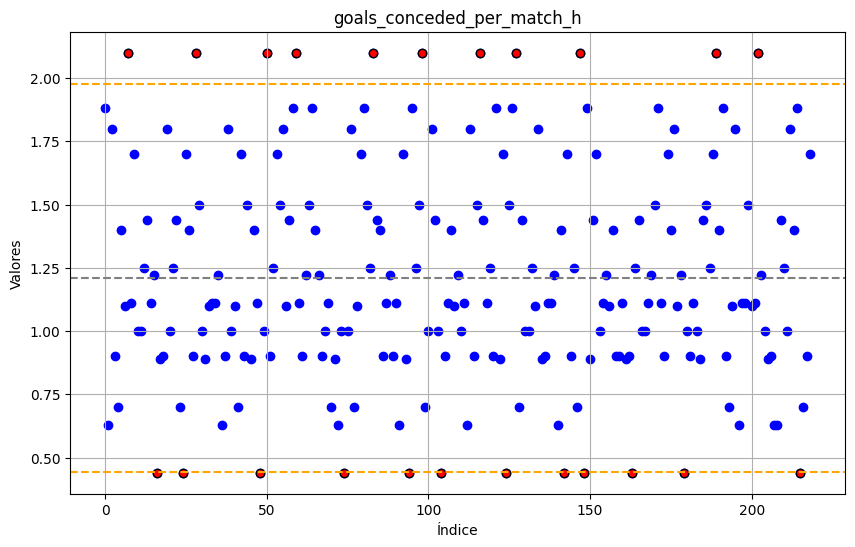

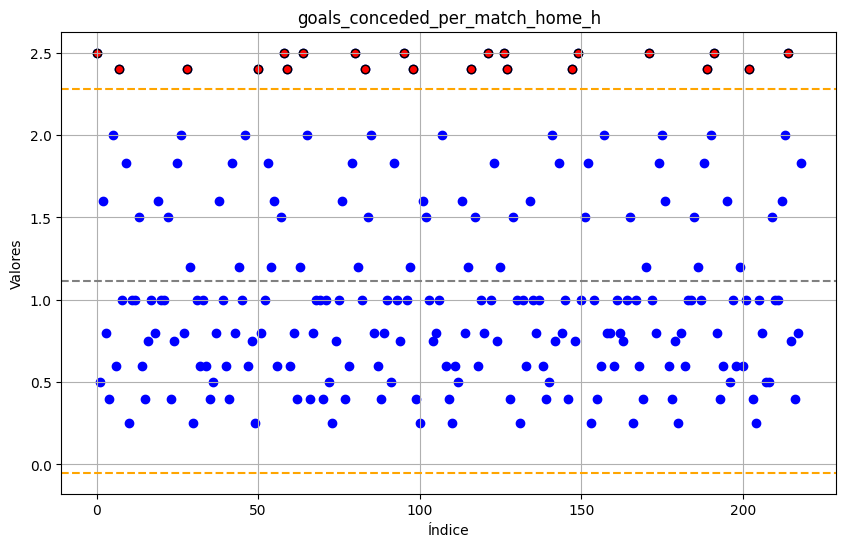

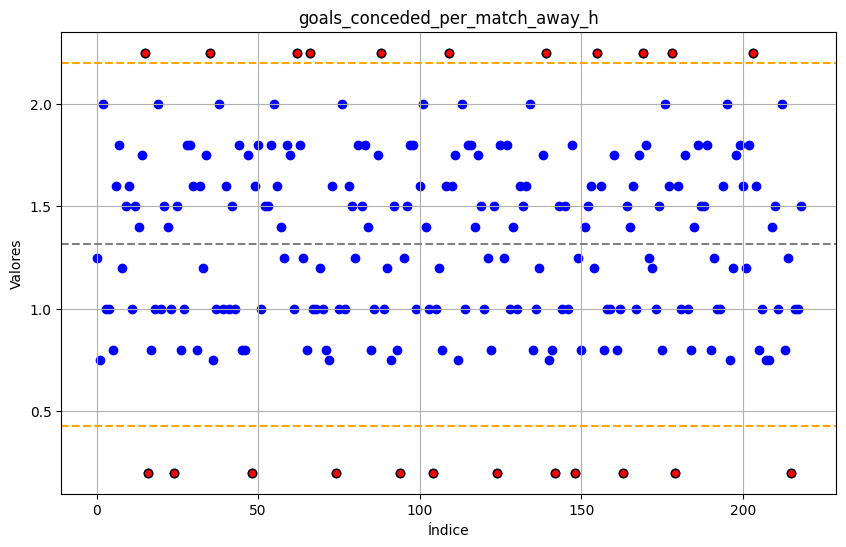

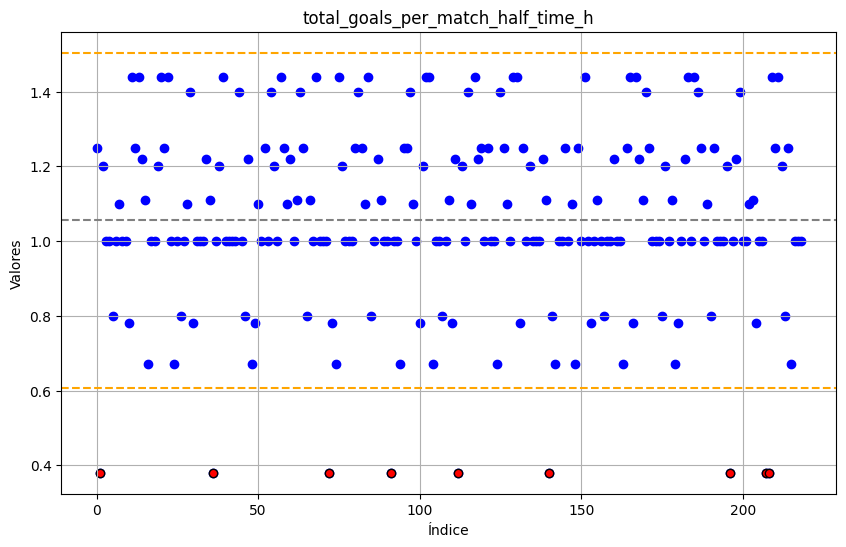

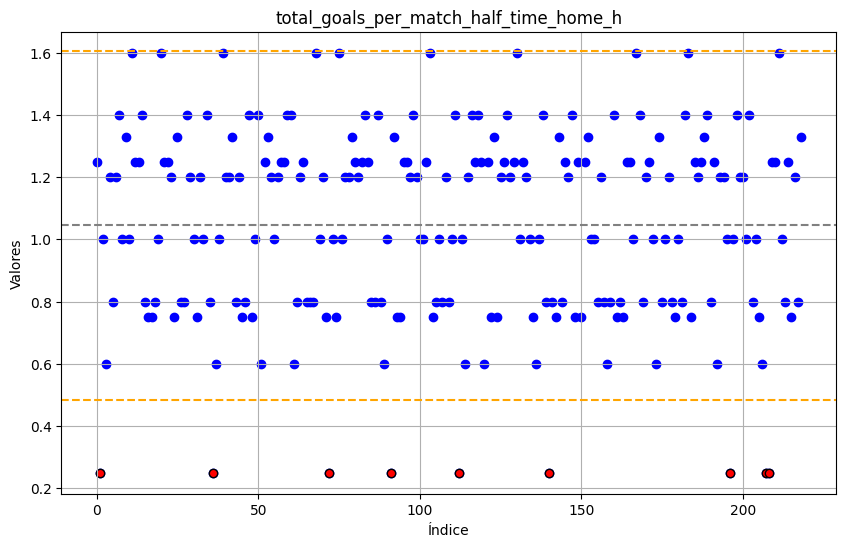

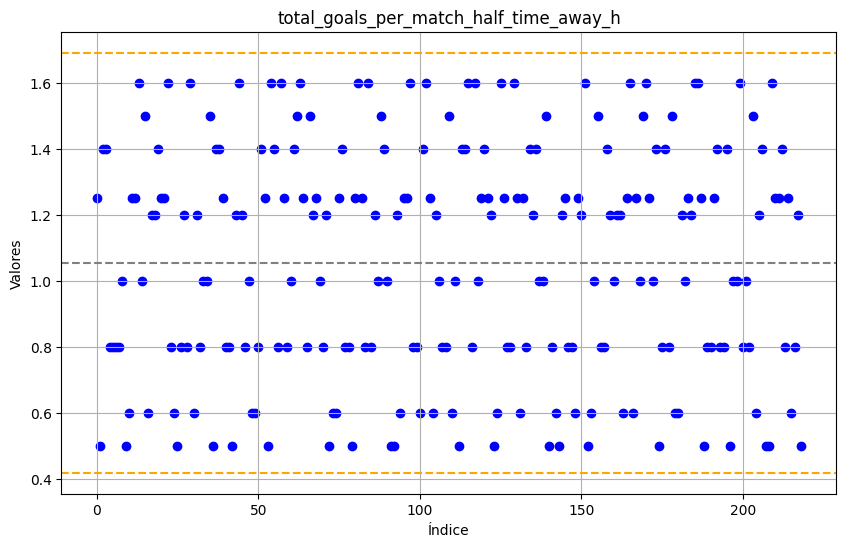

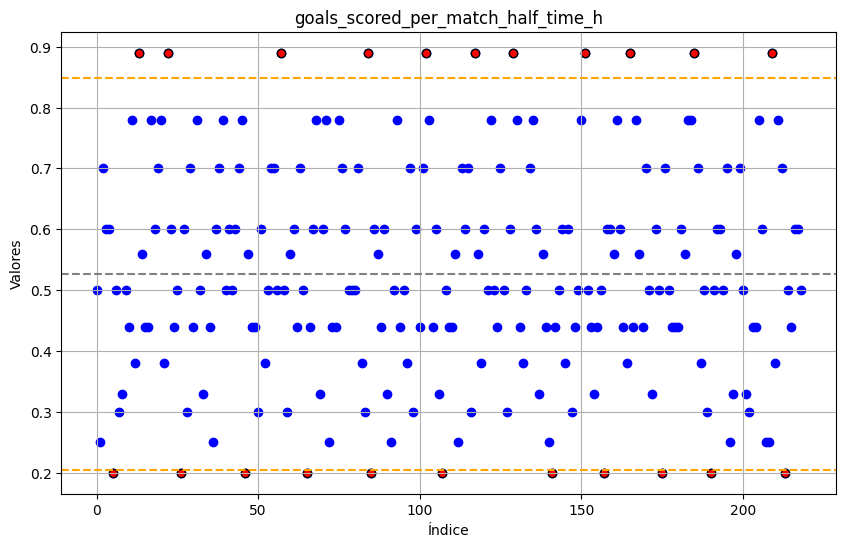

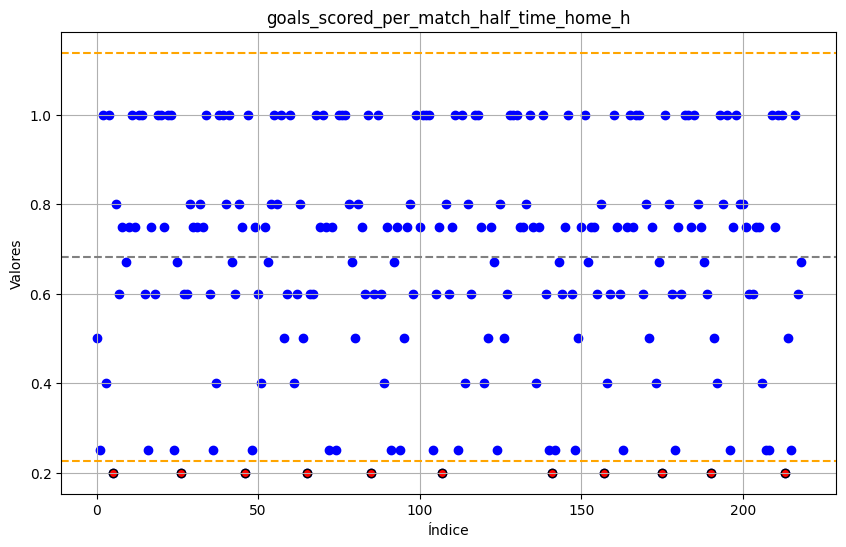

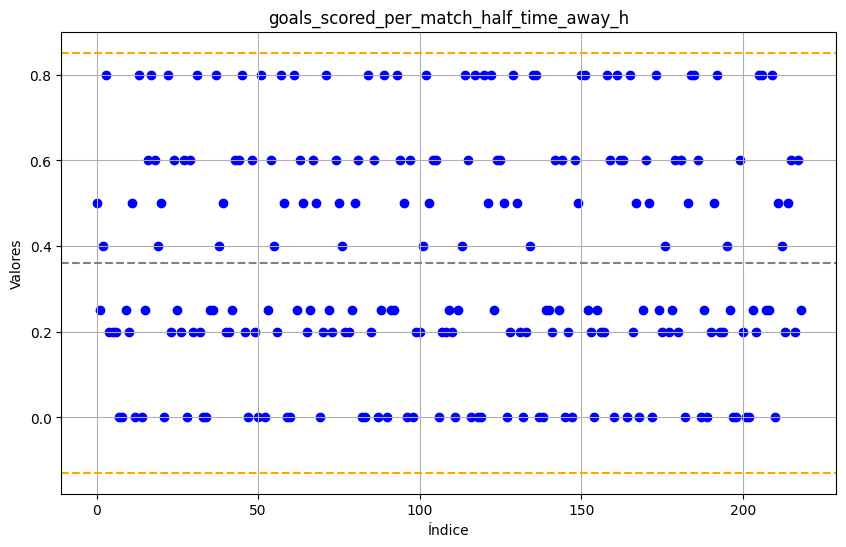

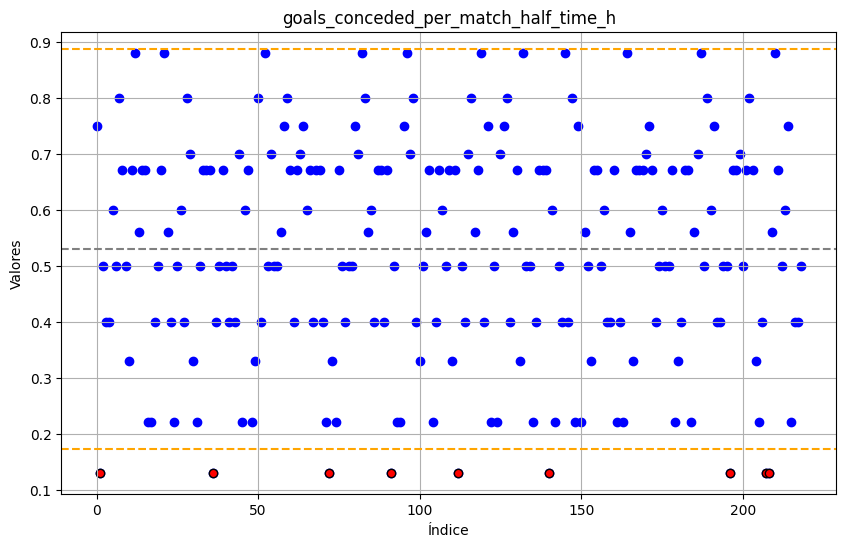

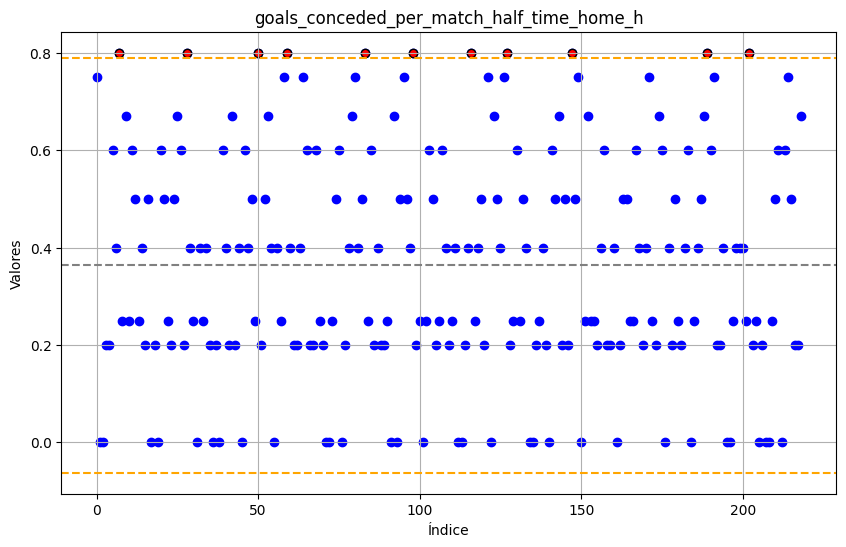

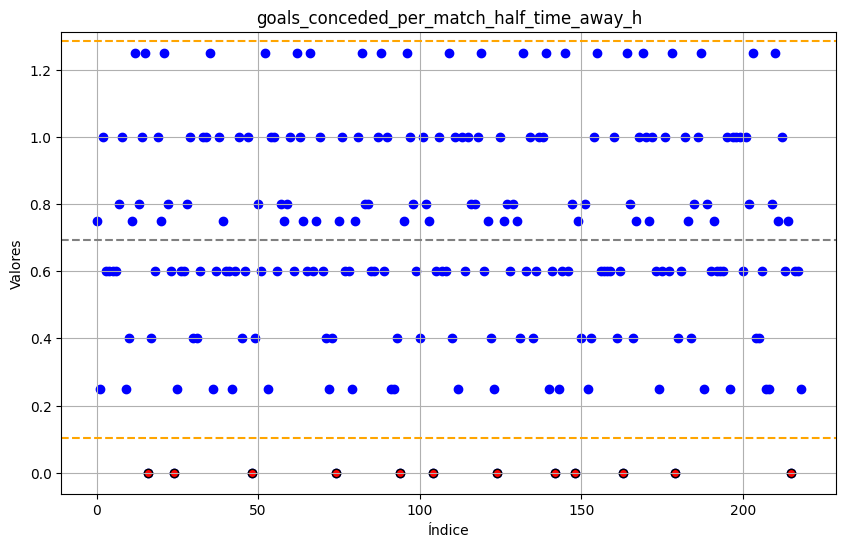

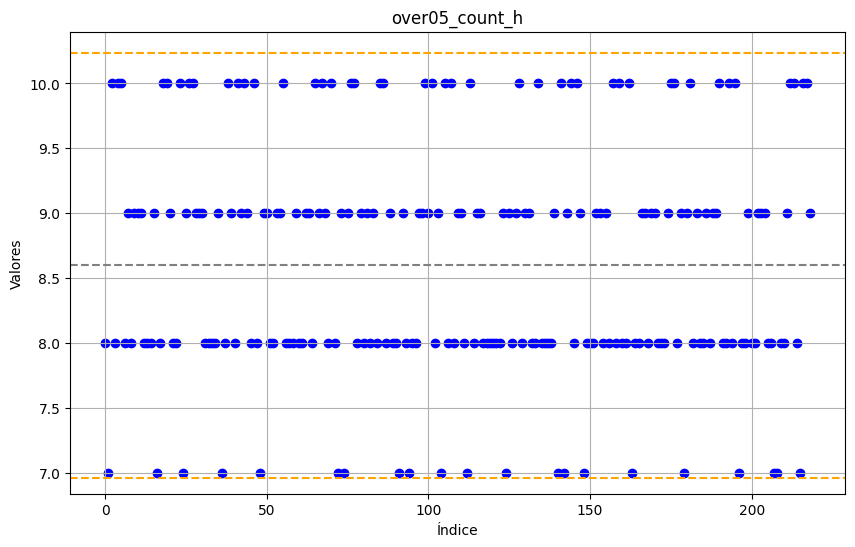

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.598173515981735' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


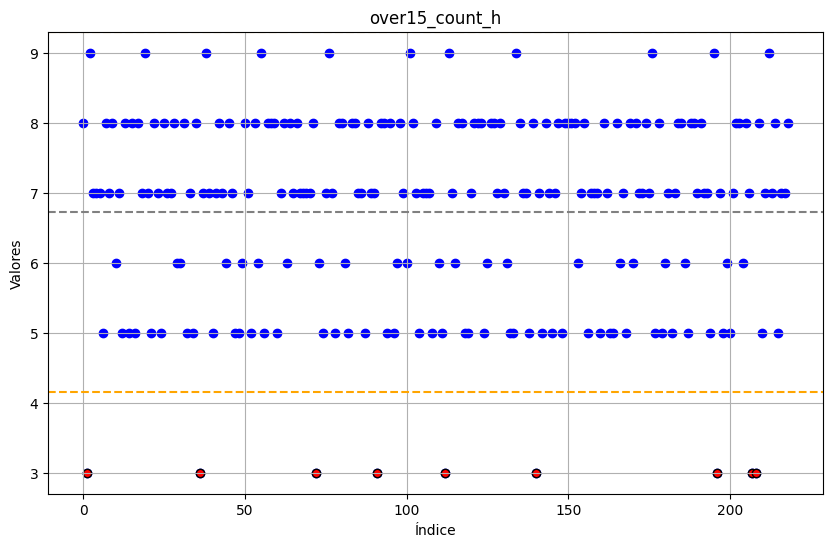

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.7214611872146115' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


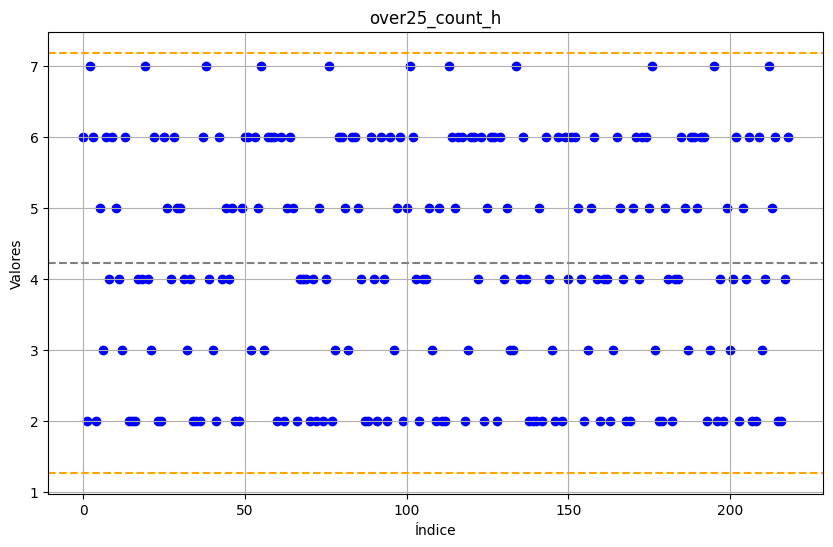

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.228310502283105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


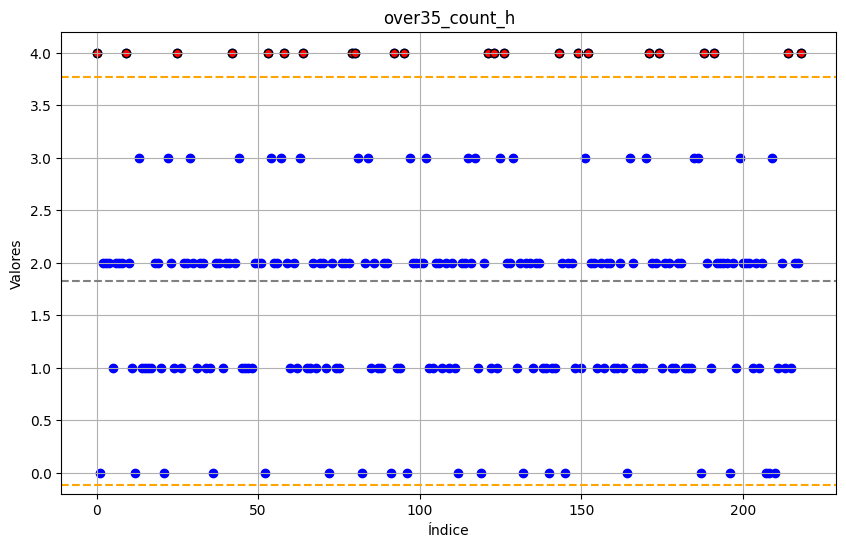

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.821917808219178' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


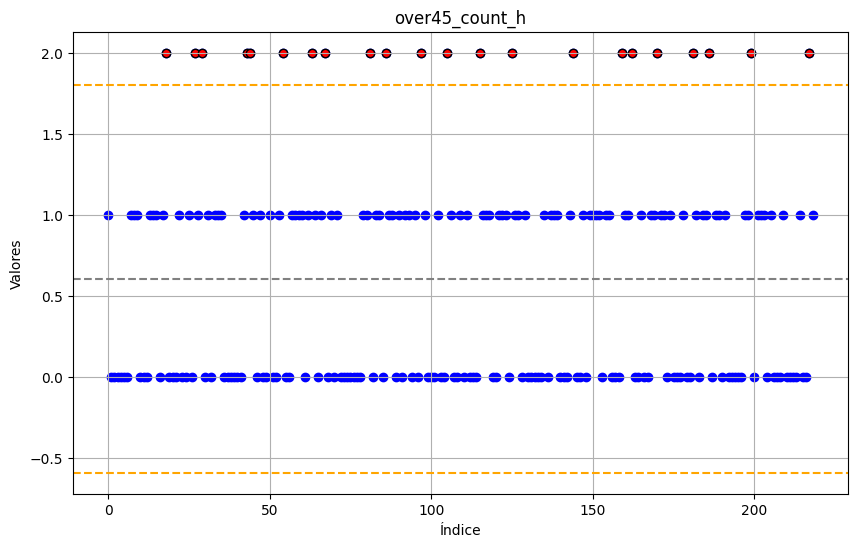

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6073059360730594' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


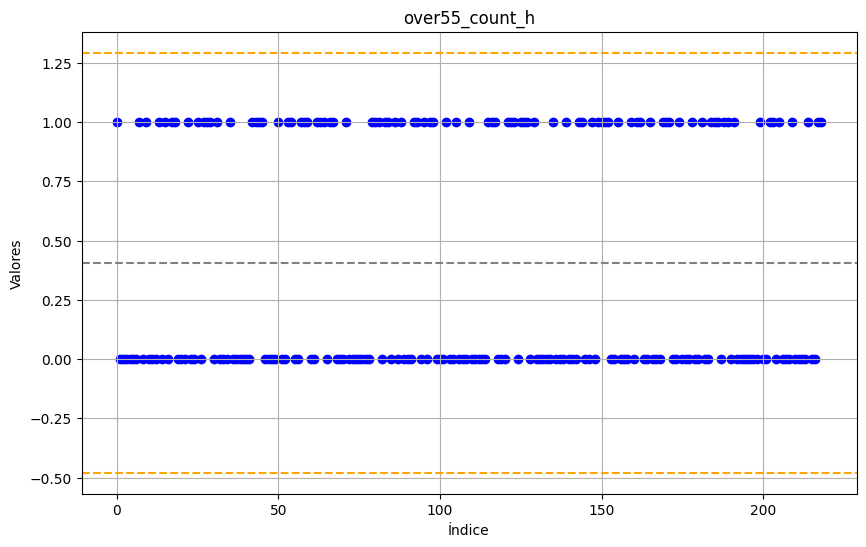

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4063926940639269' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


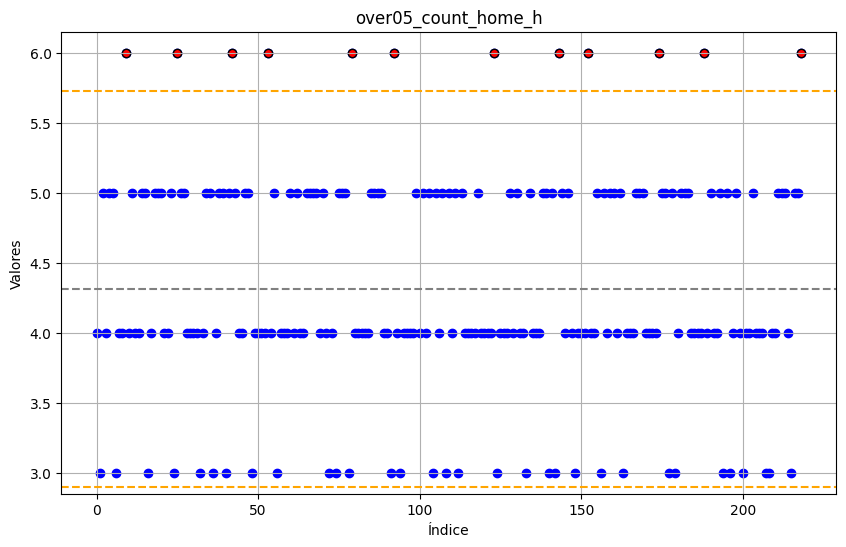

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.310502283105023' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


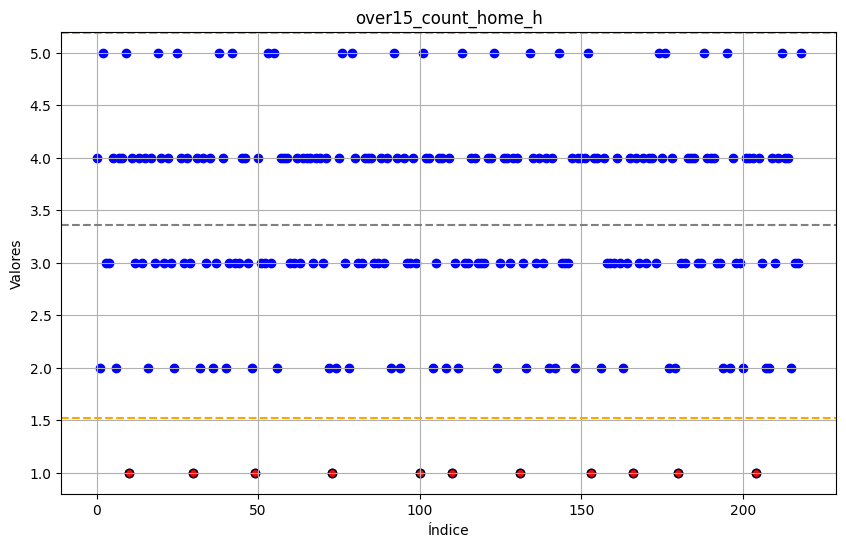

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.356164383561644' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


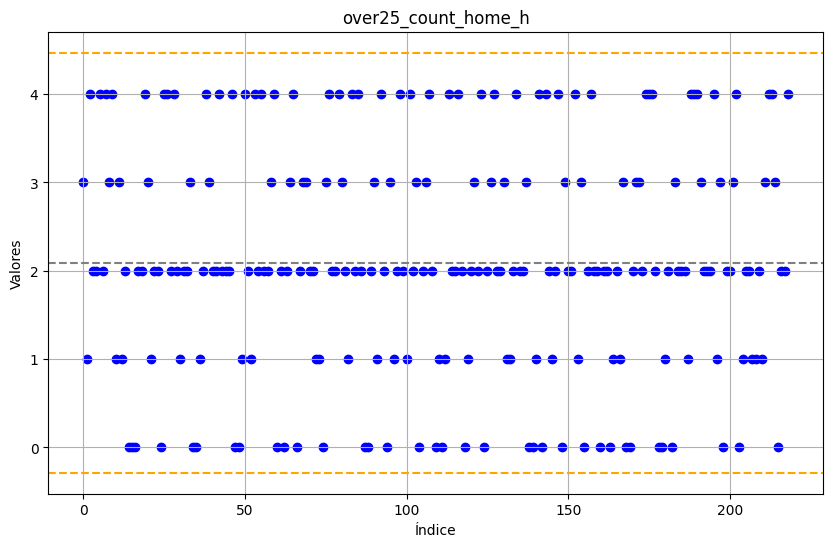

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0913242009132422' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


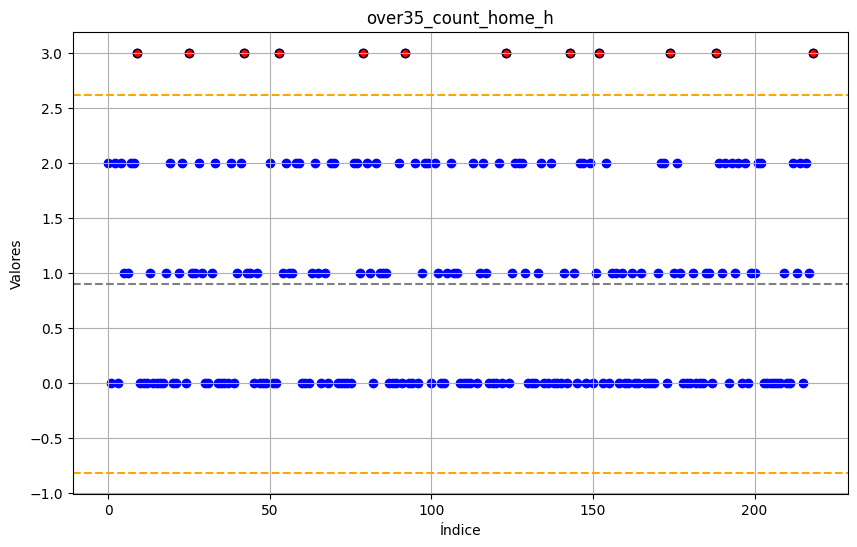

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8995433789954338' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


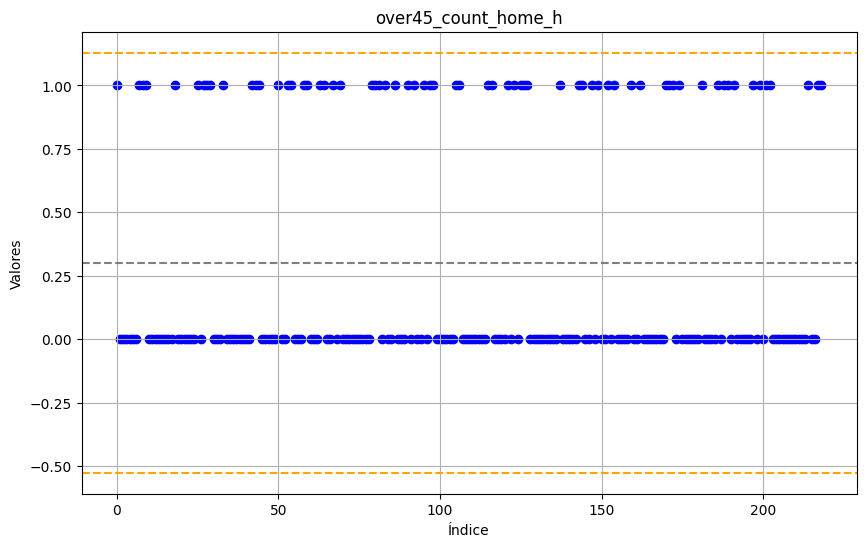

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3013698630136986' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


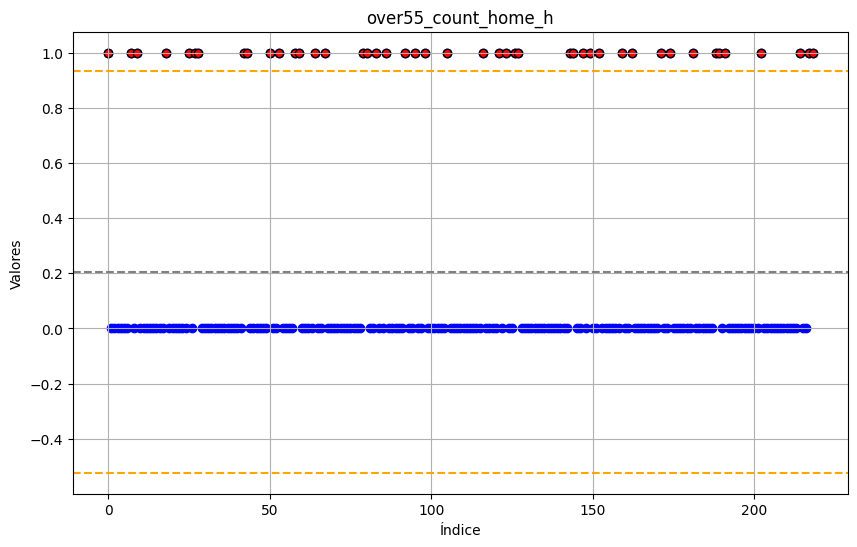

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2054794520547945' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


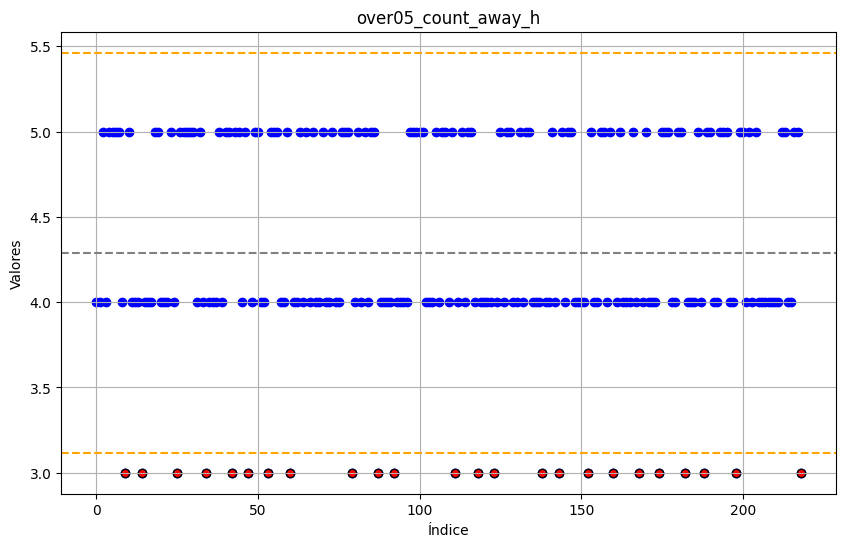

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.287671232876712' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


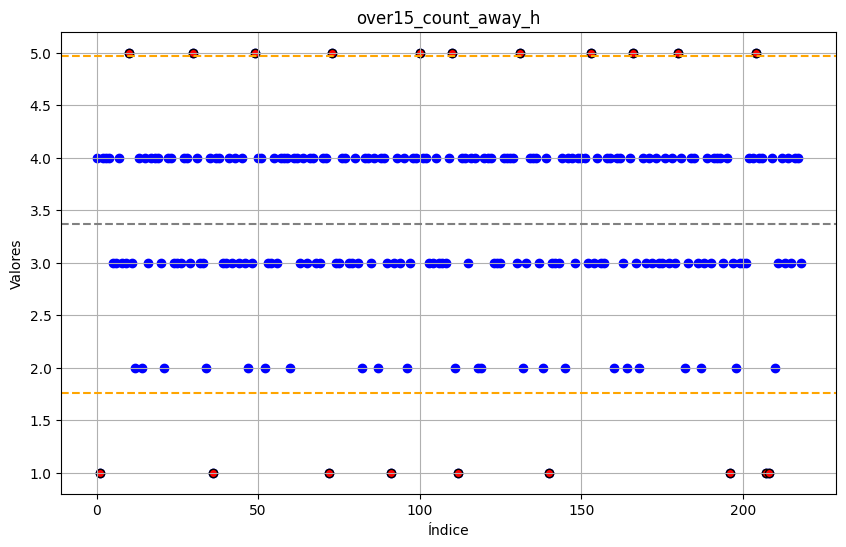

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.365296803652968' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


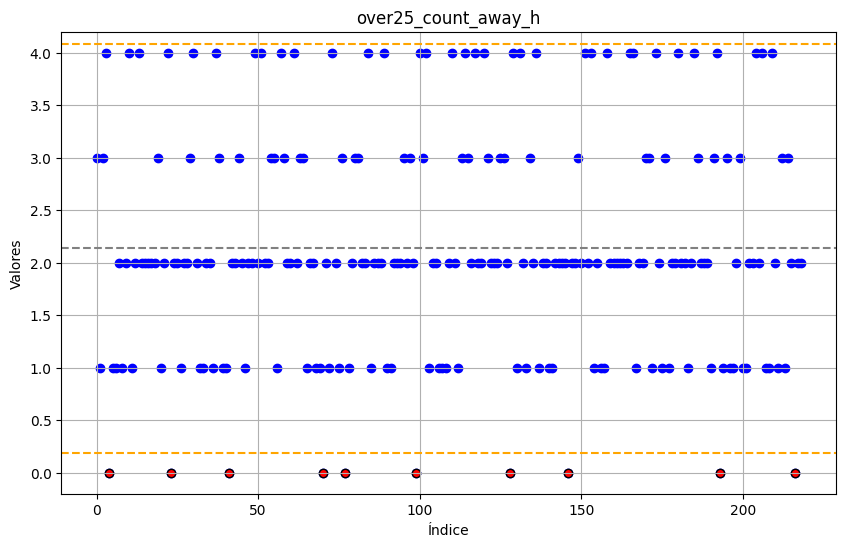

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.136986301369863' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


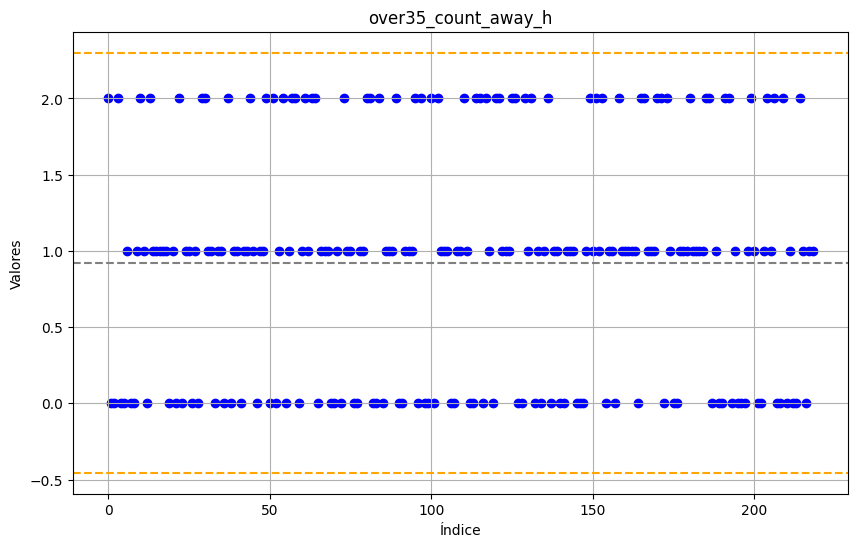

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.9223744292237442' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


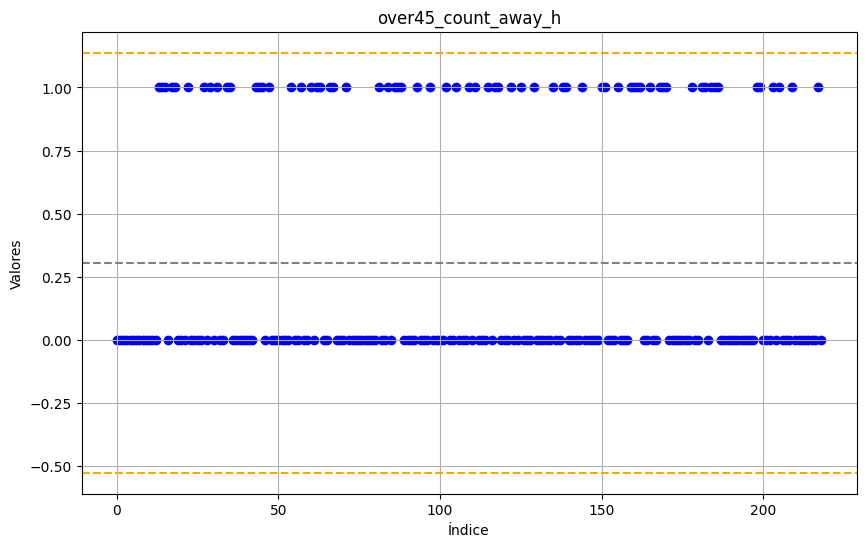

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3059360730593607' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


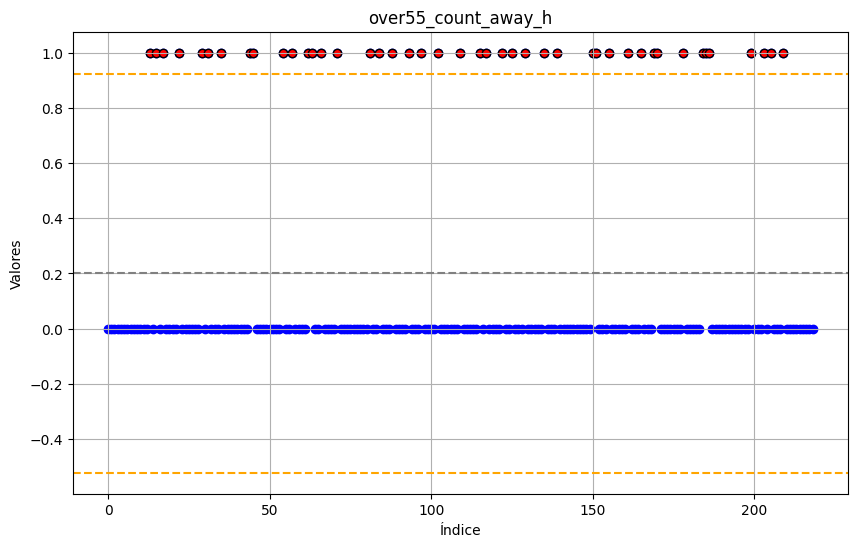

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.2009132420091324' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


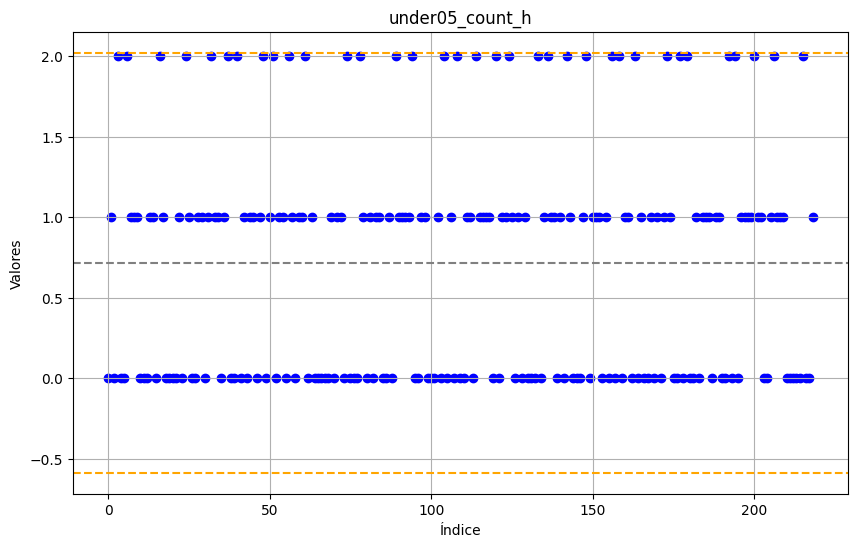

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.7168949771689498' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


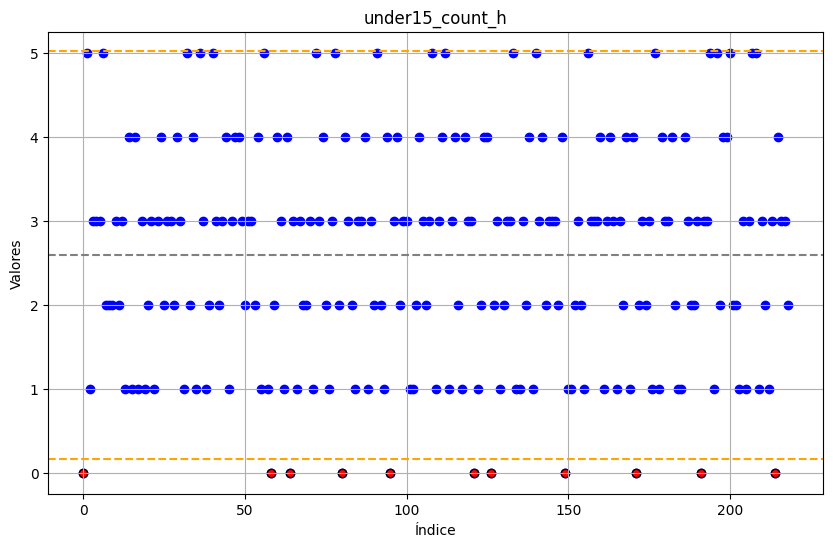

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.593607305936073' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


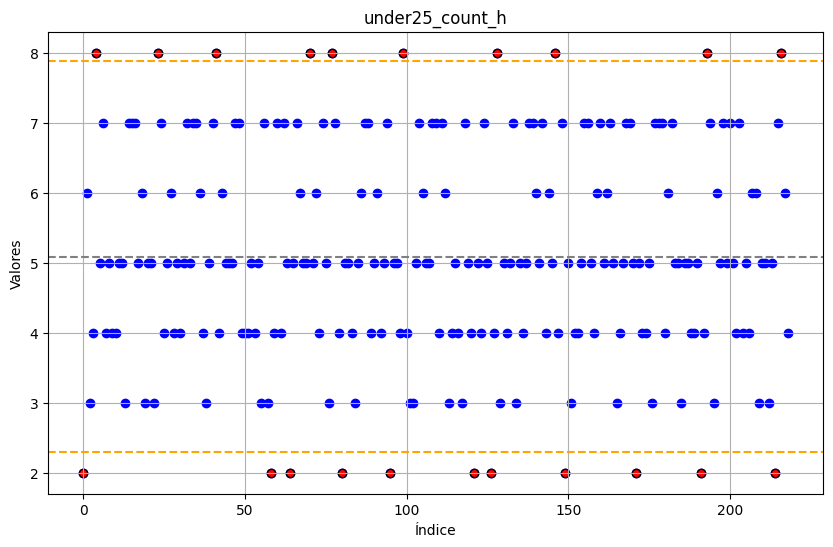

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.0867579908675795' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


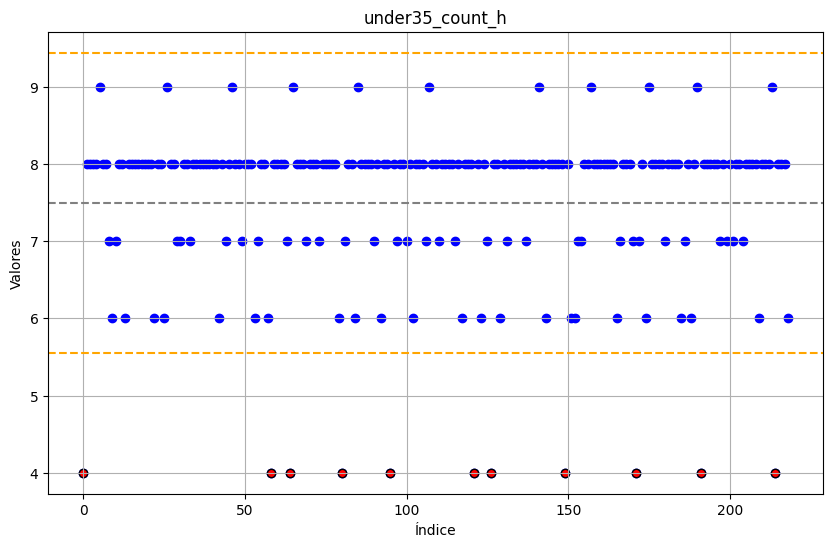

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.493150684931507' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


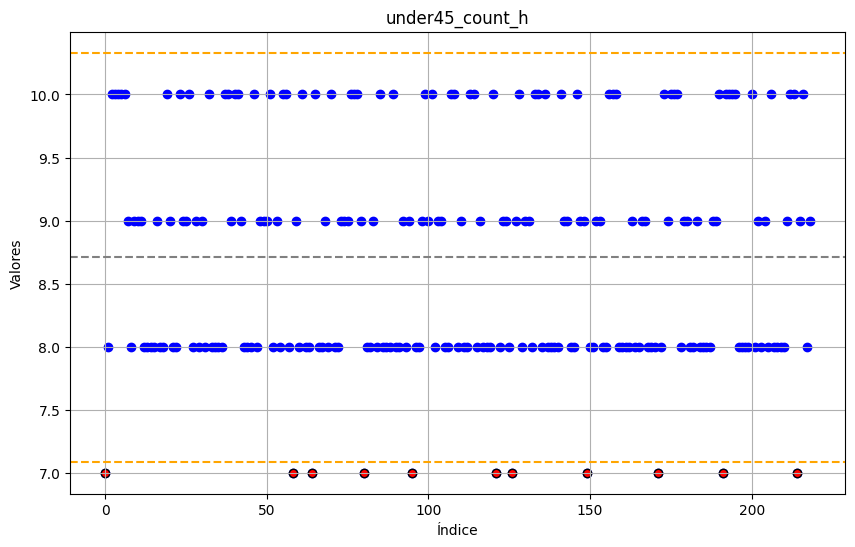

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.707762557077626' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


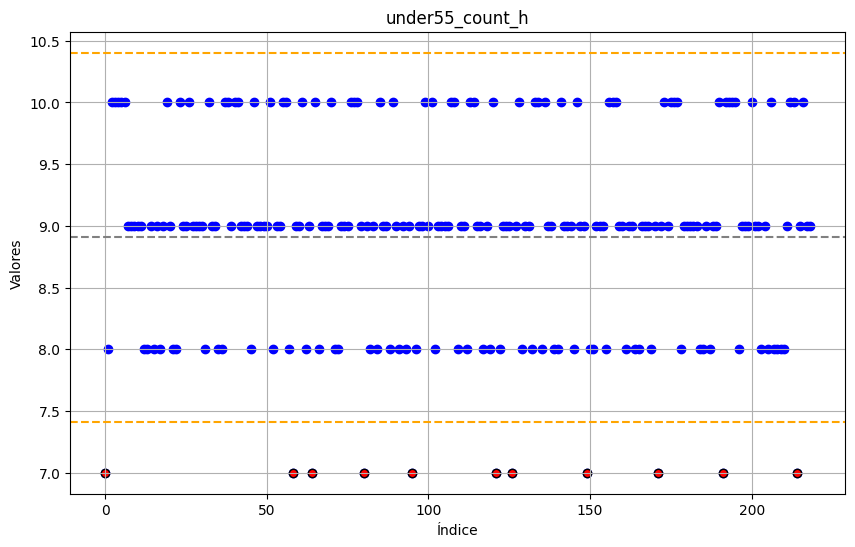

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.908675799086758' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


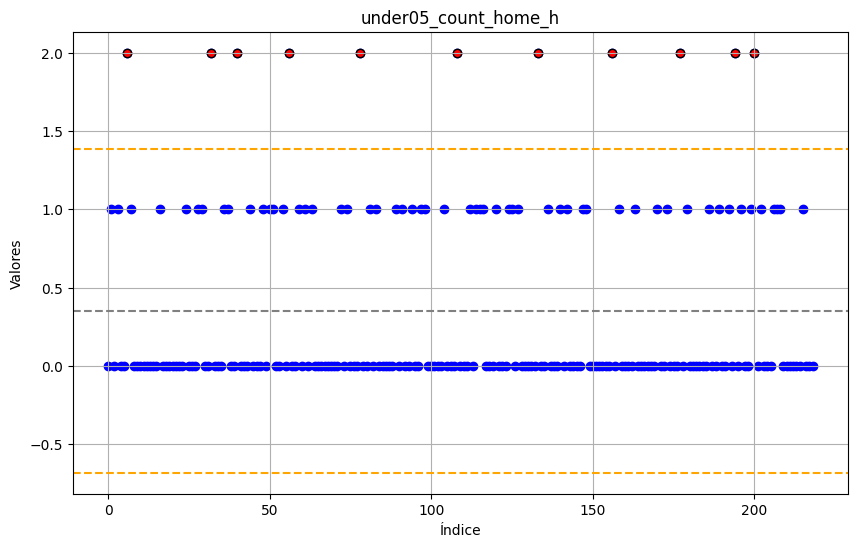

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3515981735159817' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


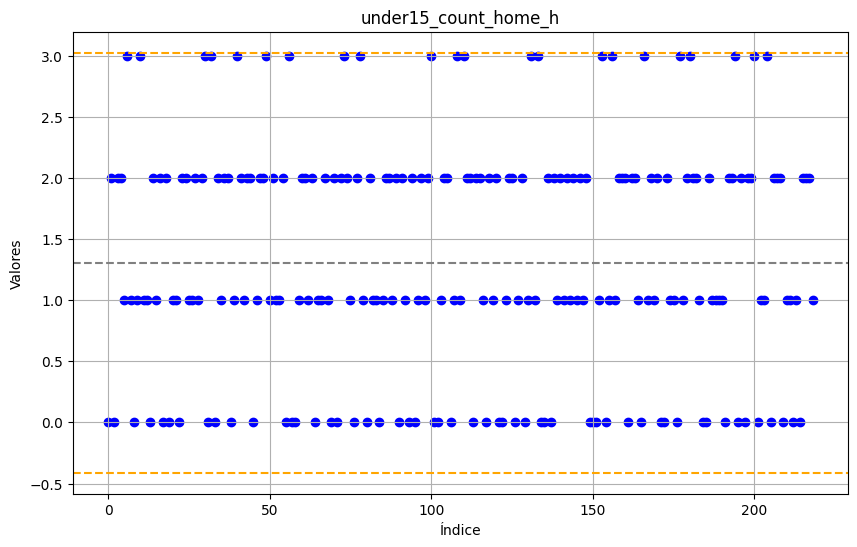

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3059360730593608' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


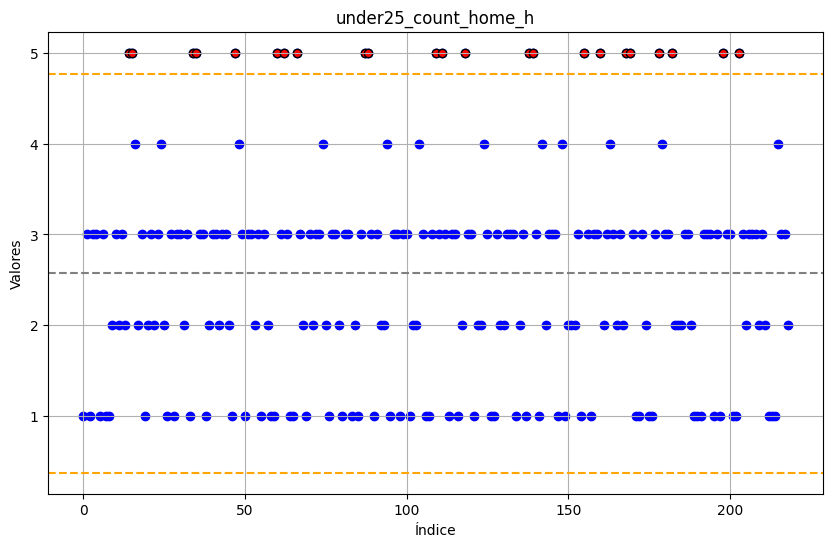

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5707762557077625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


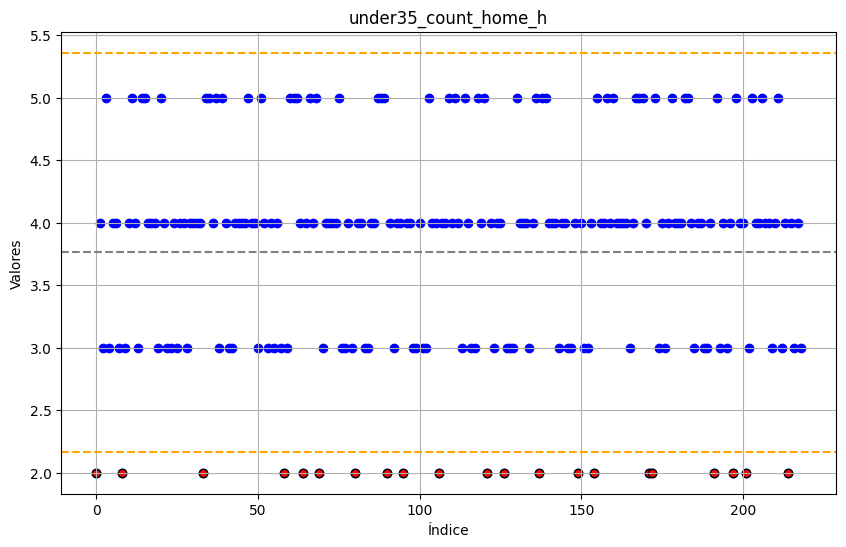

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.7625570776255706' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


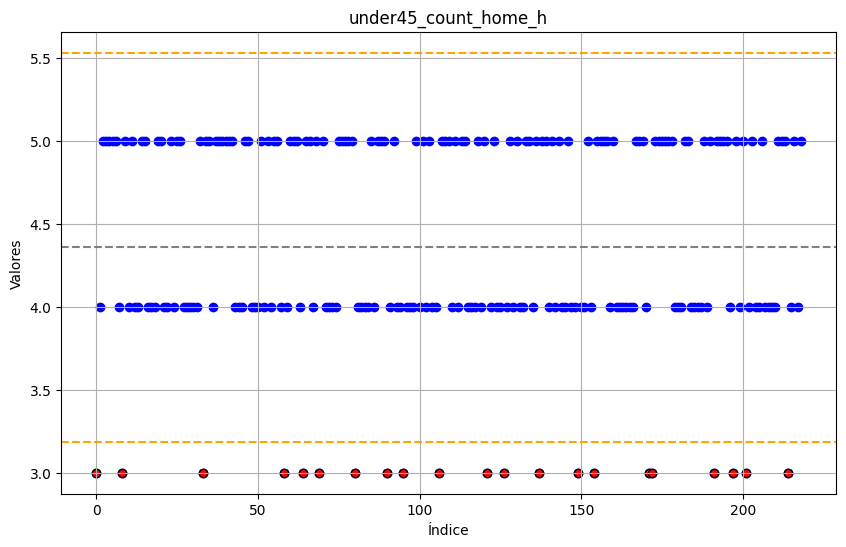

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.360730593607306' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


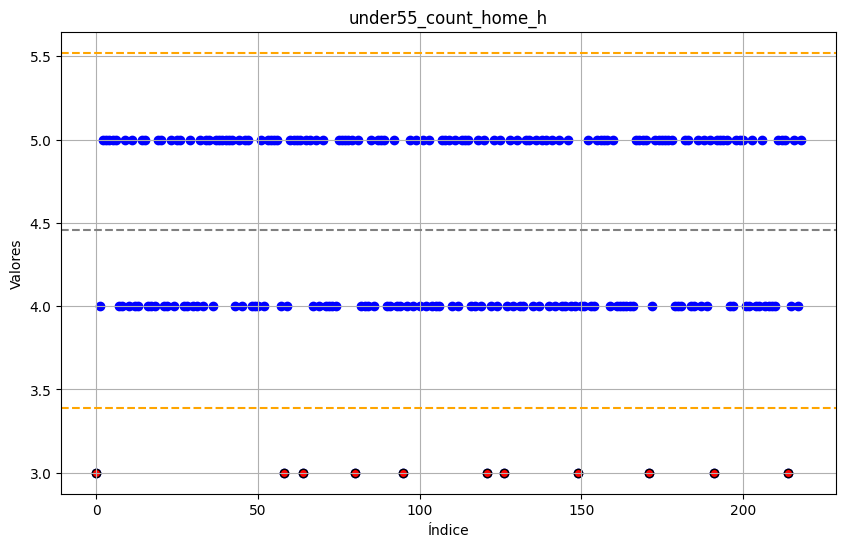

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.45662100456621' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


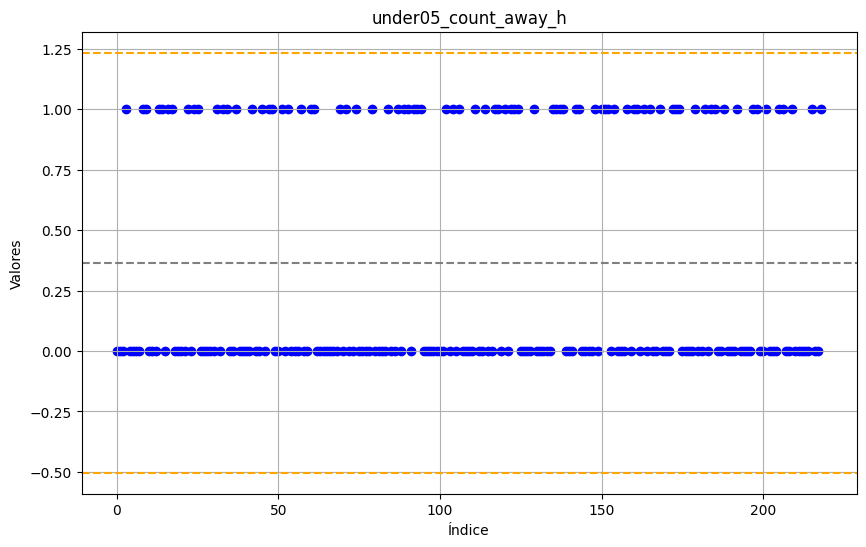

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.365296803652968' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


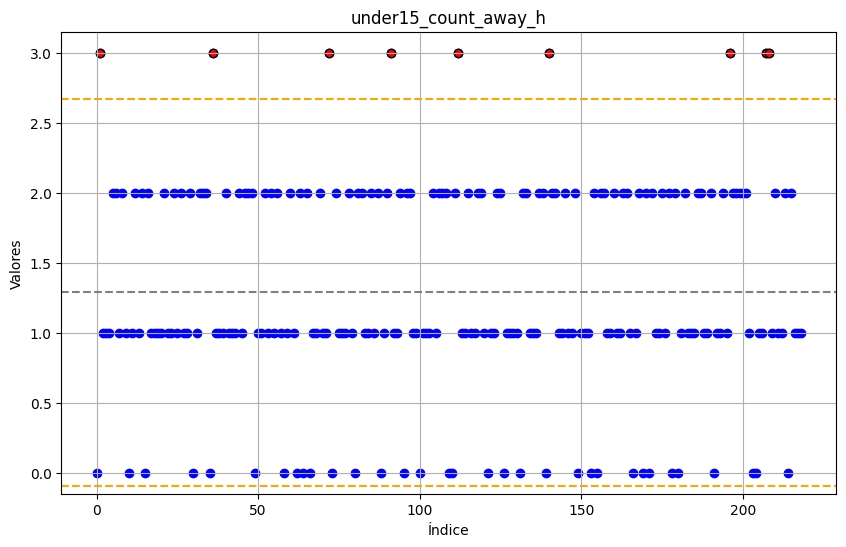

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.2876712328767124' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


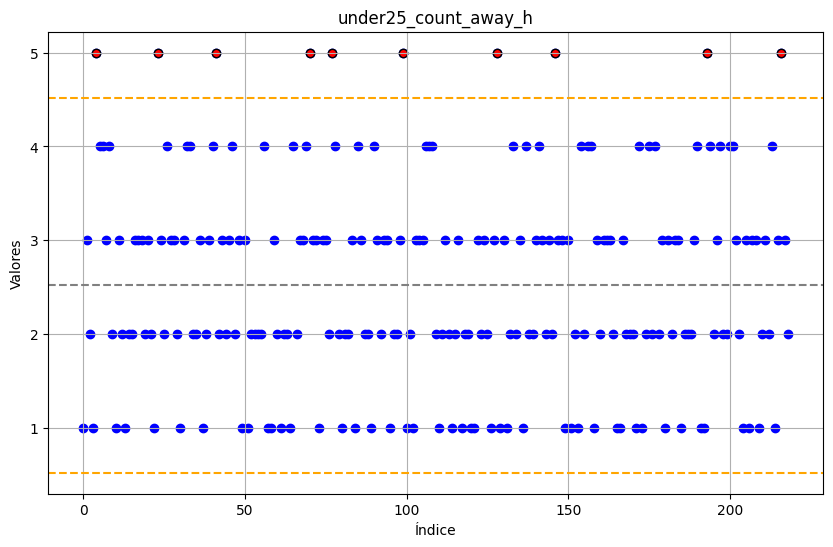

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.5159817351598175' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


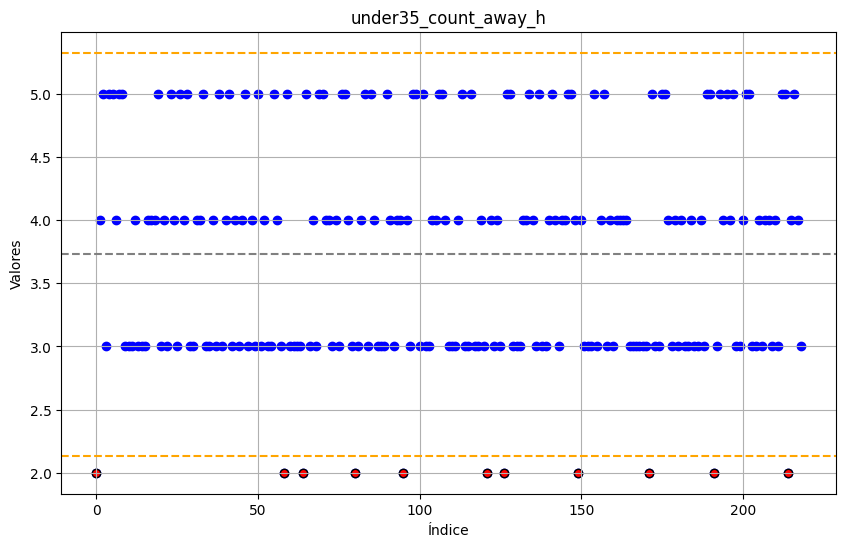

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.730593607305936' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


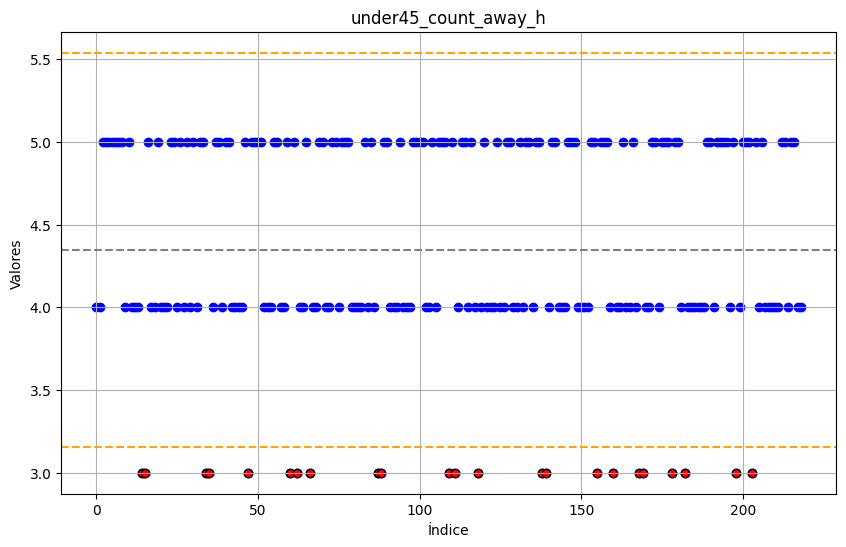

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.34703196347032' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


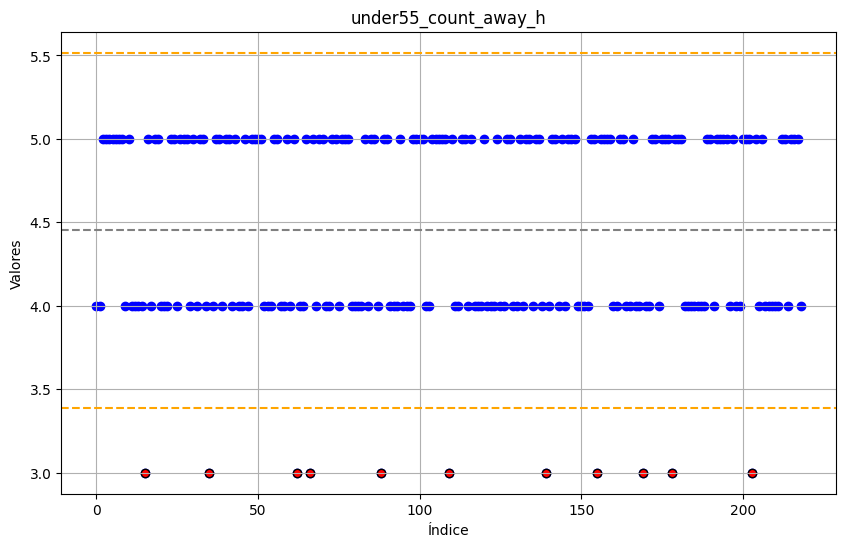

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.4520547945205475' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


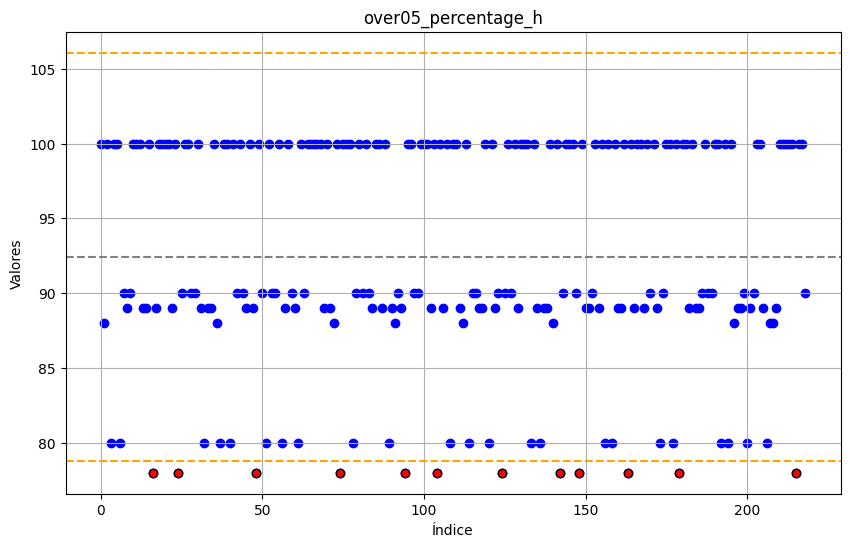

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92.43835616438356' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


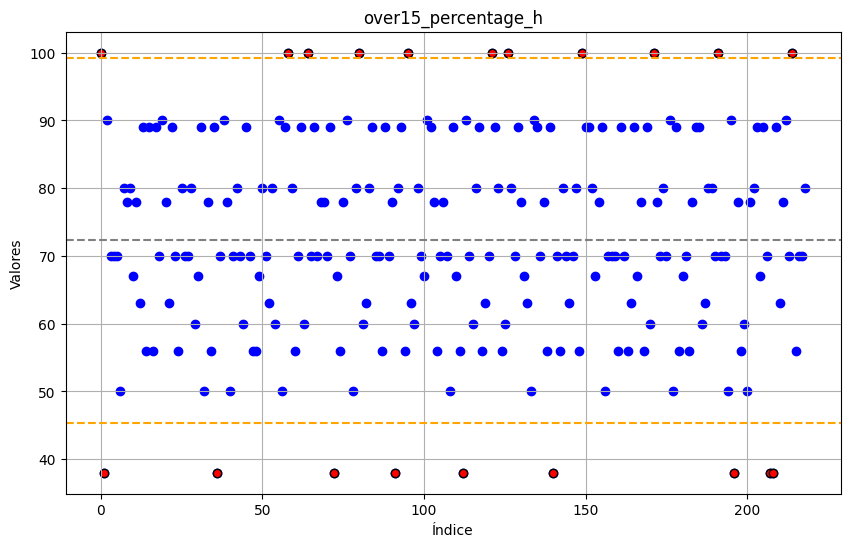

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.29680365296804' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


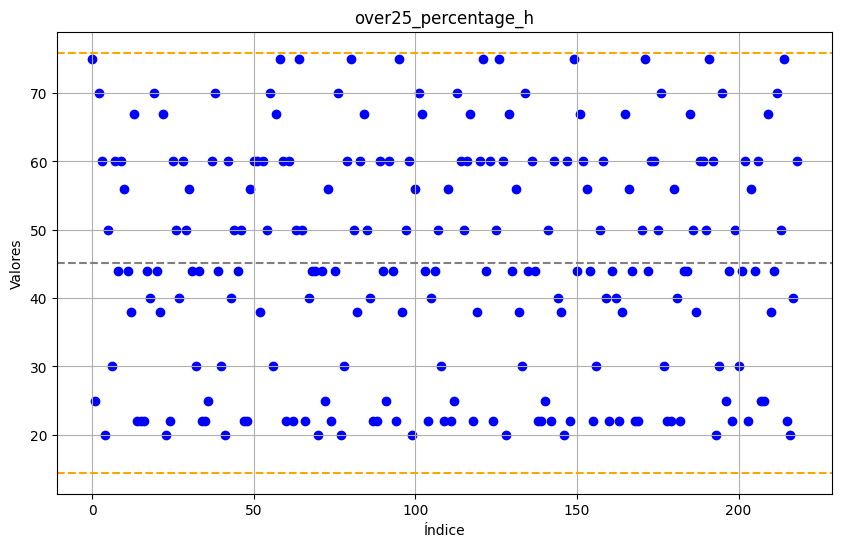

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45.182648401826484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


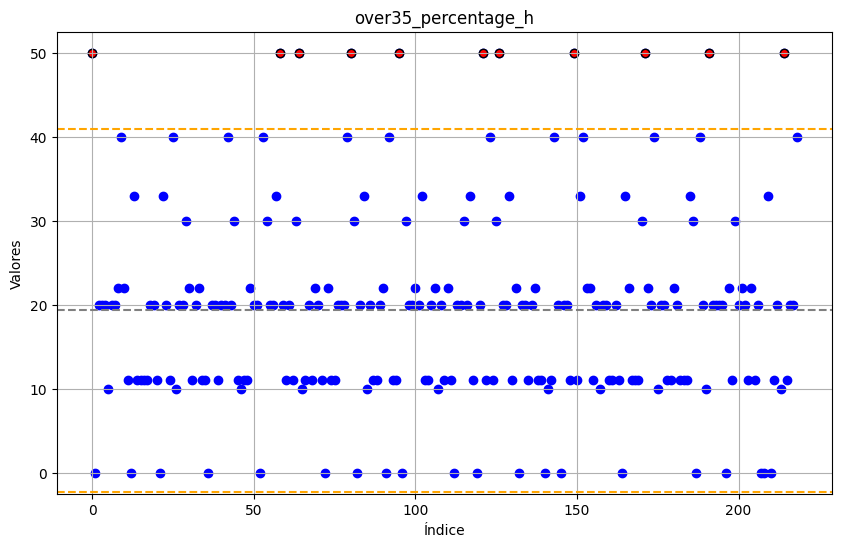

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.319634703196346' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


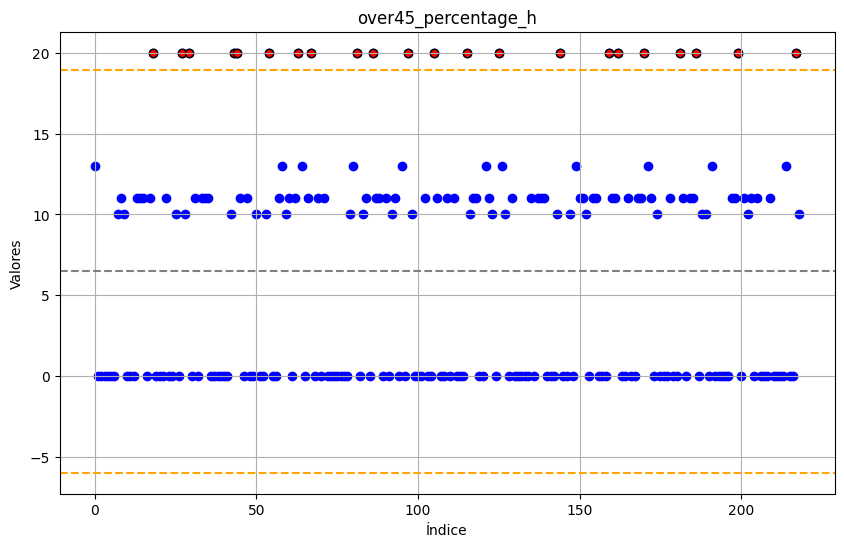

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.474885844748859' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


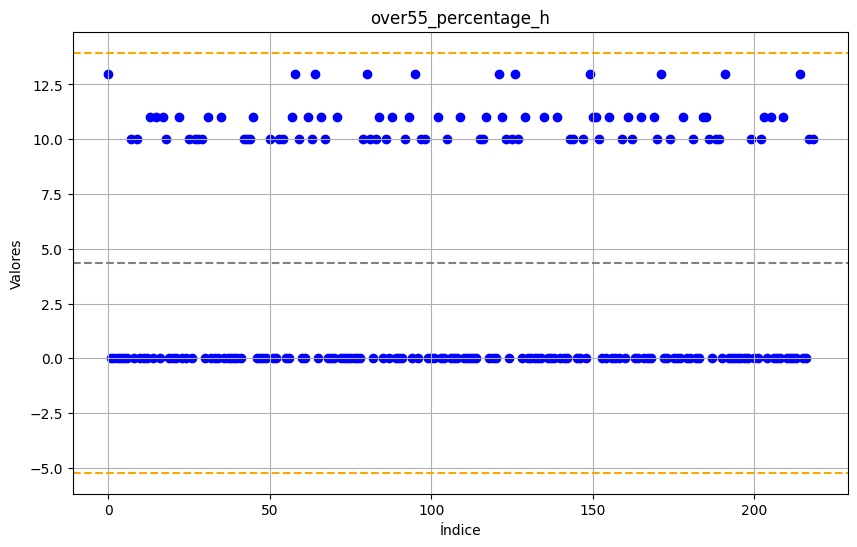

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.365296803652968' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


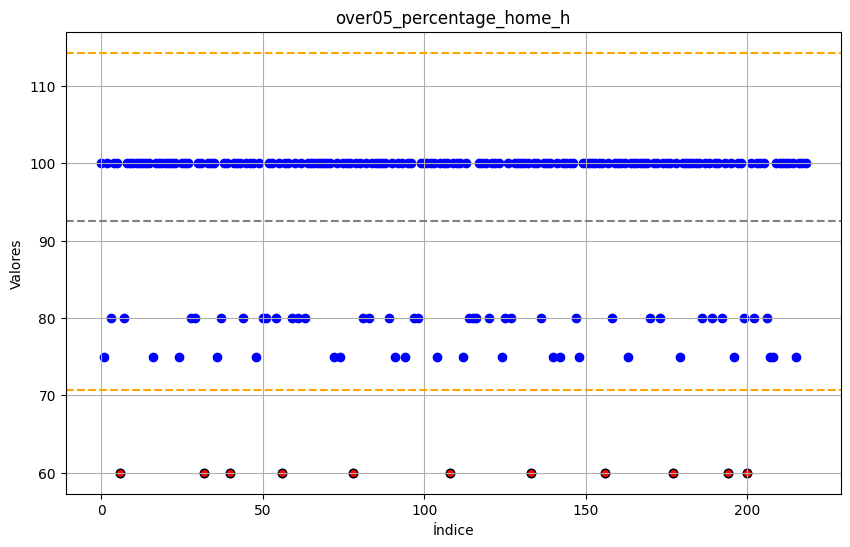

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92.48858447488584' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


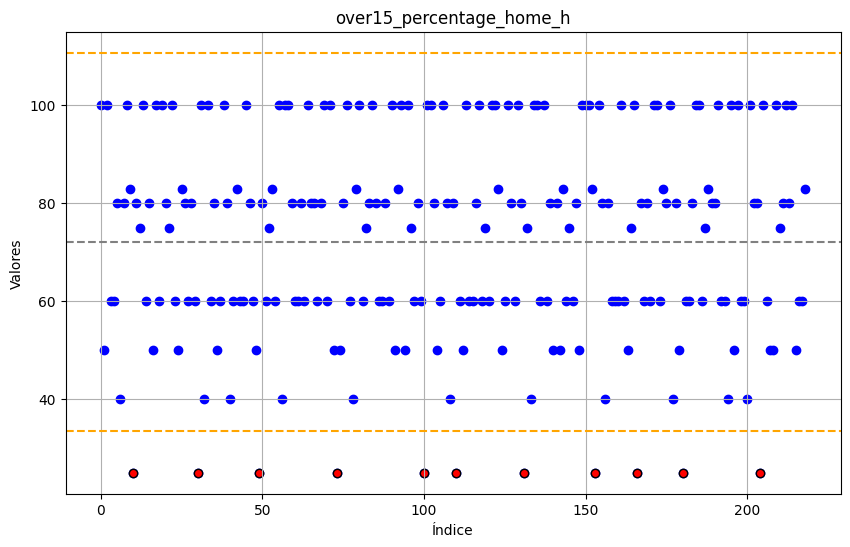

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.08219178082192' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


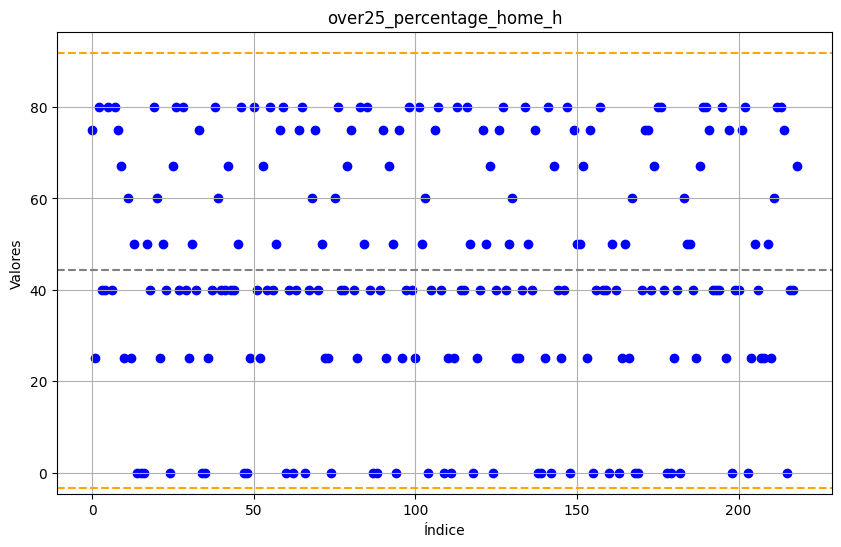

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.2648401826484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


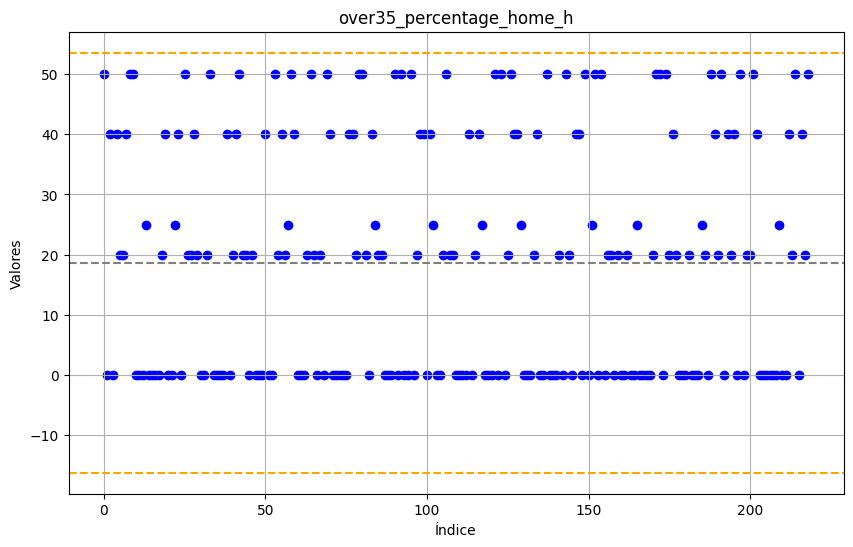

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18.652968036529682' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


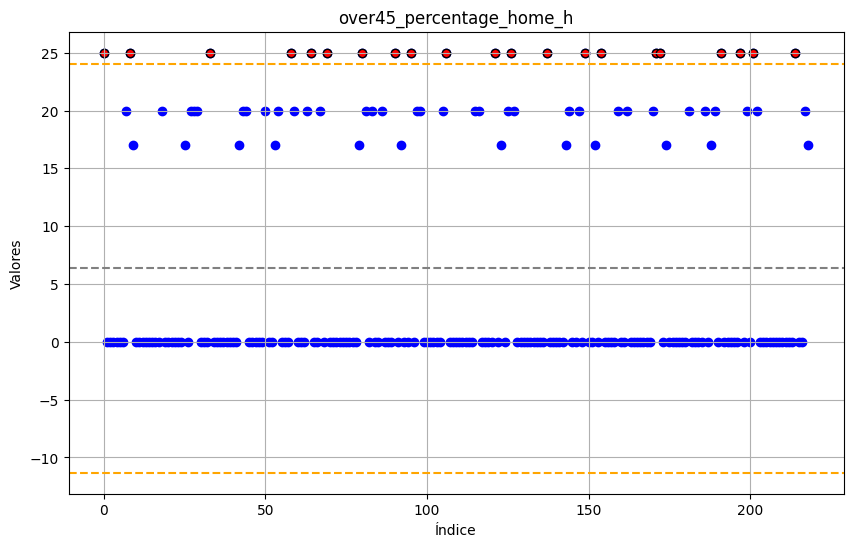

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.342465753424658' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


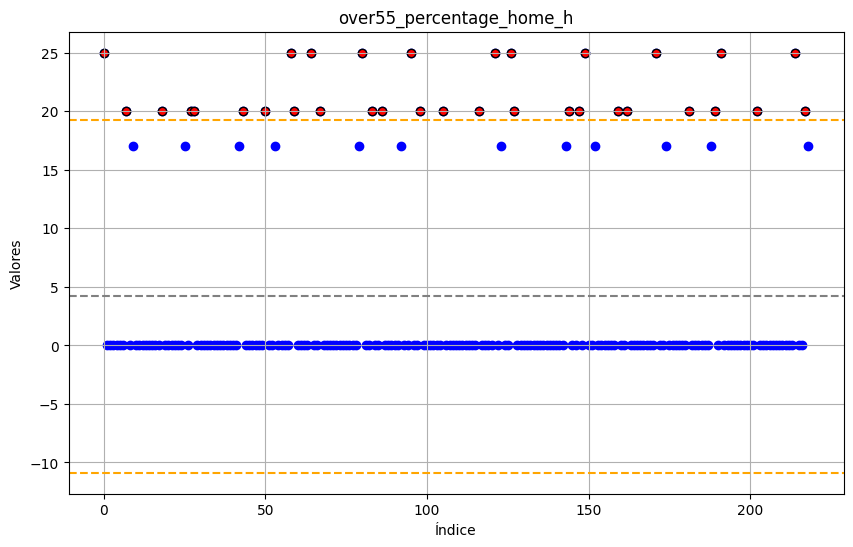

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.19634703196347' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


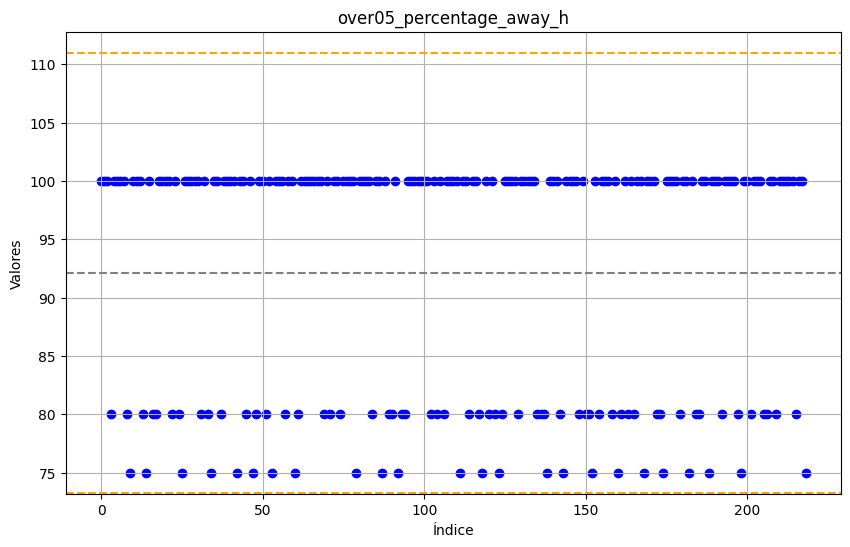

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '92.14611872146119' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


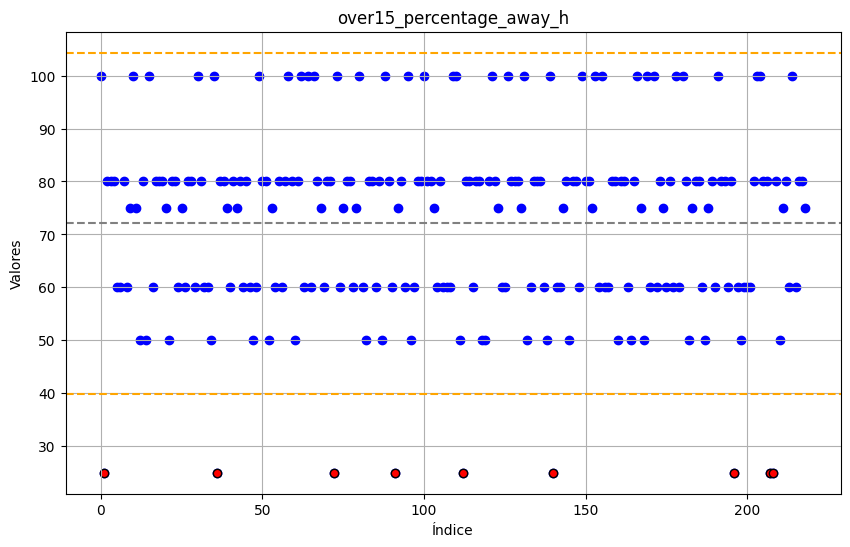

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.07762557077625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


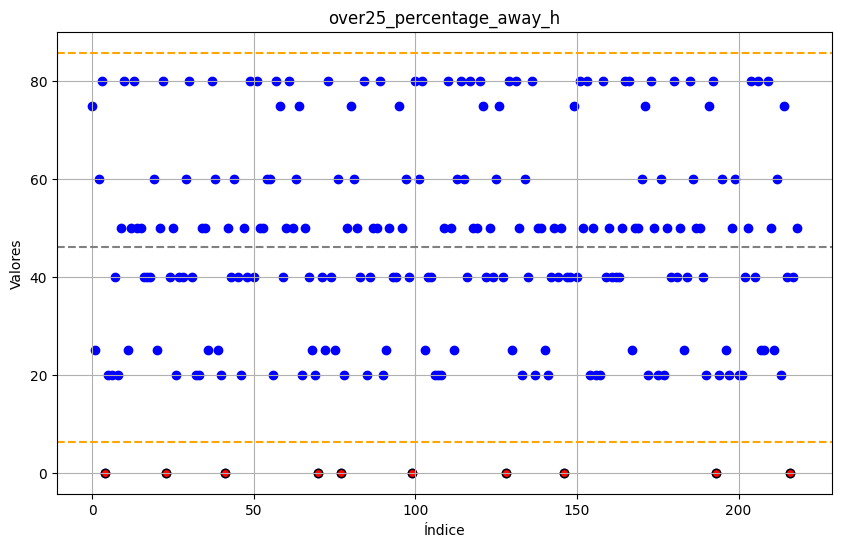

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '46.02739726027397' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


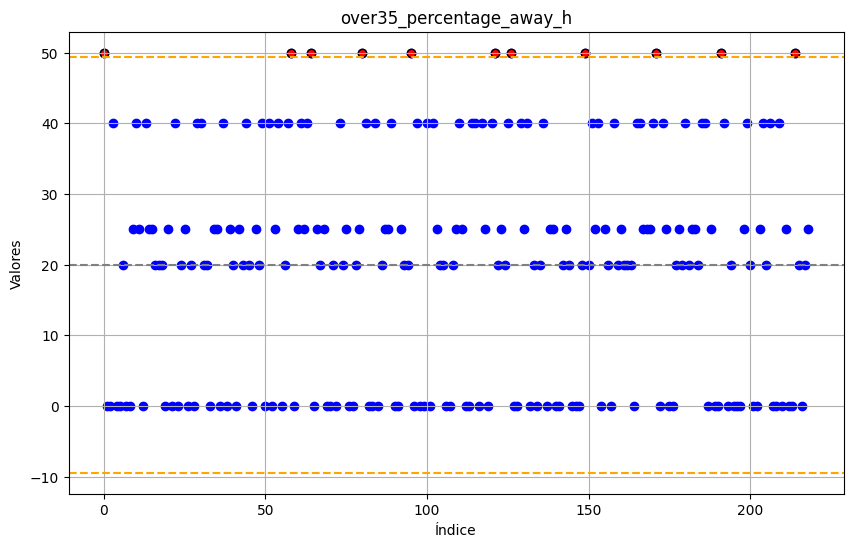

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '19.977168949771688' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


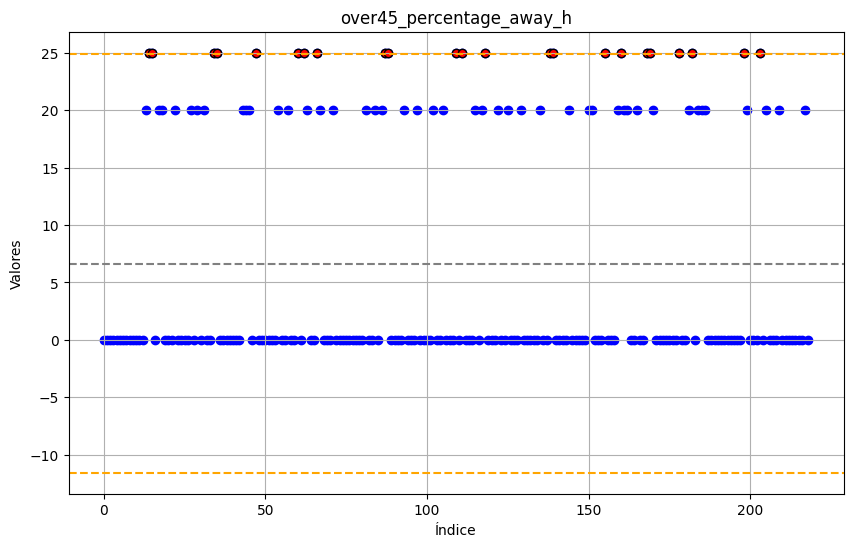

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.6438356164383565' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


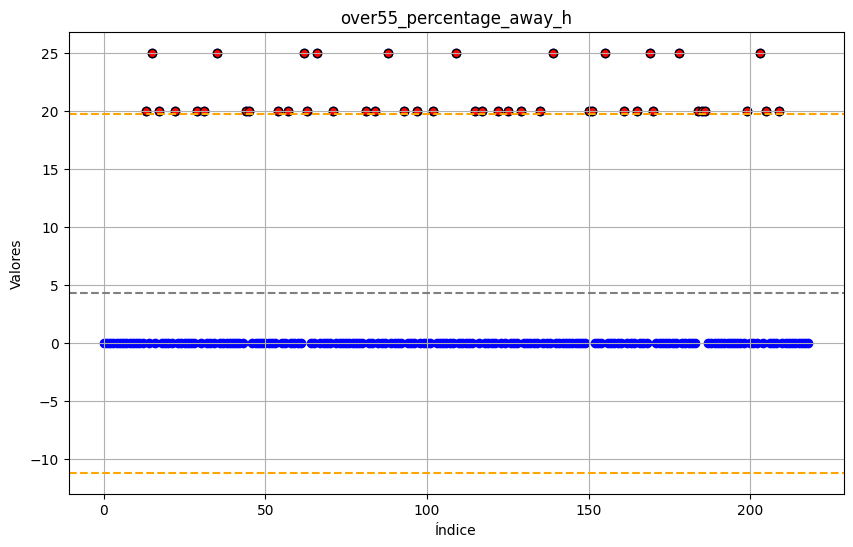

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.269406392694064' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


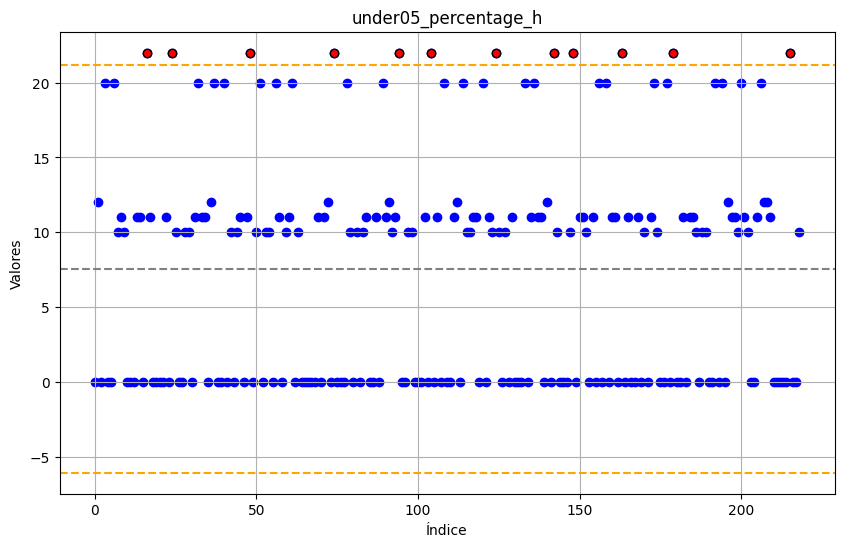

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.561643835616438' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


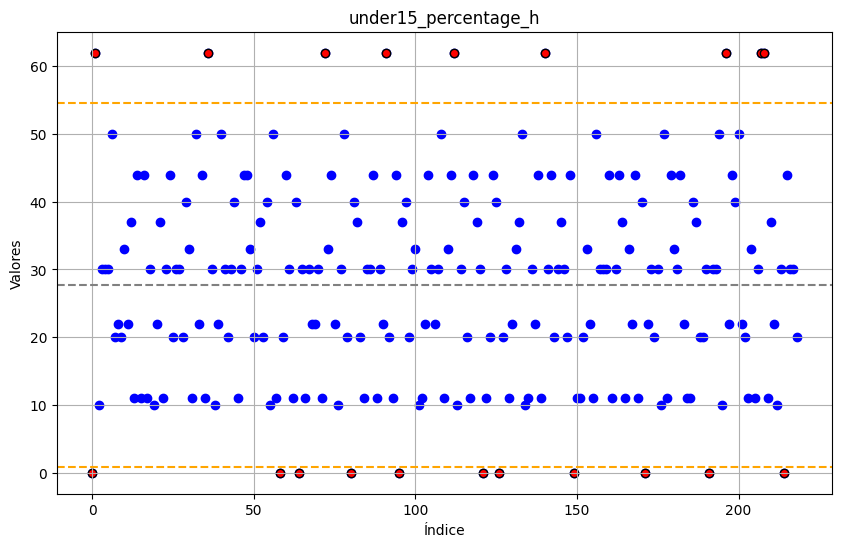

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.703196347031962' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


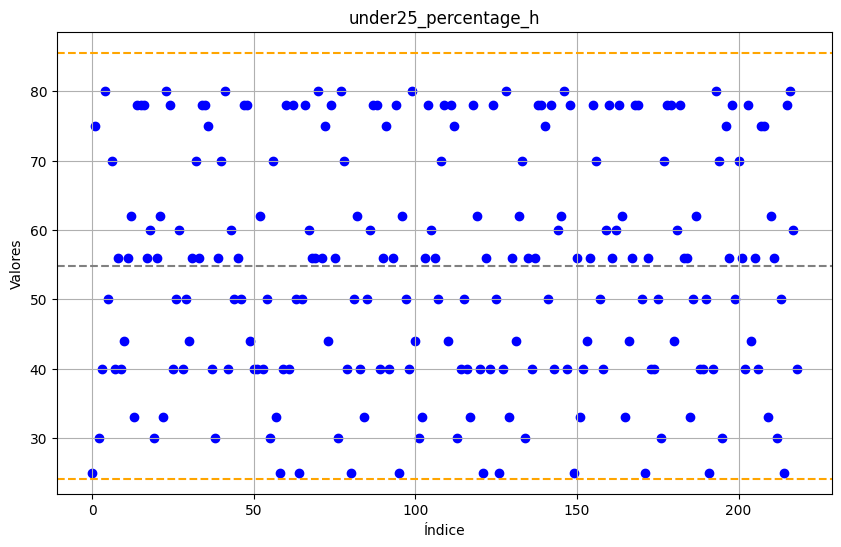

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '54.817351598173516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


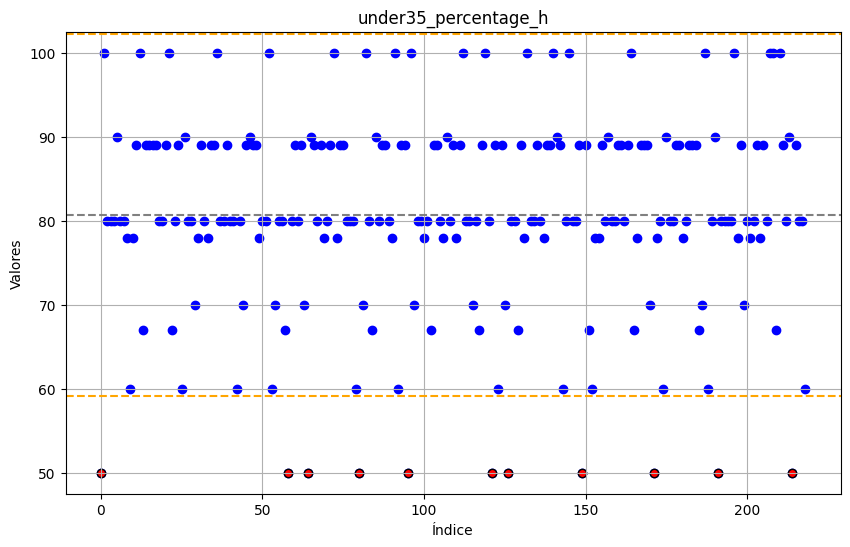

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80.68036529680366' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


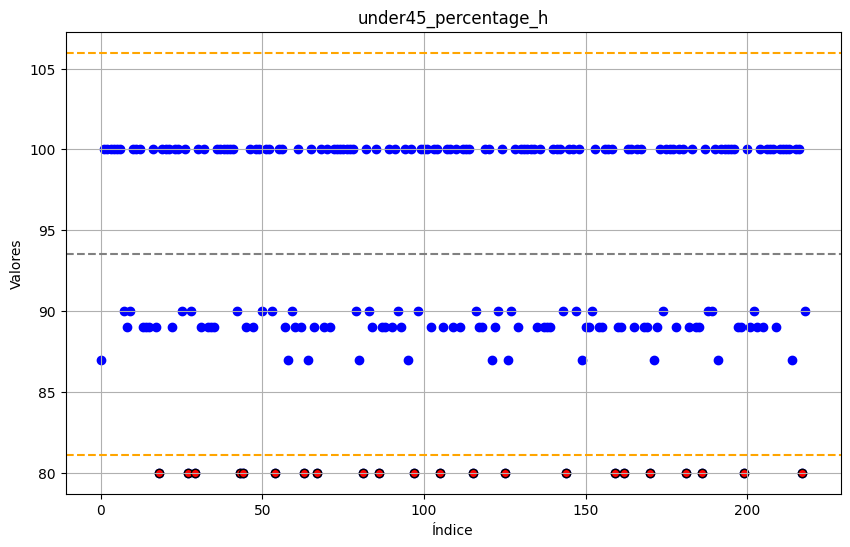

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '93.52511415525115' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


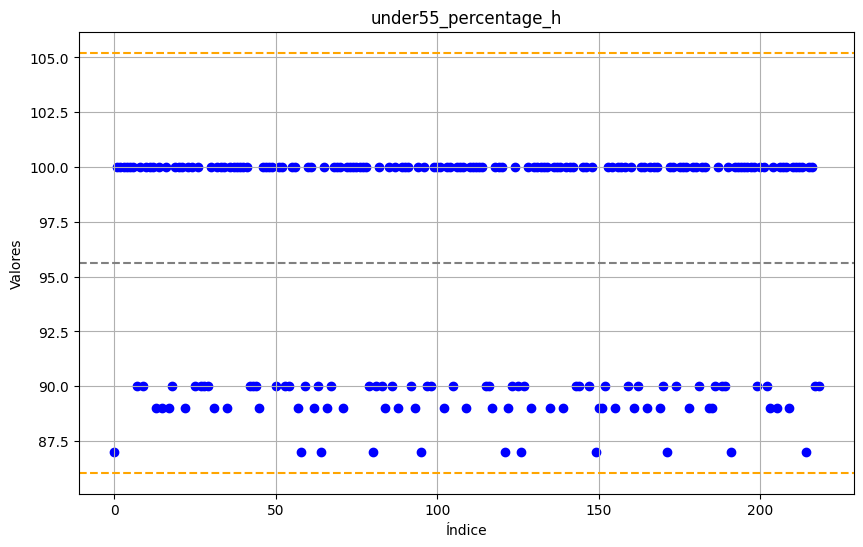

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '95.63470319634703' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


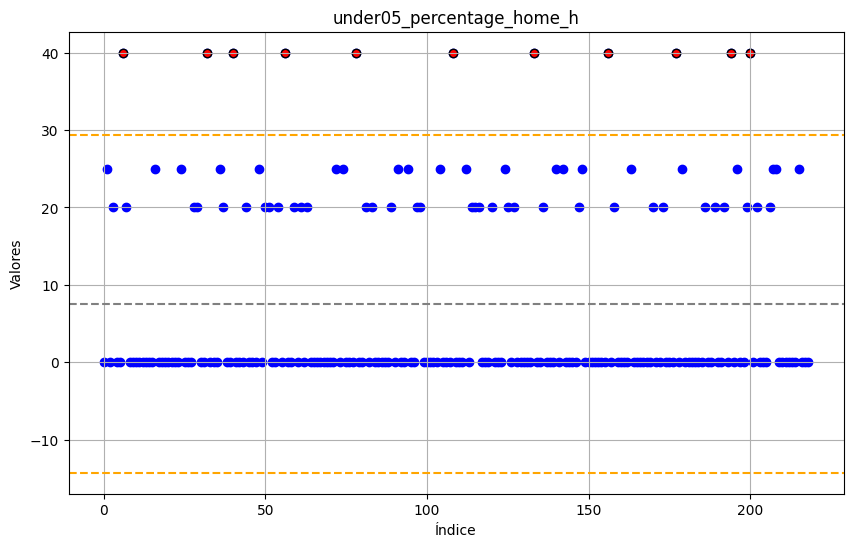

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.511415525114155' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


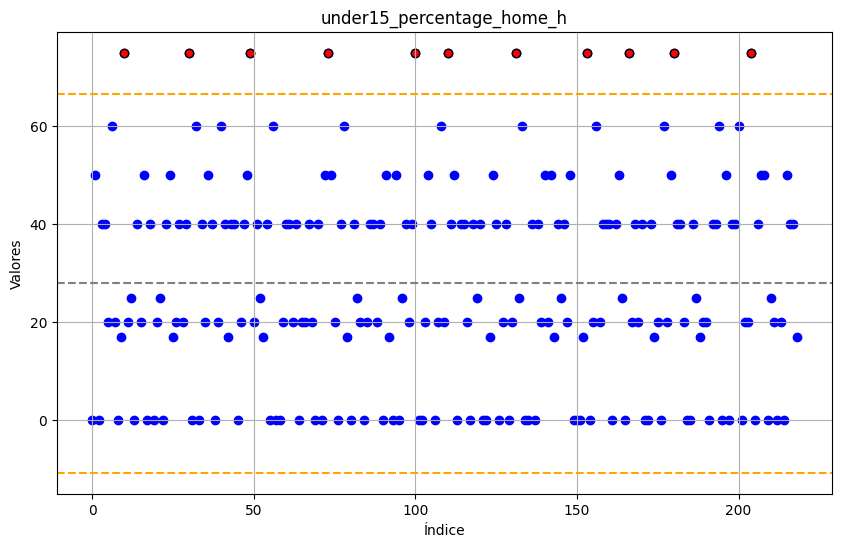

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.91780821917808' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


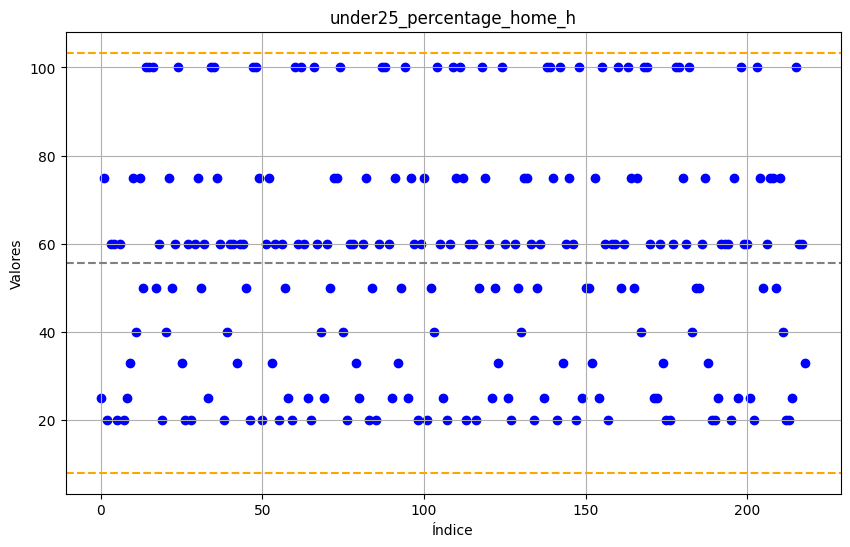

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '55.7351598173516' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


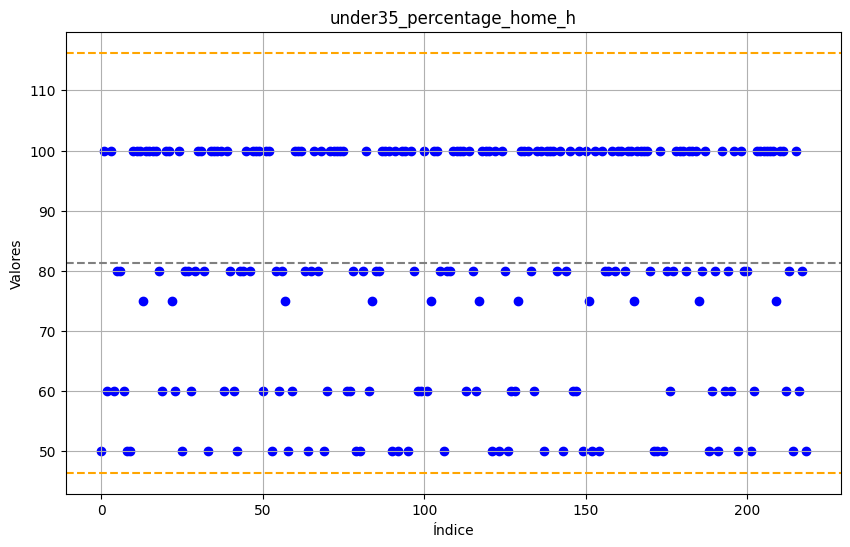

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '81.34703196347031' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


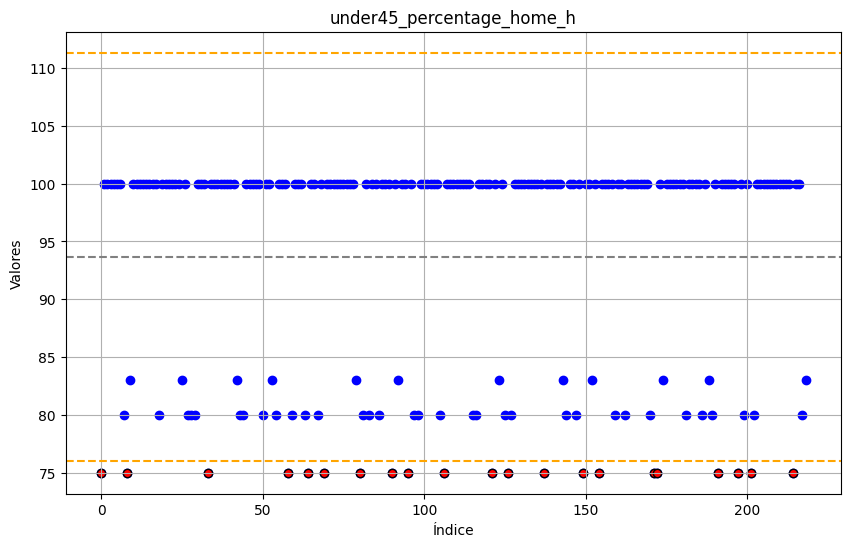

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '93.65753424657534' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


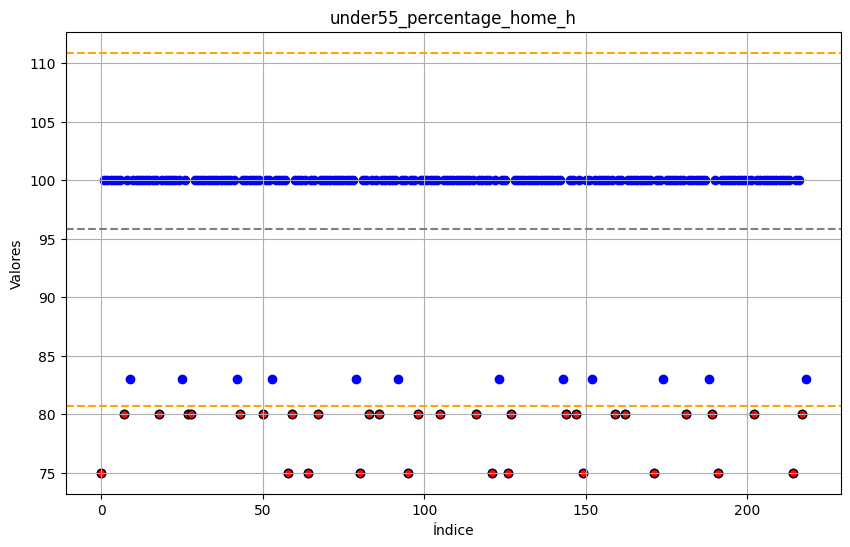

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '95.80365296803653' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


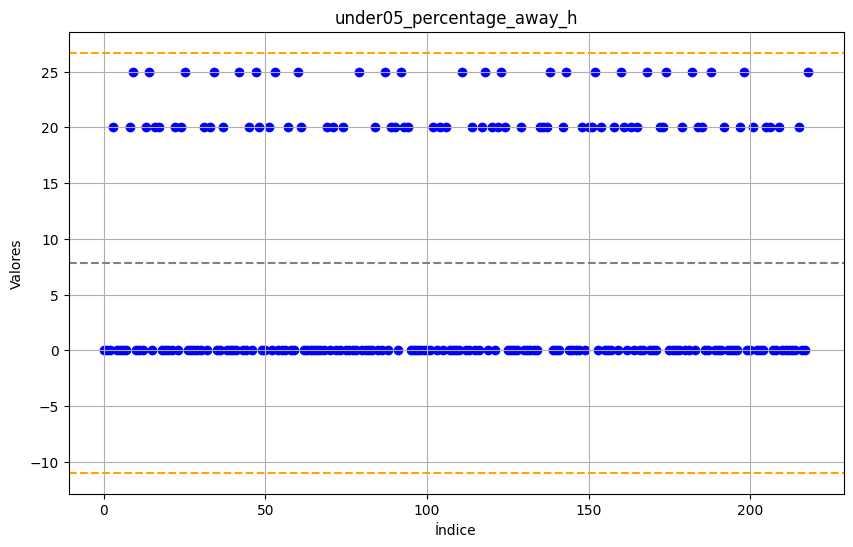

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.853881278538813' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


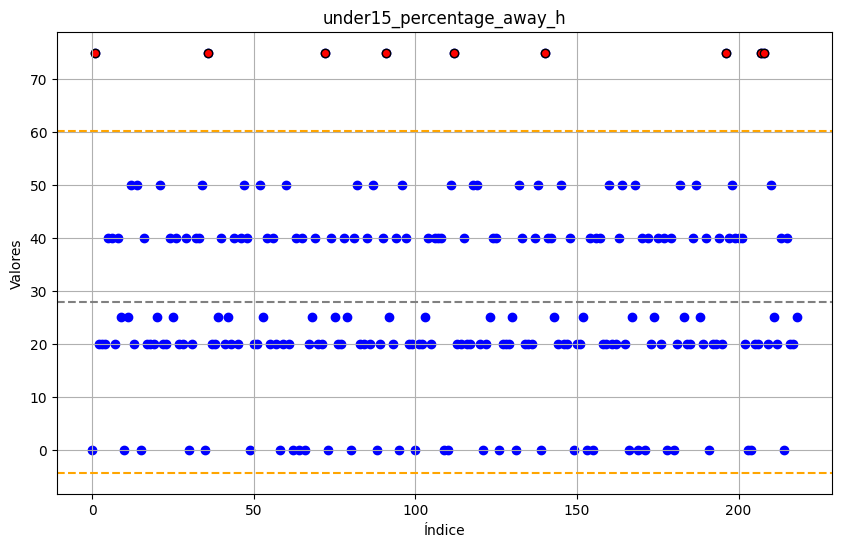

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.922374429223744' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


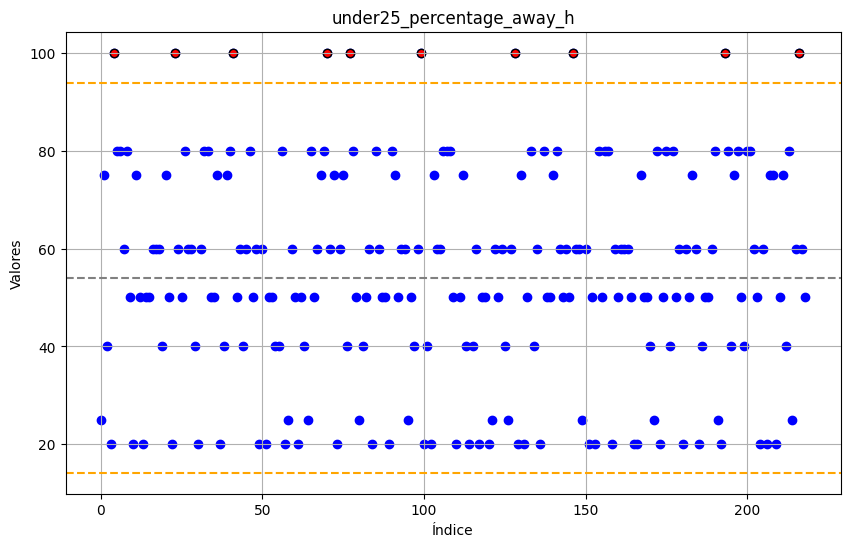

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.97260273972603' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


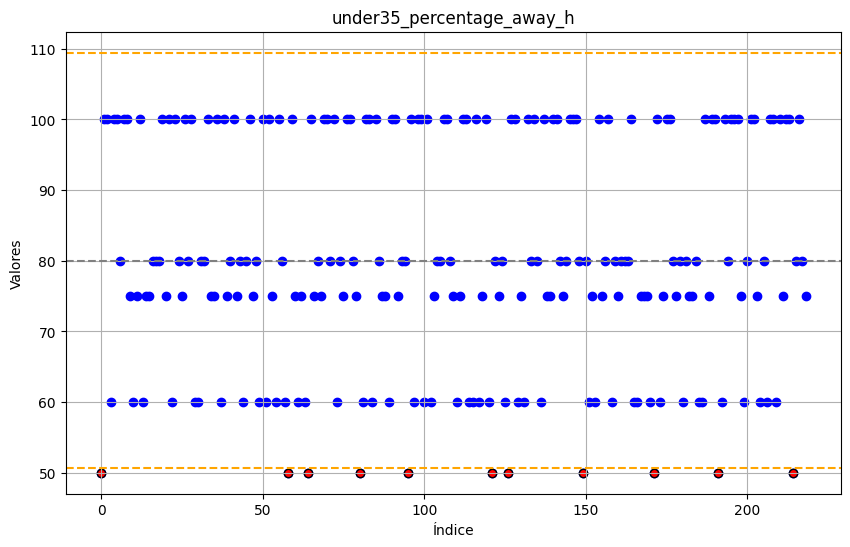

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '80.0228310502283' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


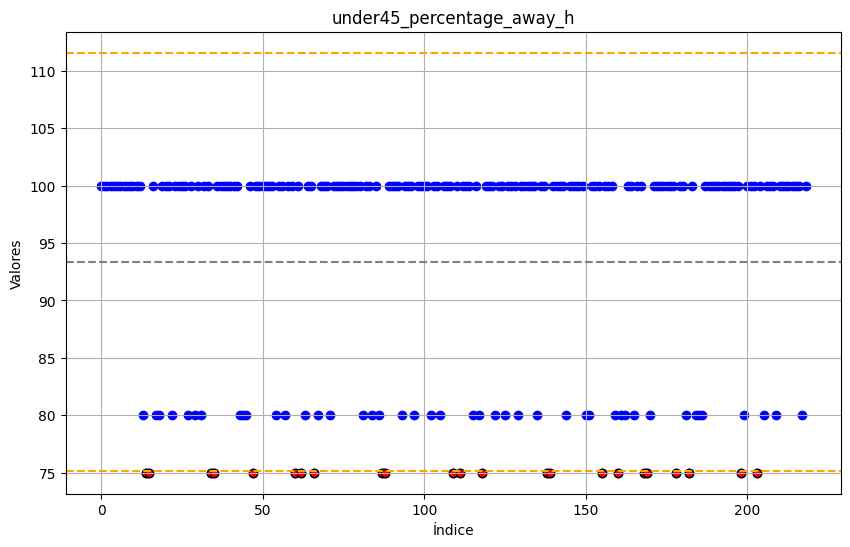

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '93.35616438356165' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


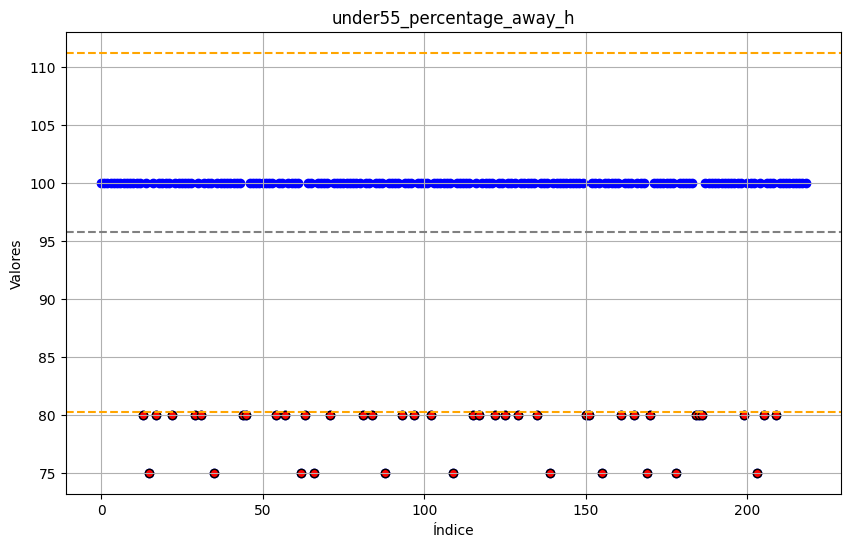

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '95.73059360730593' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


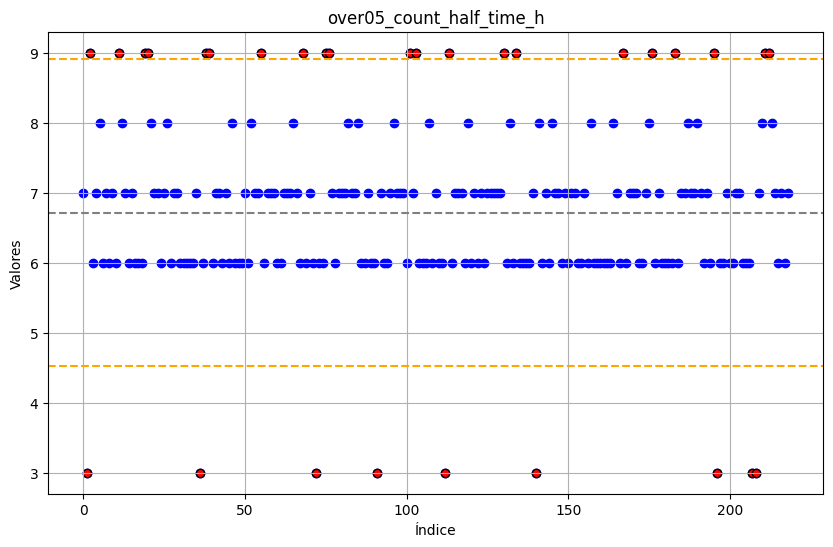

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.71689497716895' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


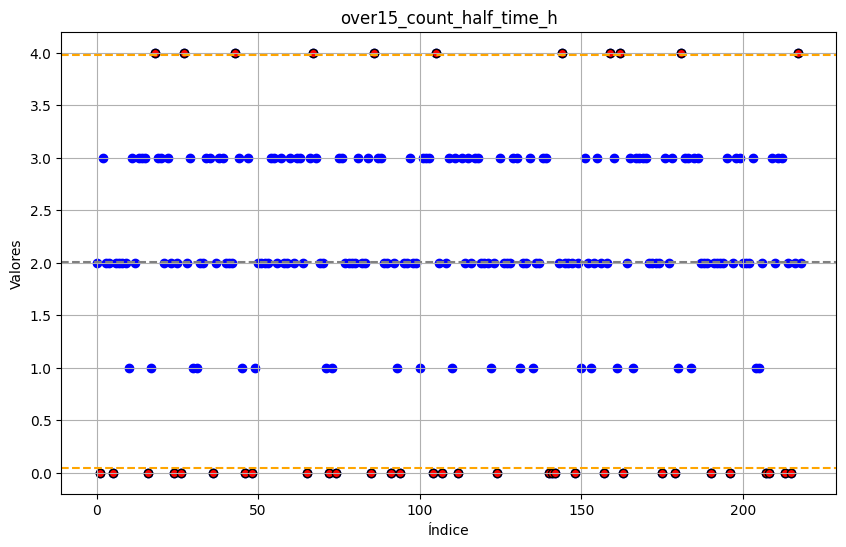

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.009132420091324' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


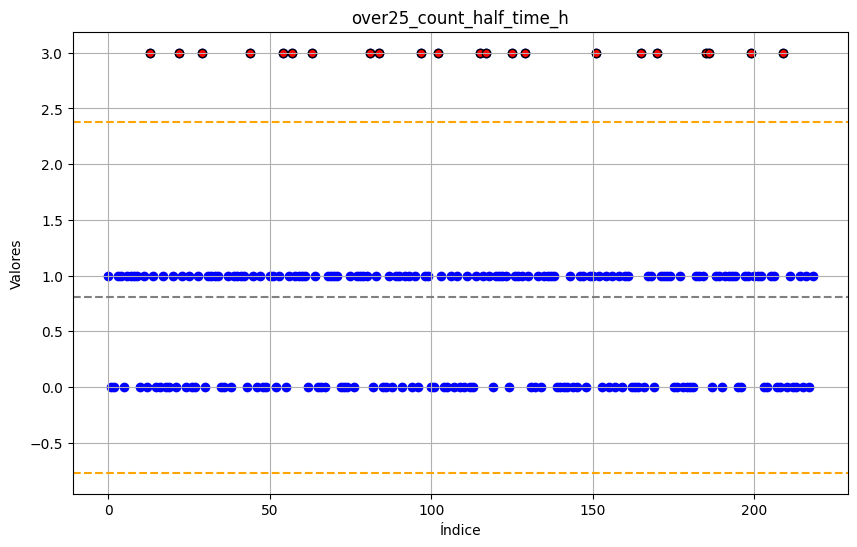

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.8036529680365296' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


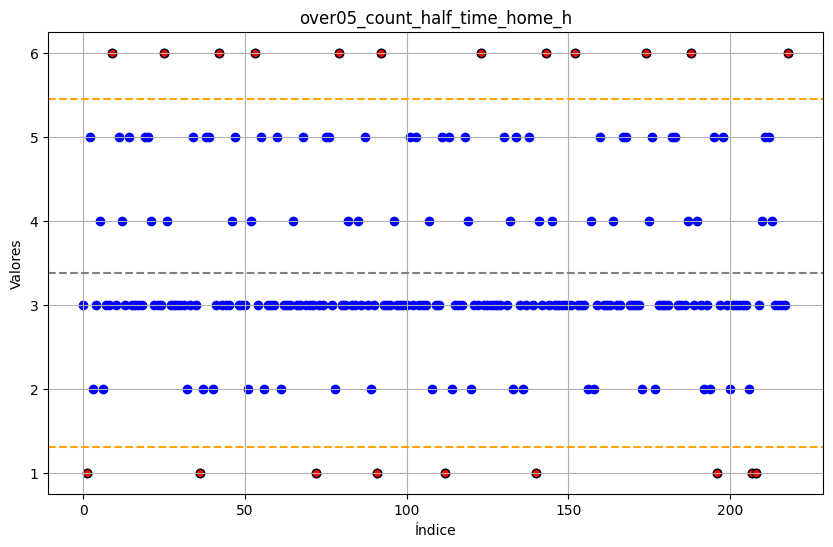

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3789954337899544' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


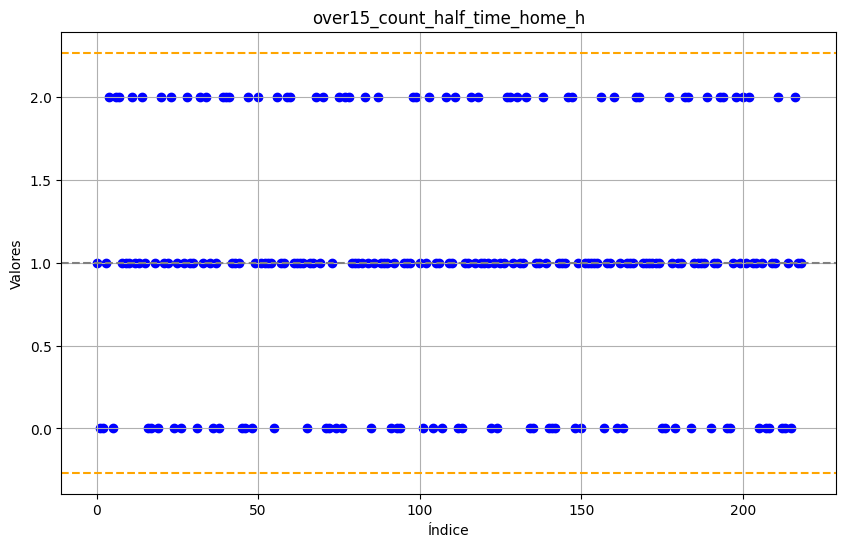

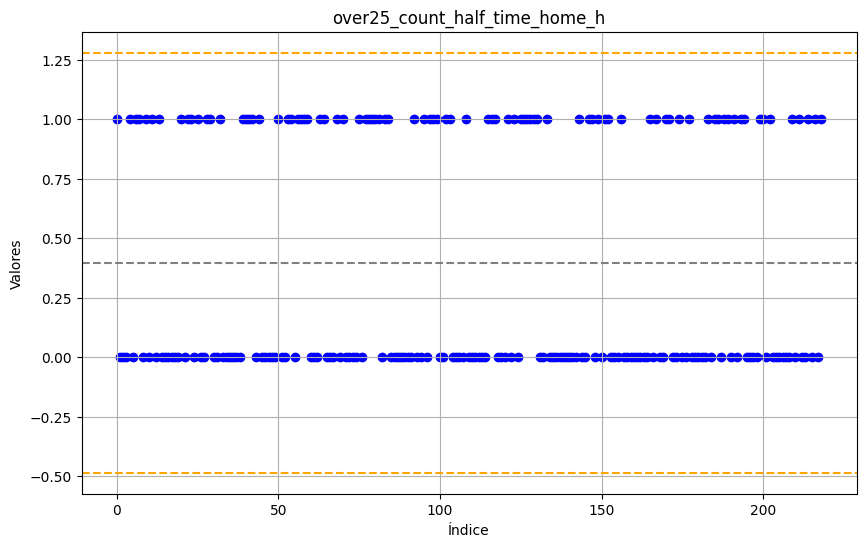

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.3972602739726027' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


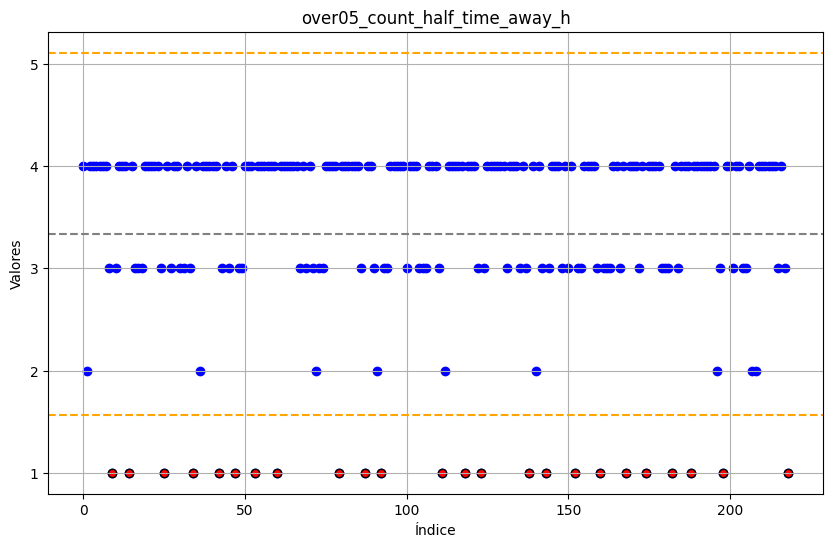

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.3378995433789953' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


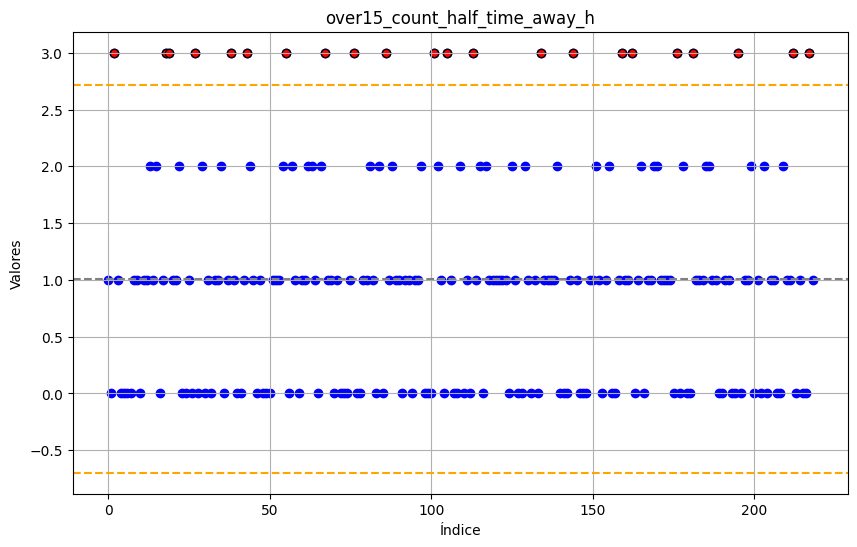

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0091324200913243' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


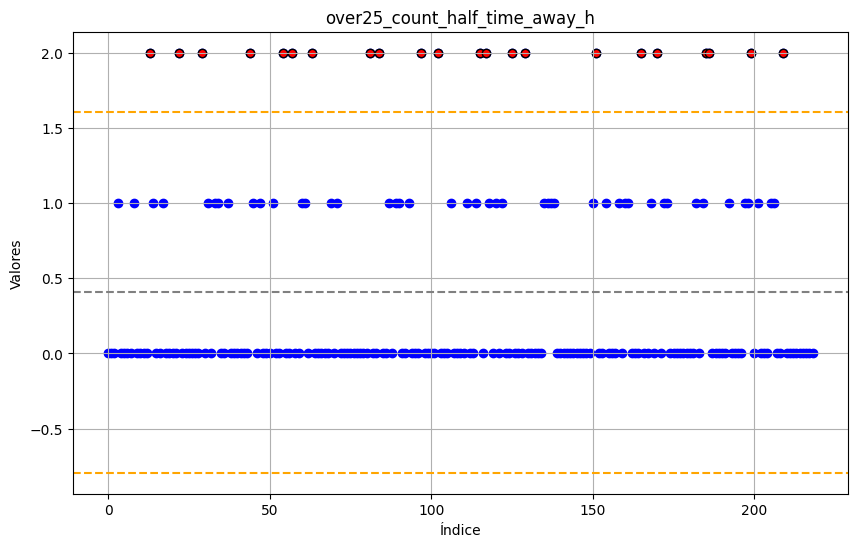

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.4063926940639269' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


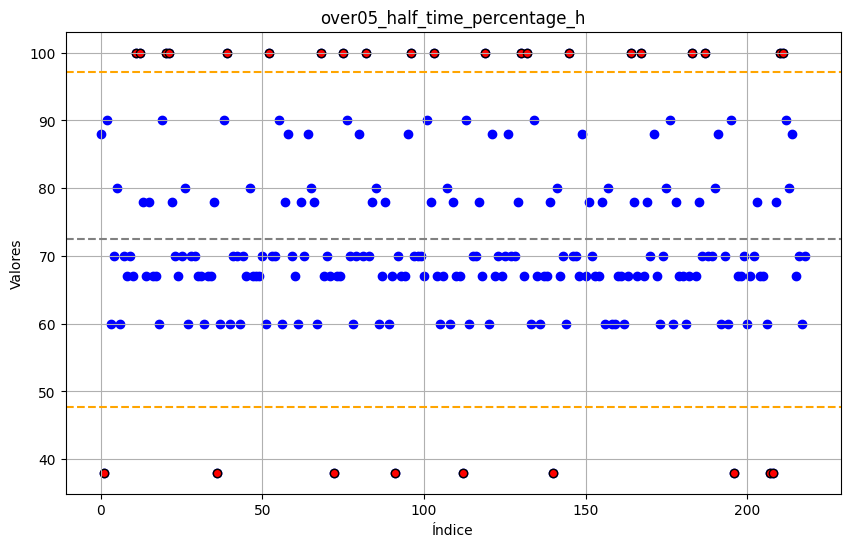

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.45662100456622' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


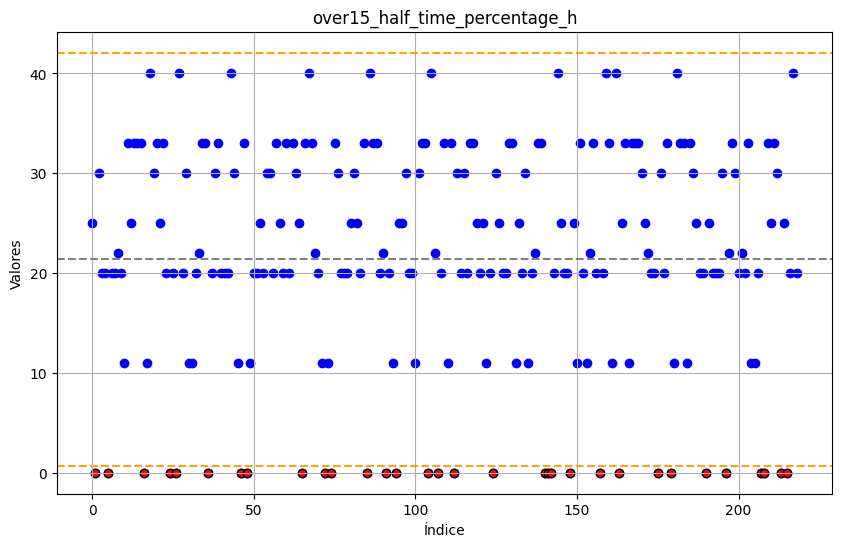

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.38812785388128' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


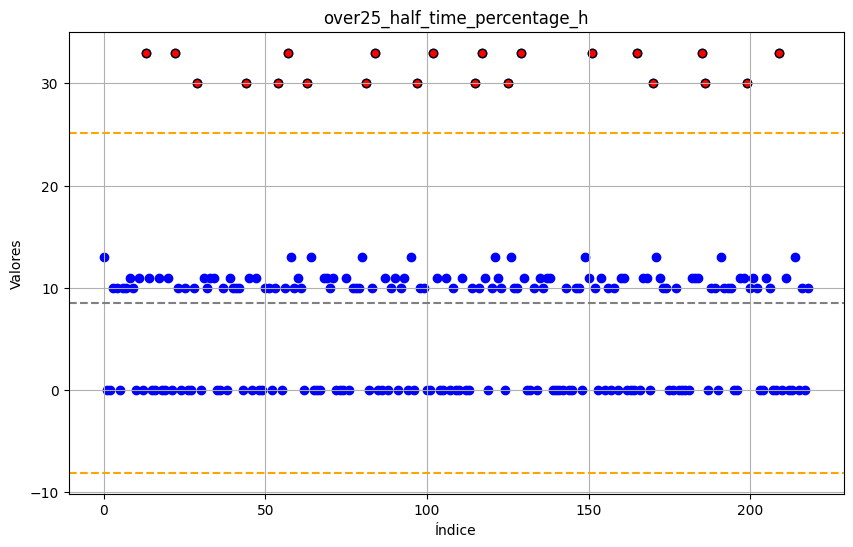

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.534246575342467' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


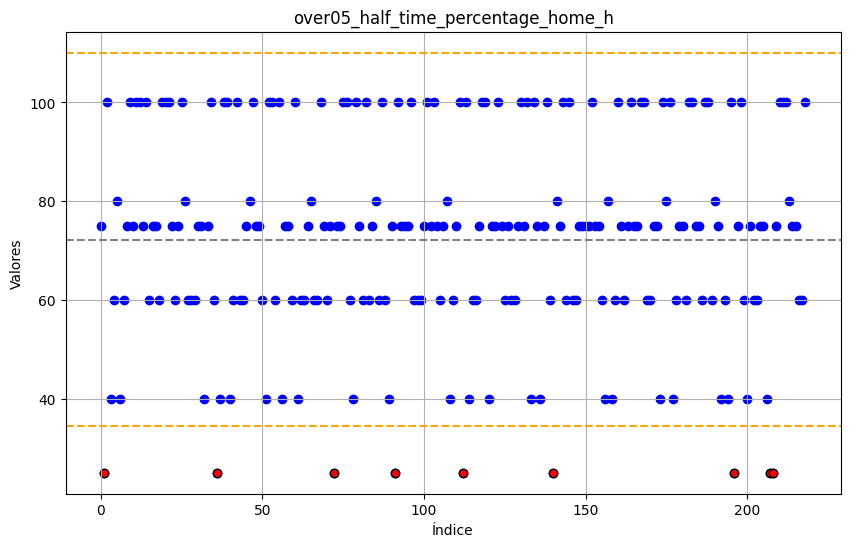

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '72.21461187214612' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


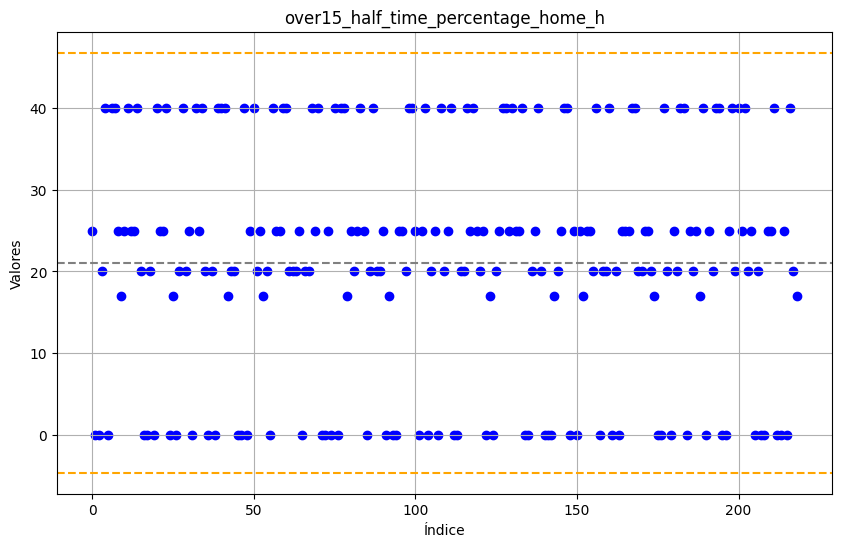

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.068493150684933' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


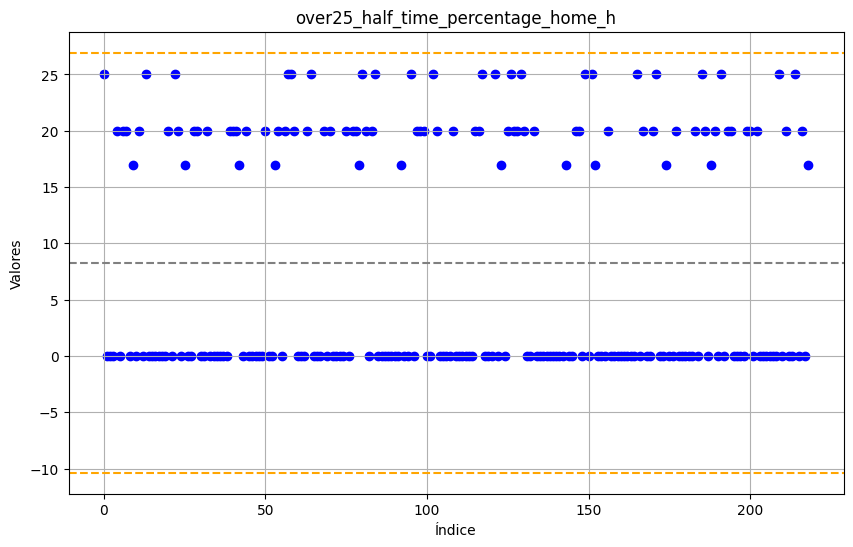

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.28310502283105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


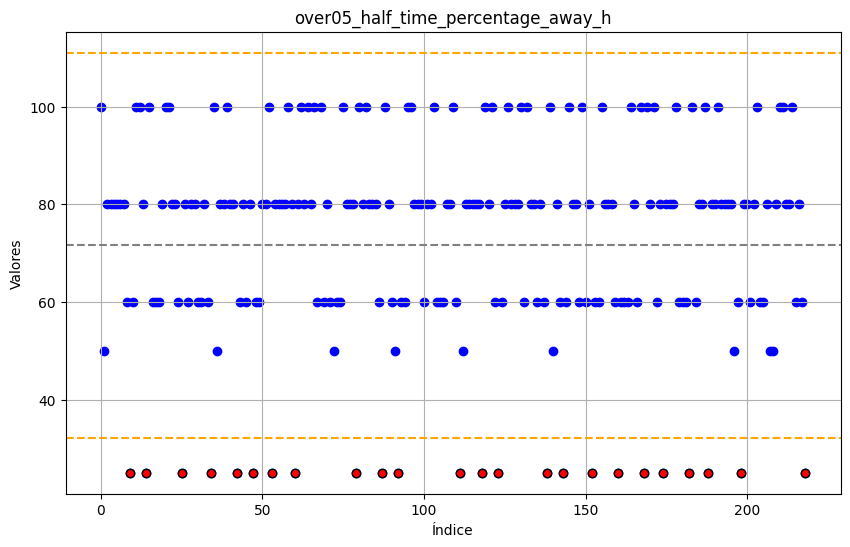

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '71.64383561643835' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


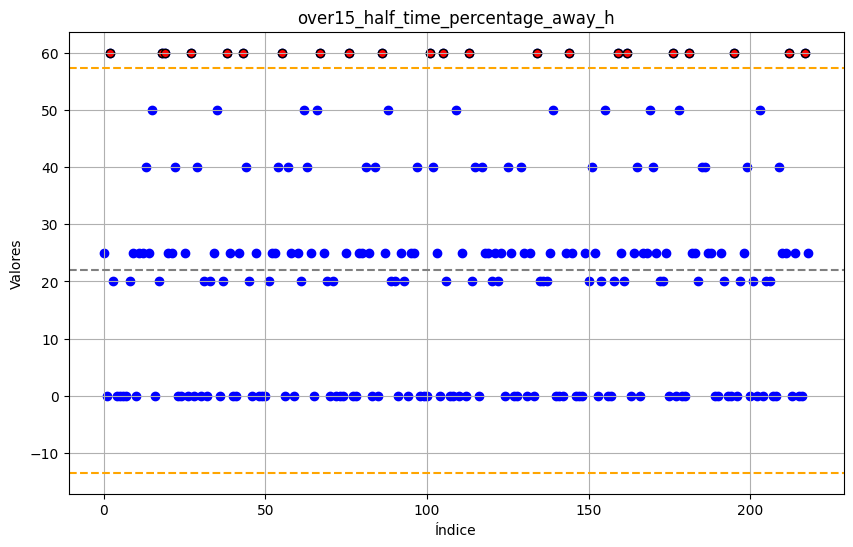

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '21.963470319634702' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


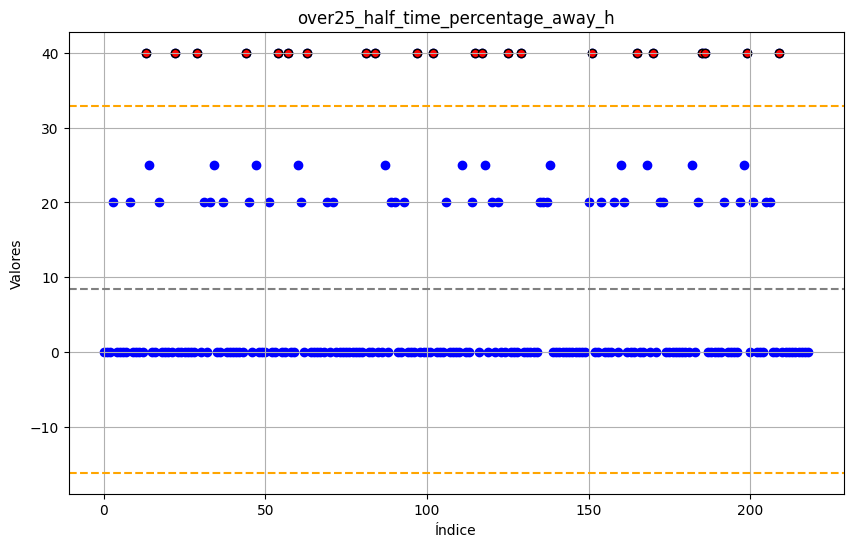

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.401826484018265' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


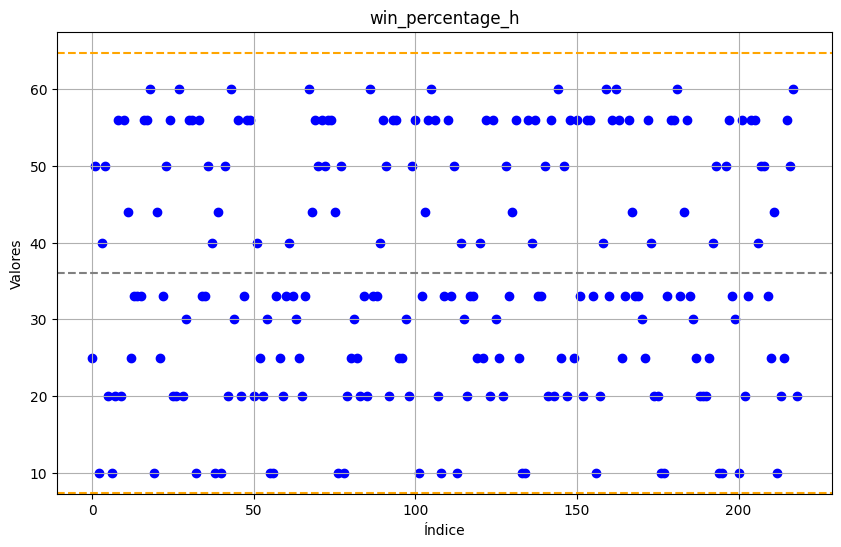

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '36.054794520547944' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


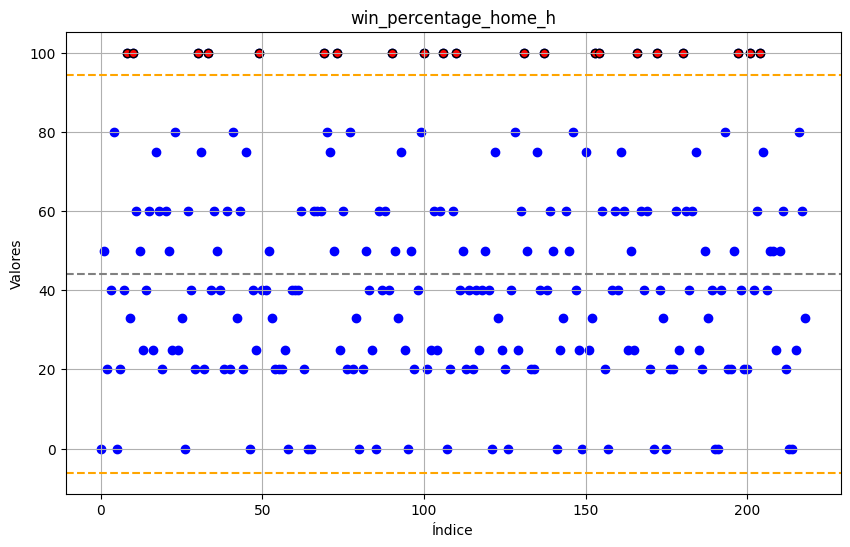

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.182648401826484' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


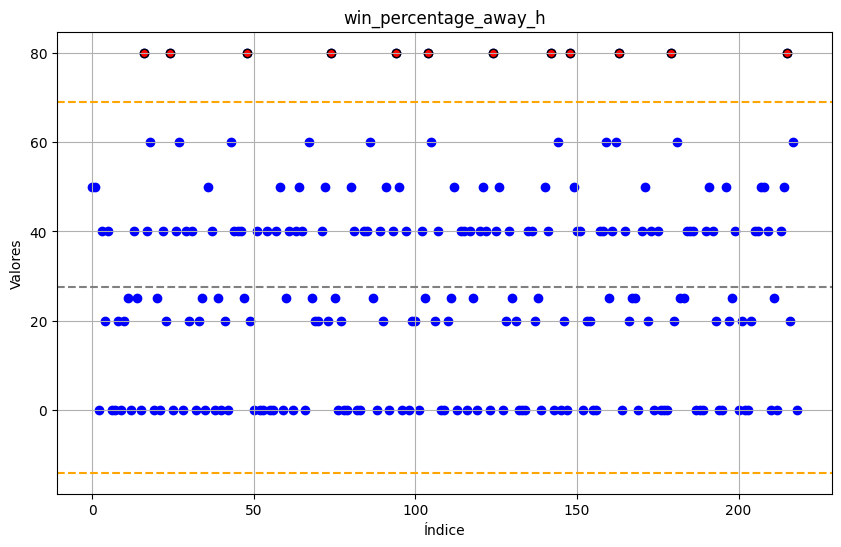

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.534246575342465' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


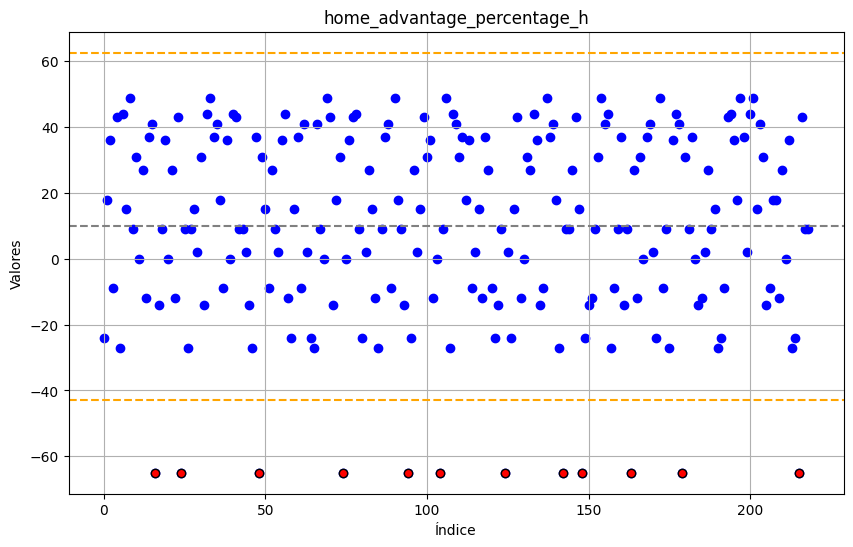

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9.835616438356164' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


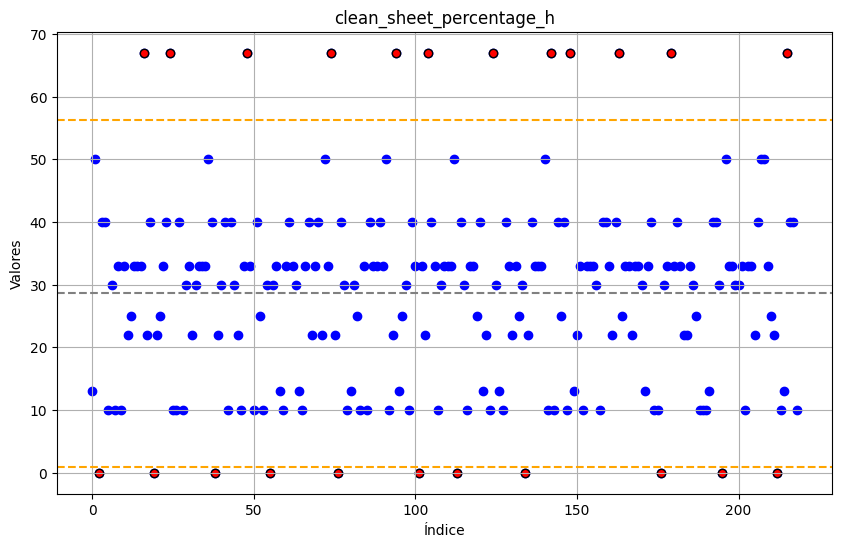

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.625570776255707' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


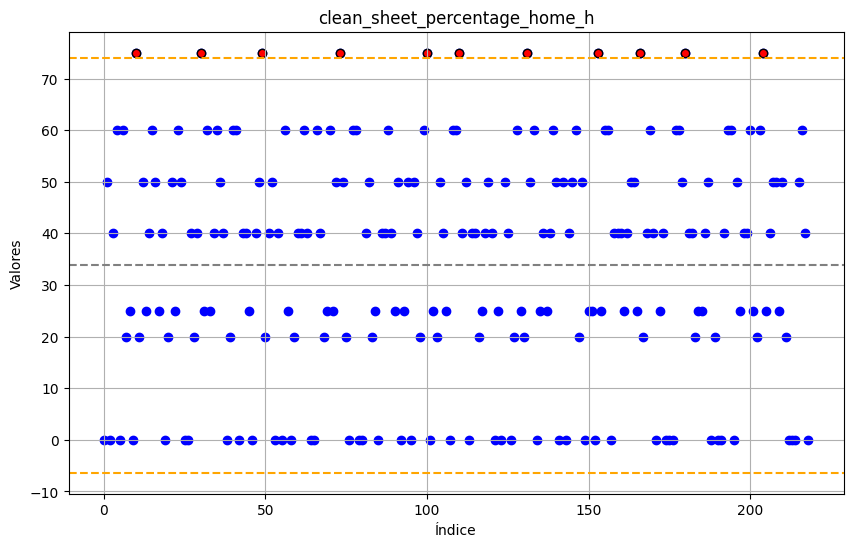

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '33.81278538812786' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


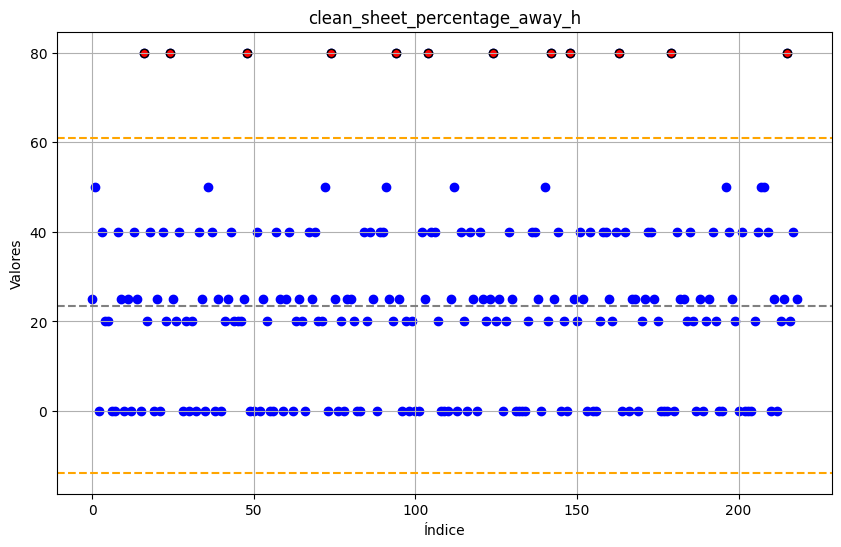

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.538812785388128' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


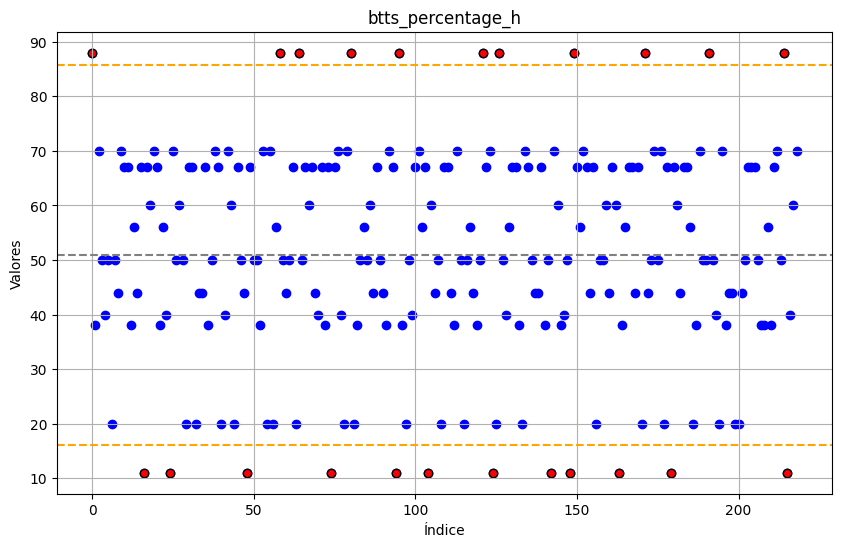

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '50.84474885844749' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


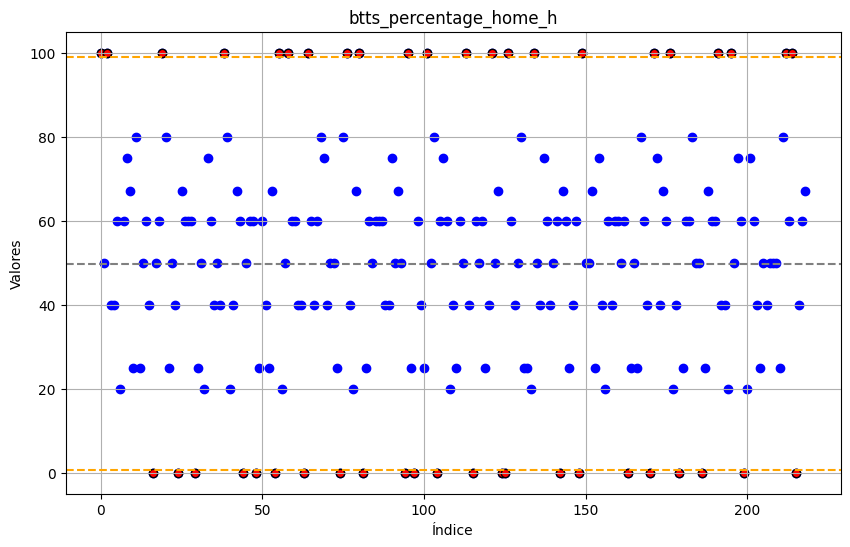

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '49.74429223744292' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


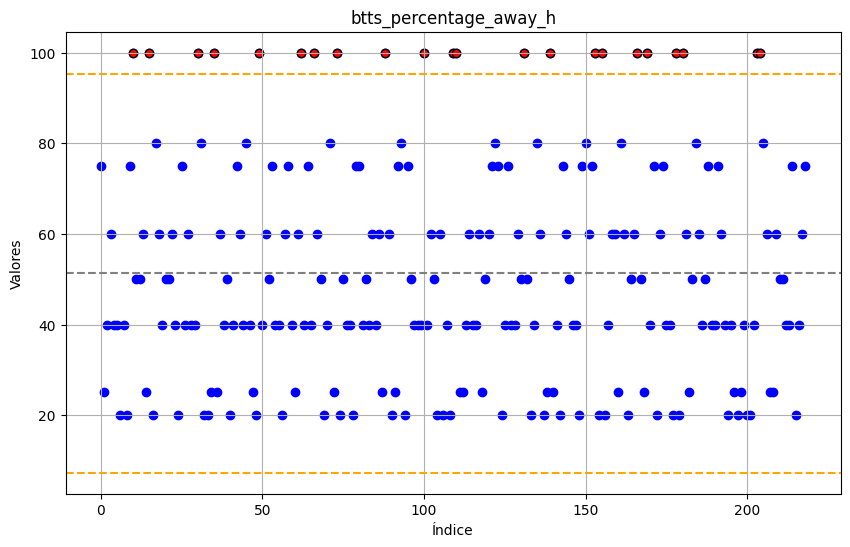

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '51.32420091324201' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


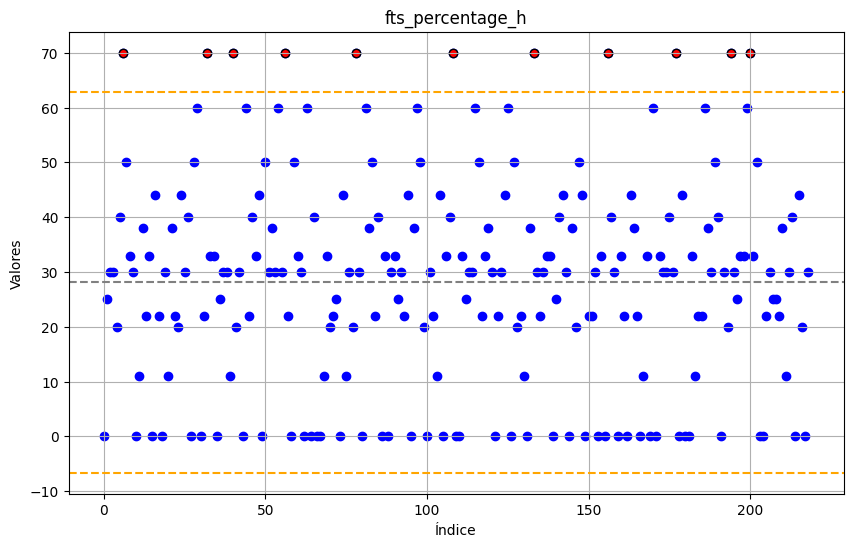

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.1324200913242' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


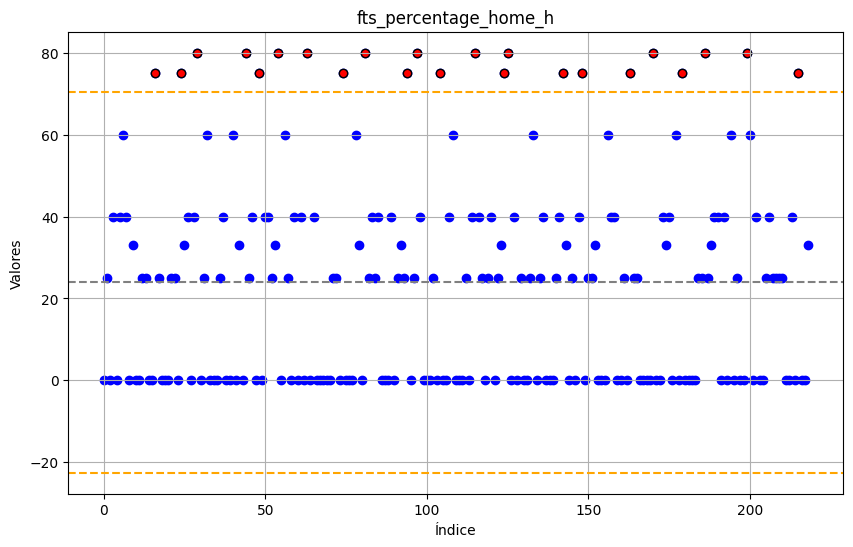

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.95433789954338' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


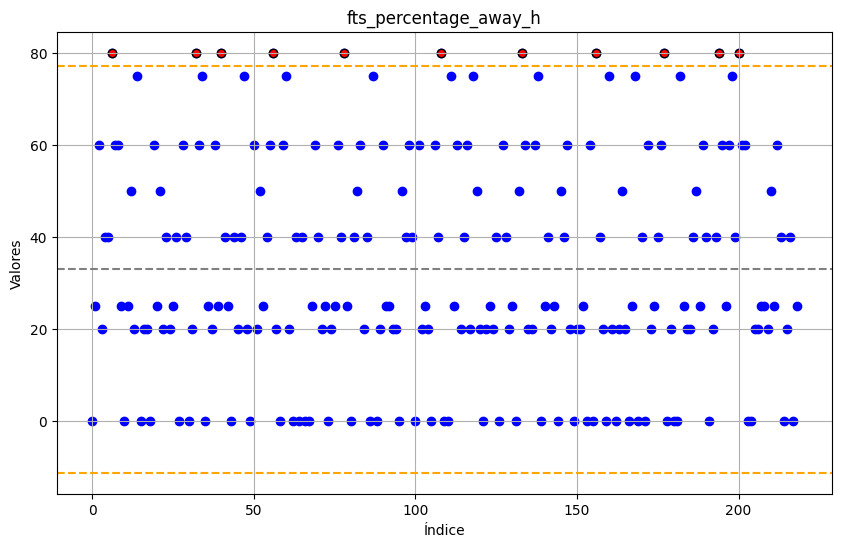

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.990867579908674' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


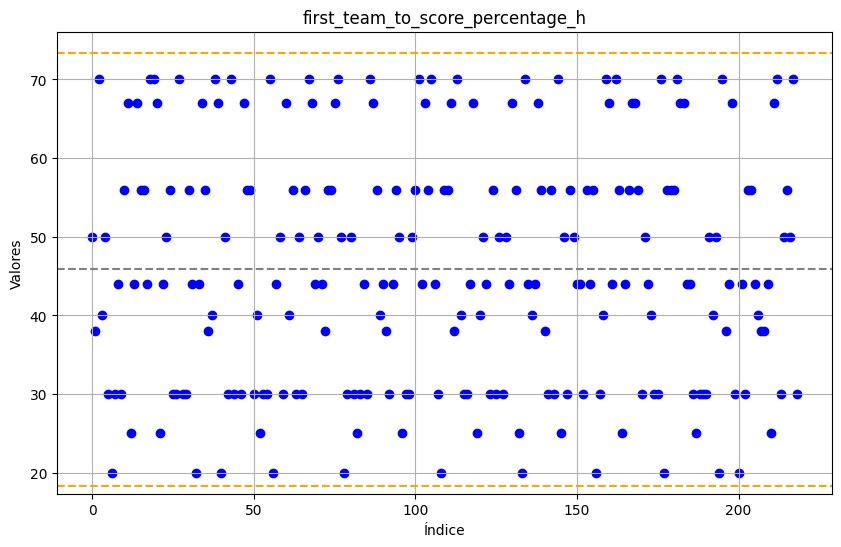

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45.858447488584474' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


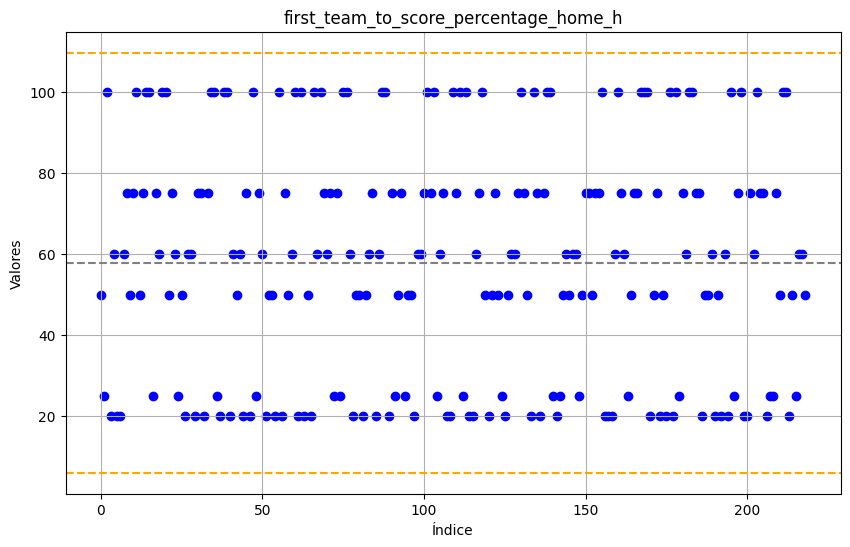

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57.853881278538815' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


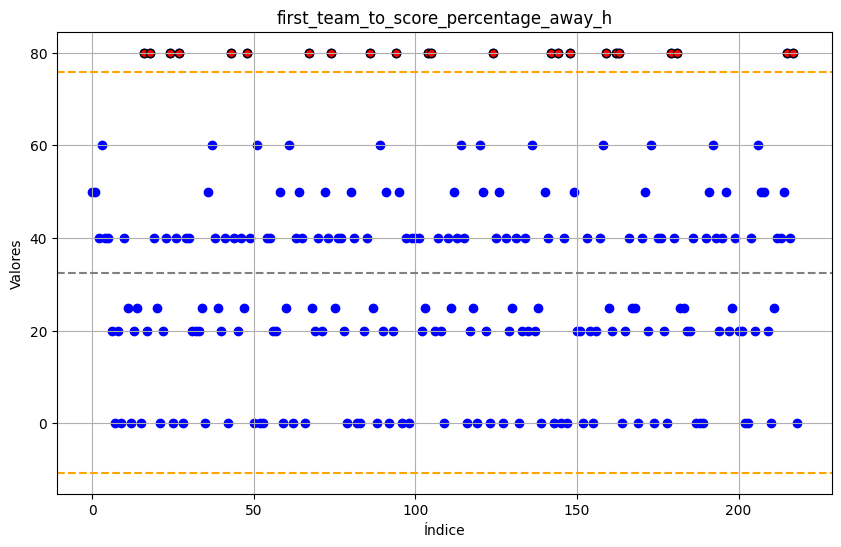

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '32.55707762557078' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


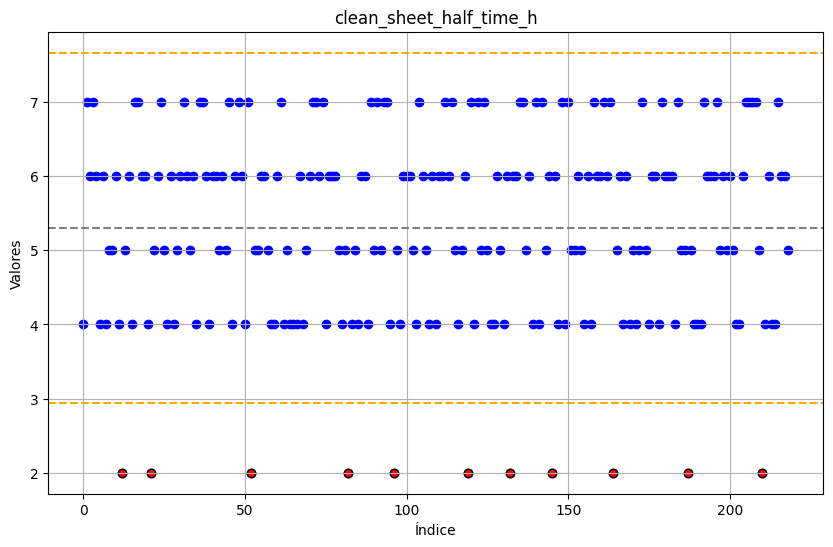

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.30593607305936' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


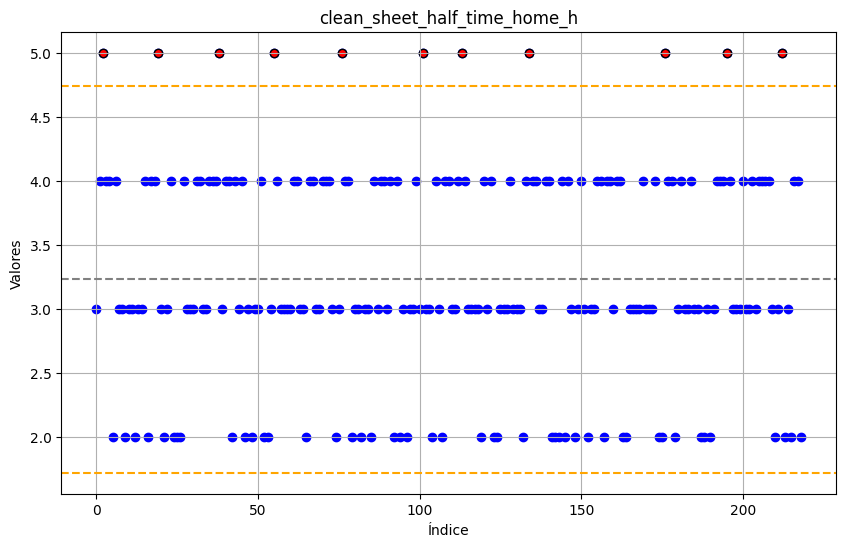

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.232876712328767' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


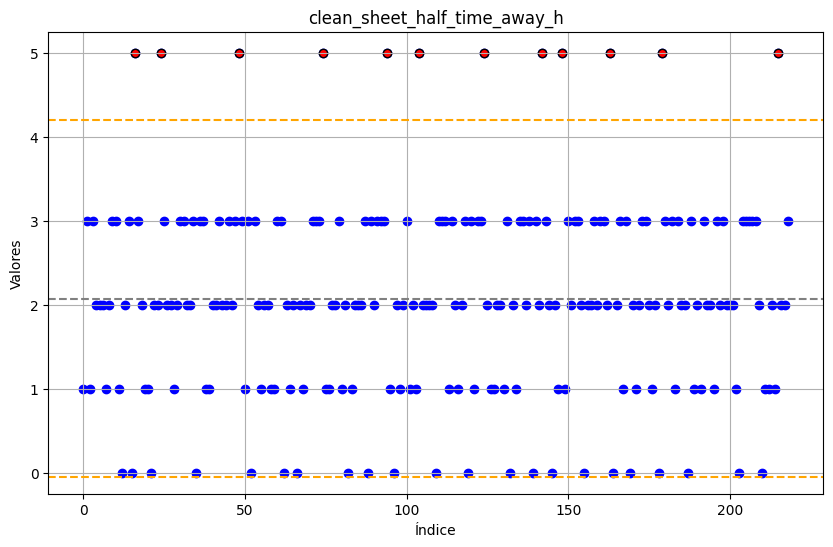

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0730593607305936' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


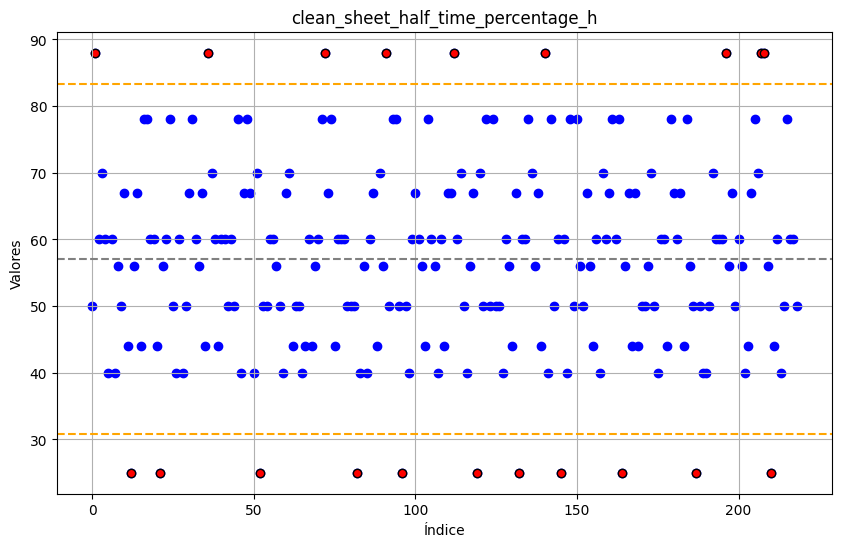

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '57.08675799086758' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


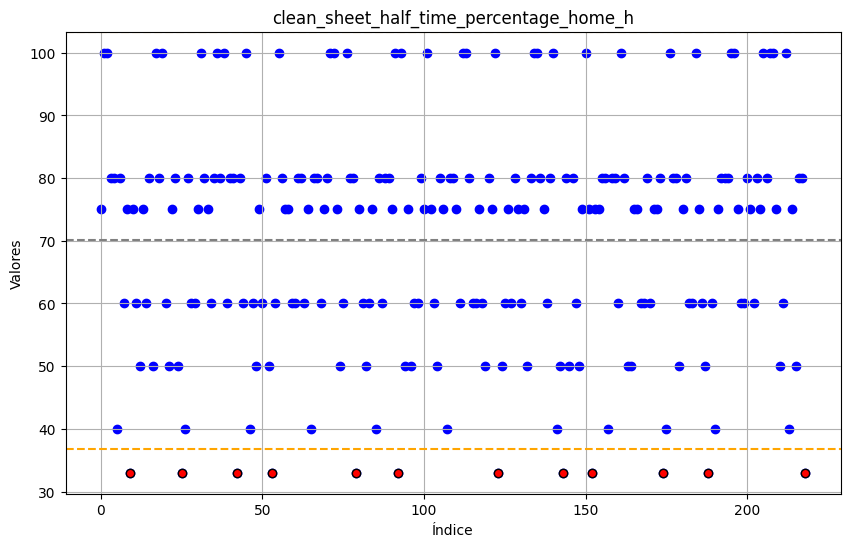

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '70.0958904109589' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


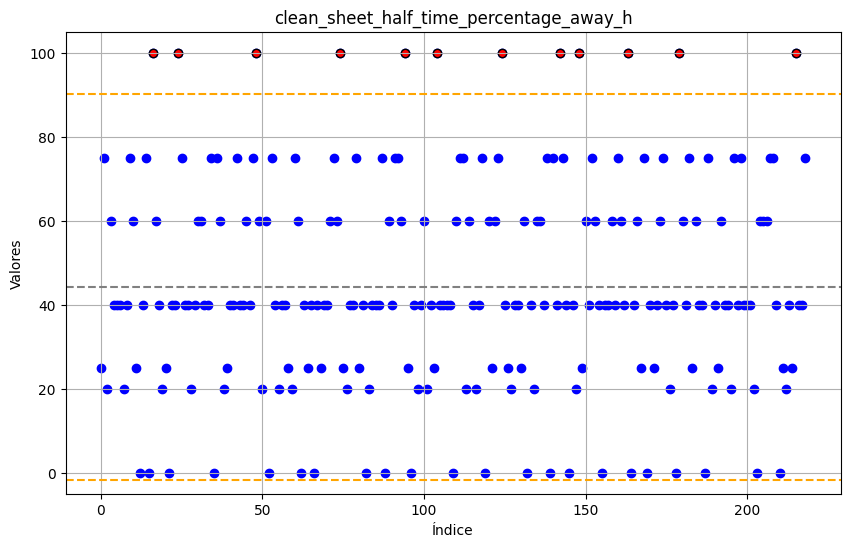

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.20091324200913' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


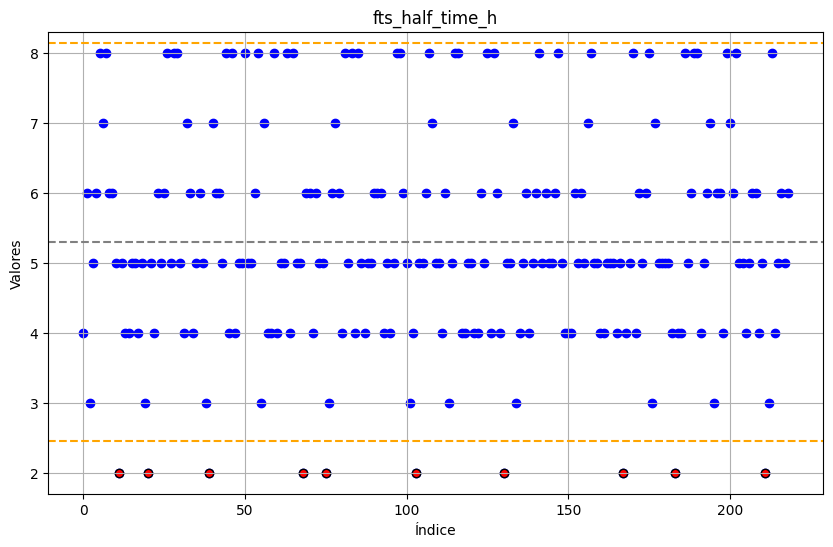

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5.296803652968037' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


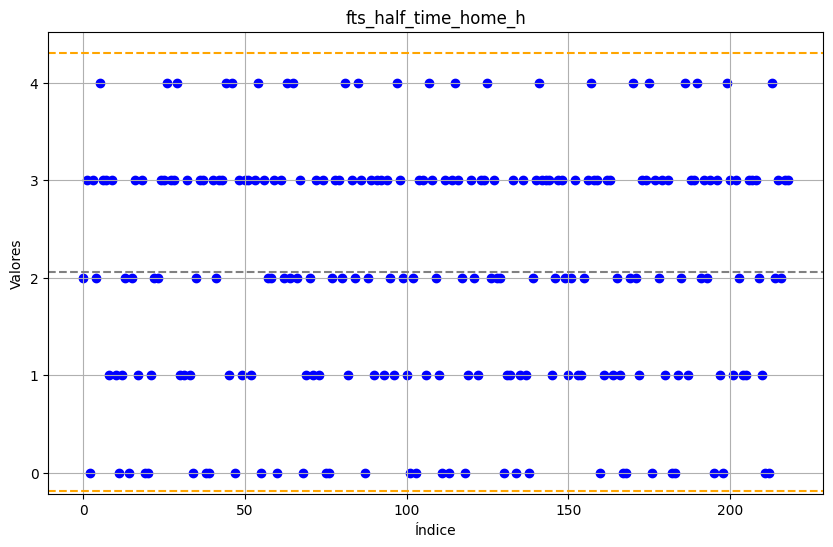

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.0593607305936072' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


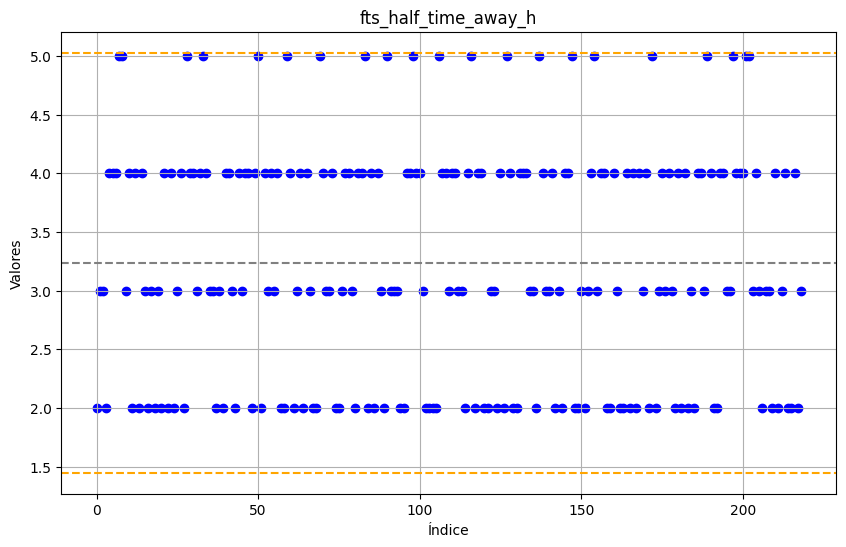

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.2374429223744294' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


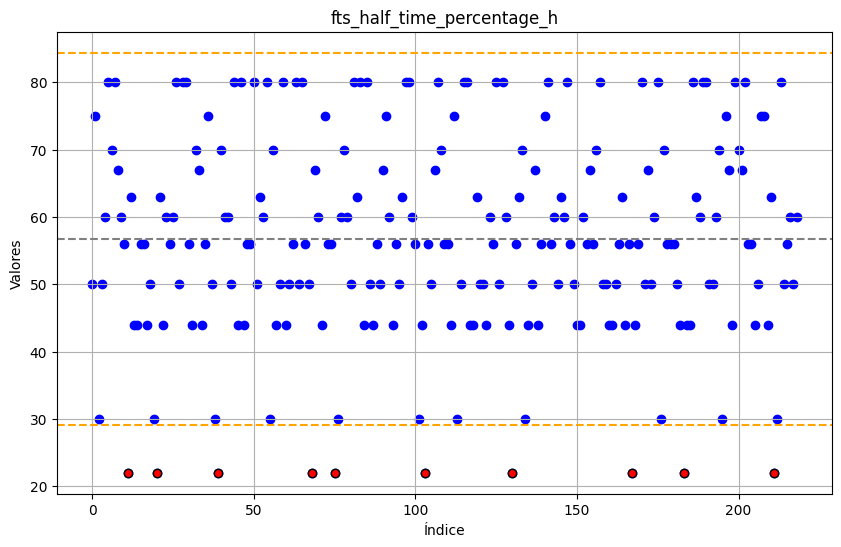

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '56.70319634703196' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


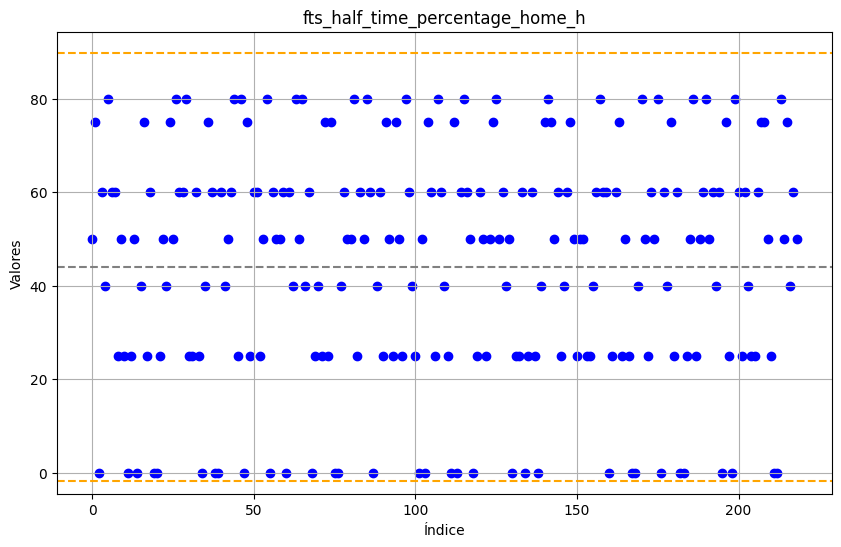

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '44.06392694063927' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


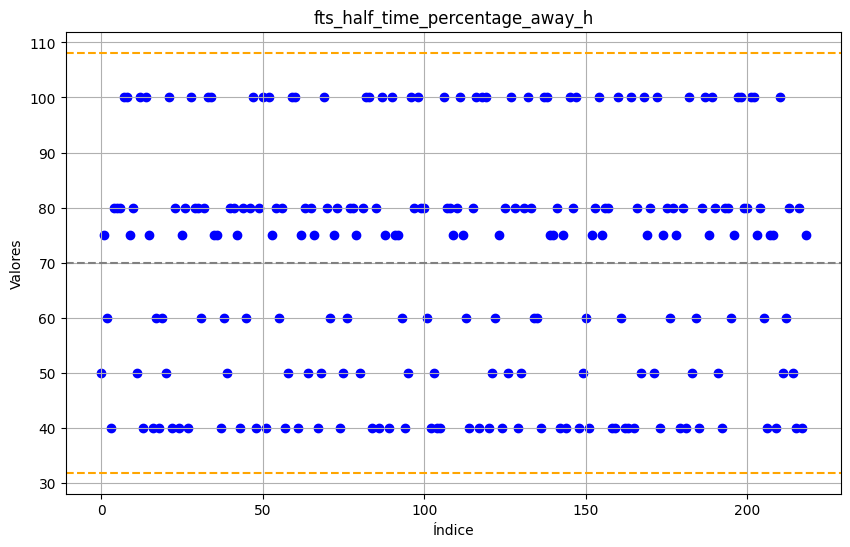

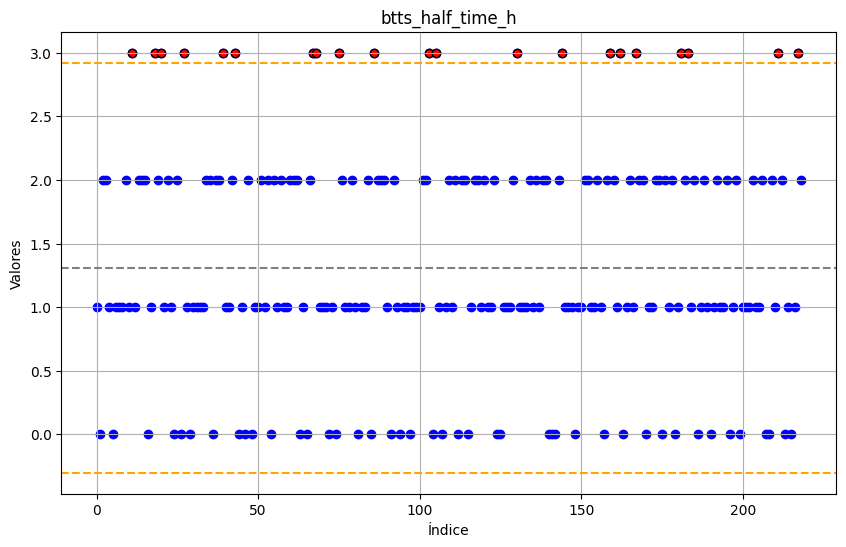

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3105022831050228' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


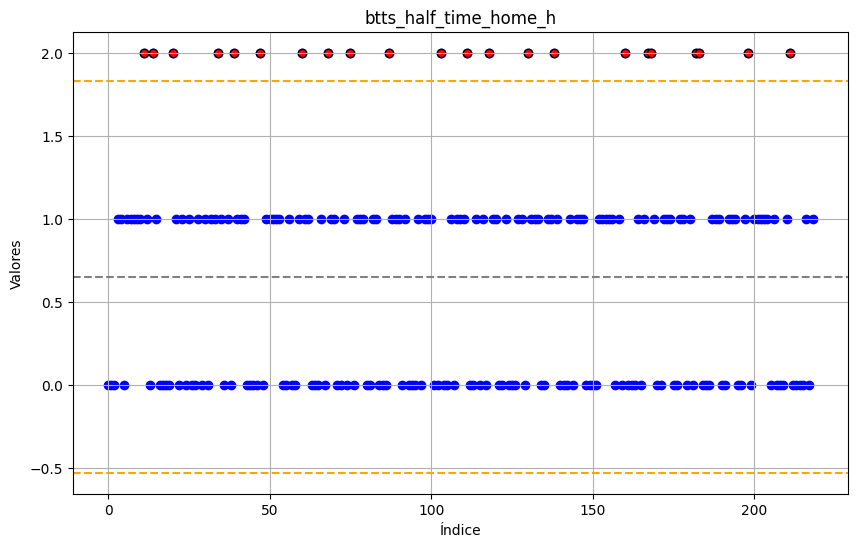

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6529680365296804' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


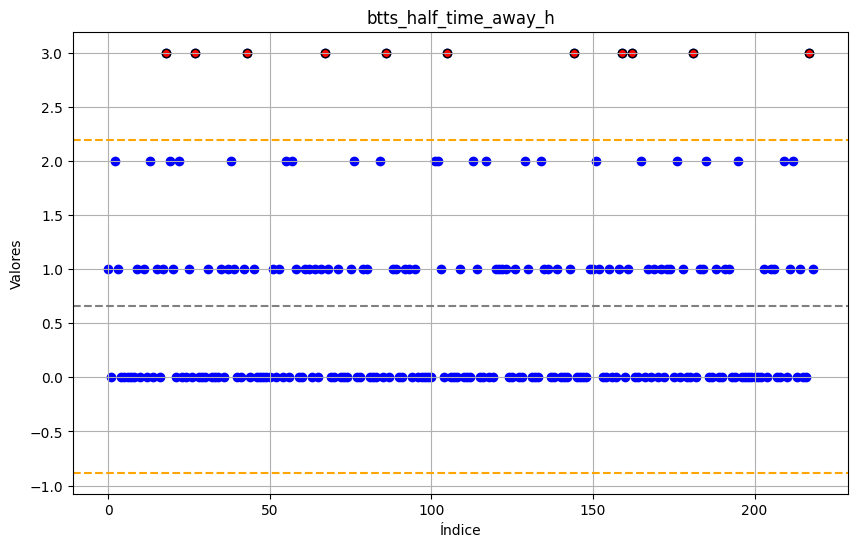

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6575342465753424' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


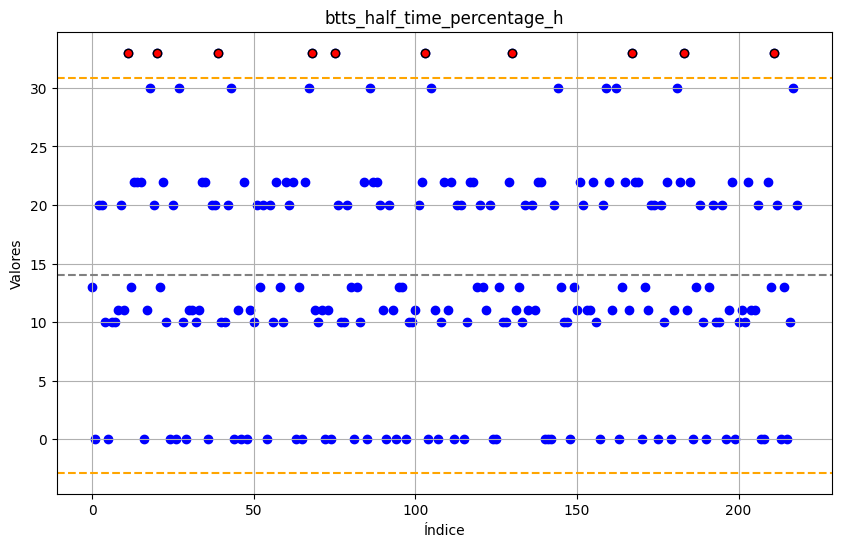

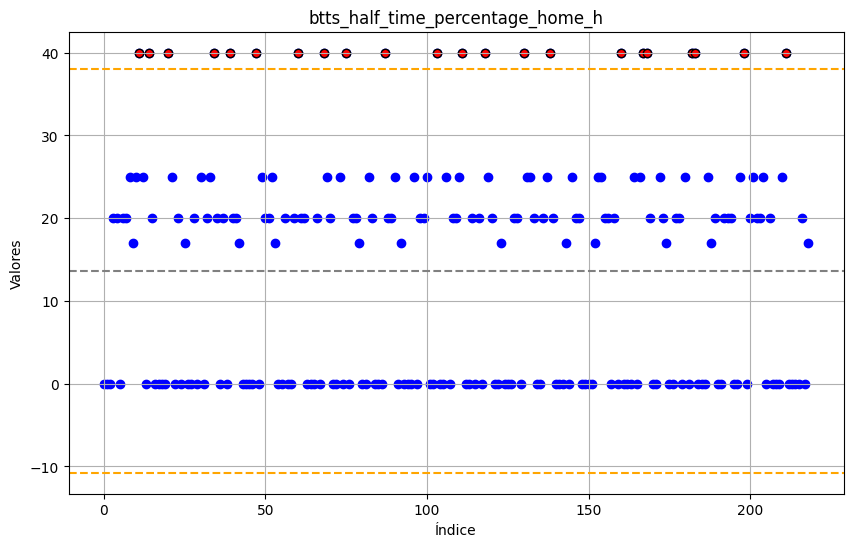

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.625570776255708' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


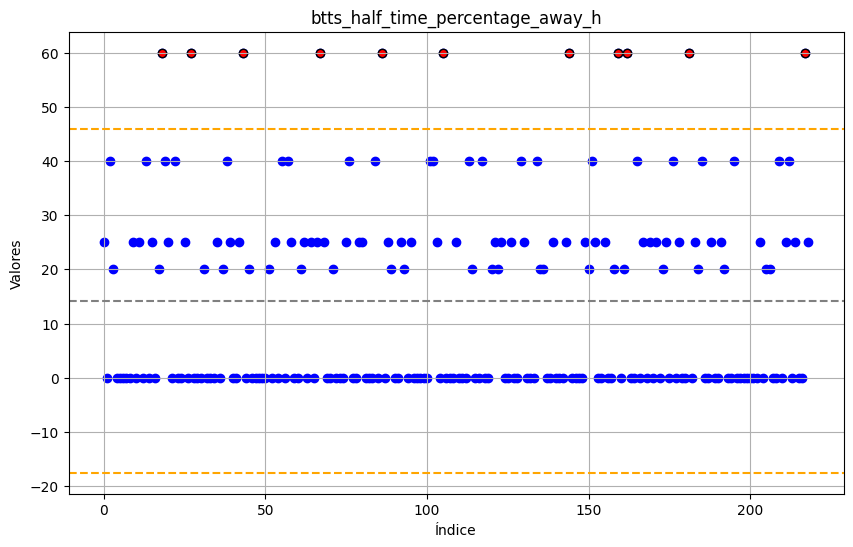

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.155251141552512' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


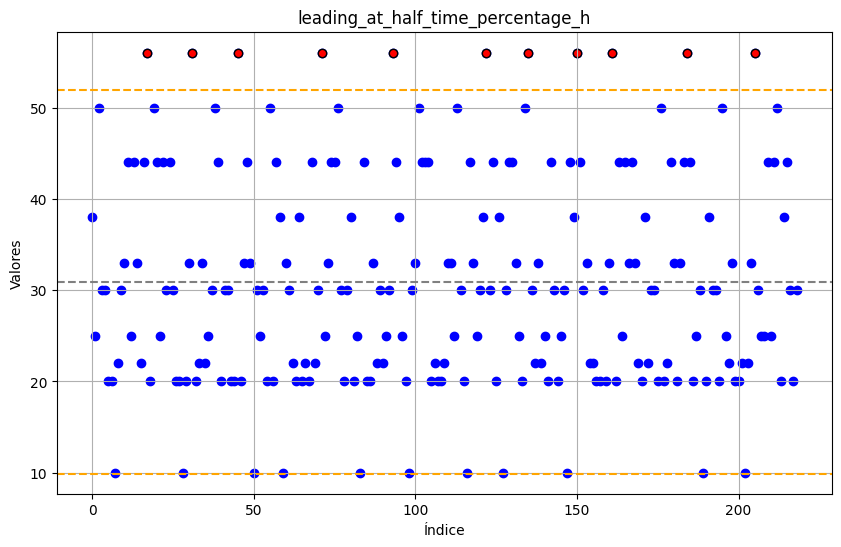

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.899543378995435' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


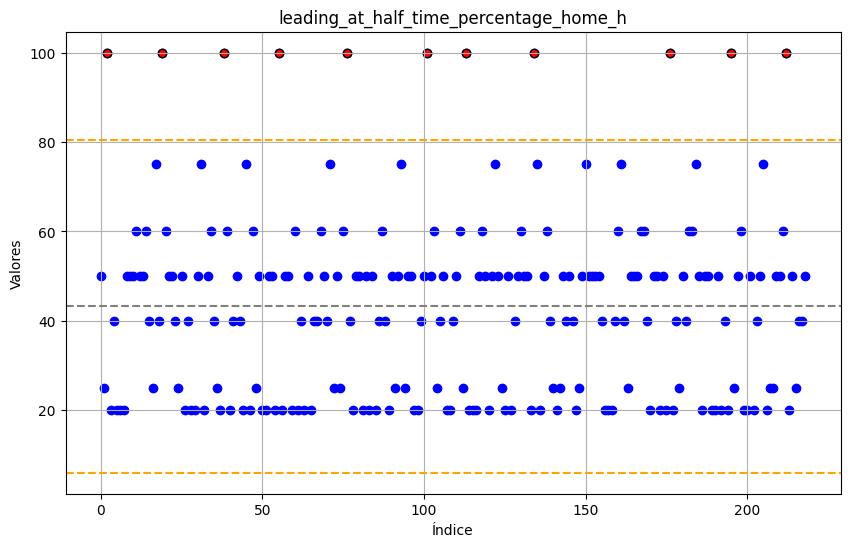

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '43.242009132420094' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


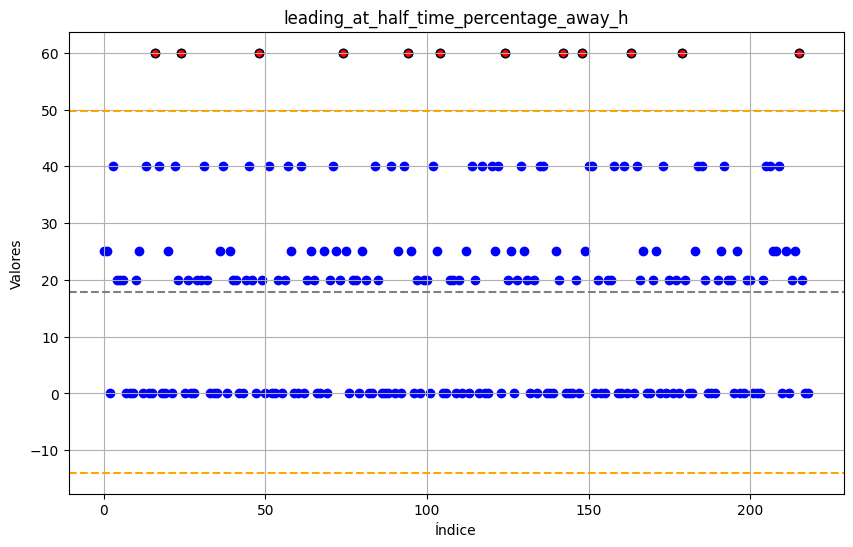

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.85388127853881' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


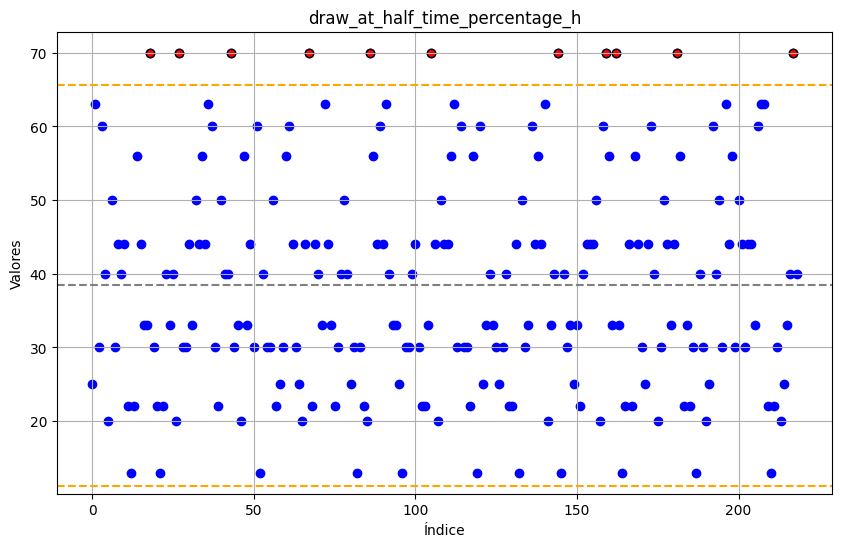

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.42922374429224' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


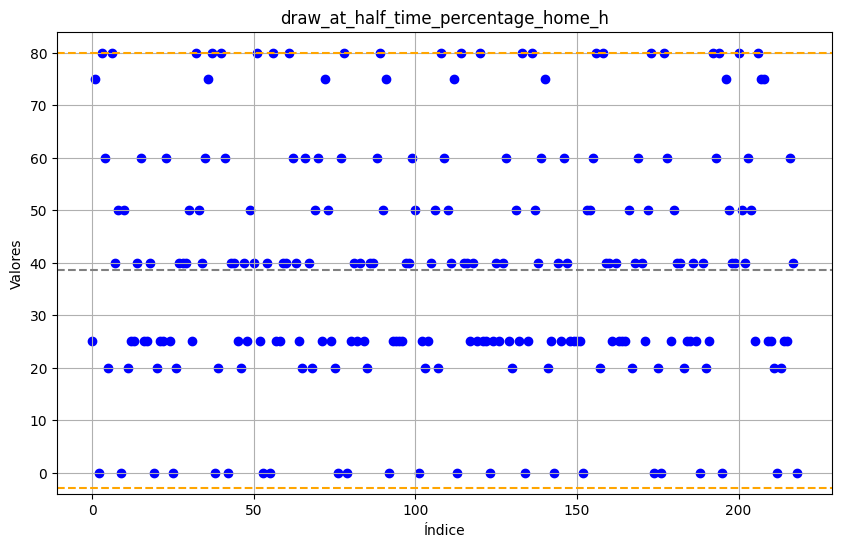

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.56164383561644' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


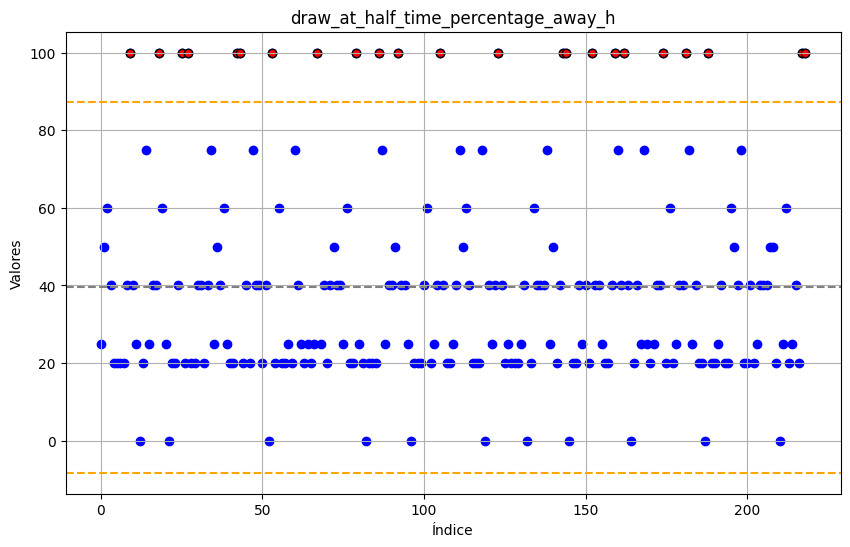

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '39.49771689497717' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


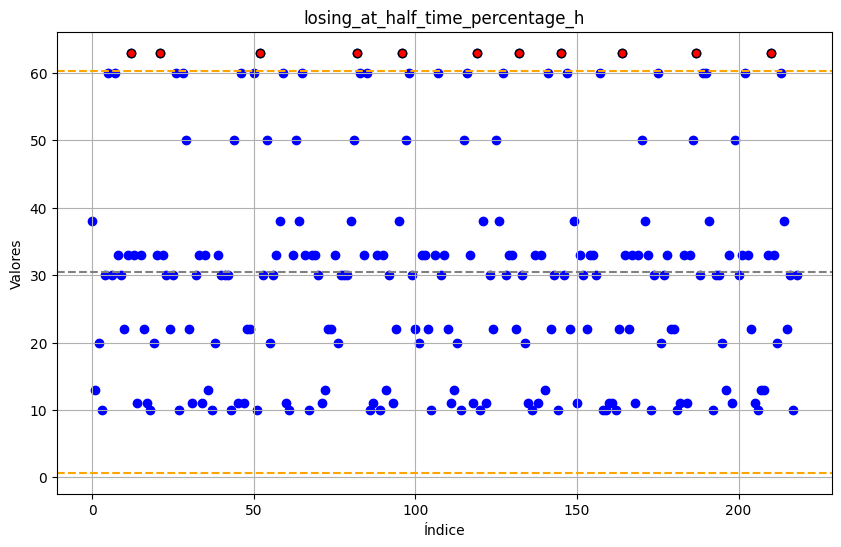

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '30.515981735159816' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


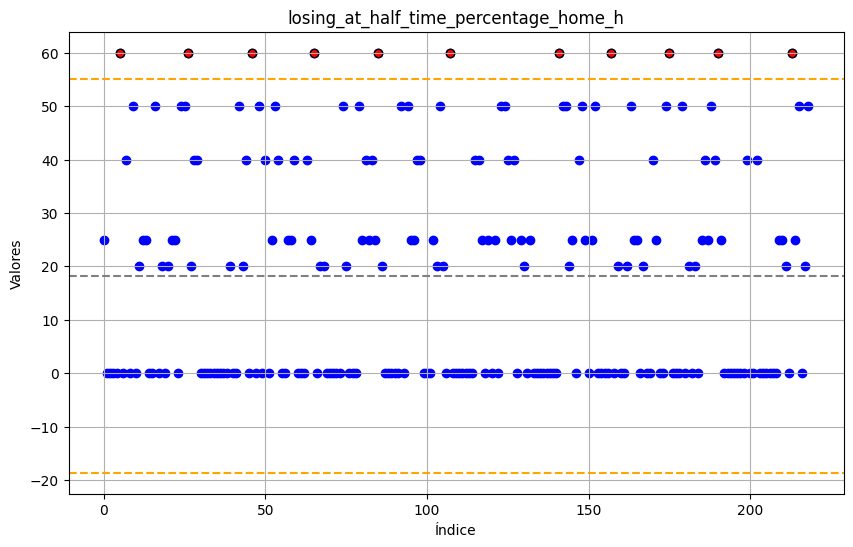

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18.19634703196347' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


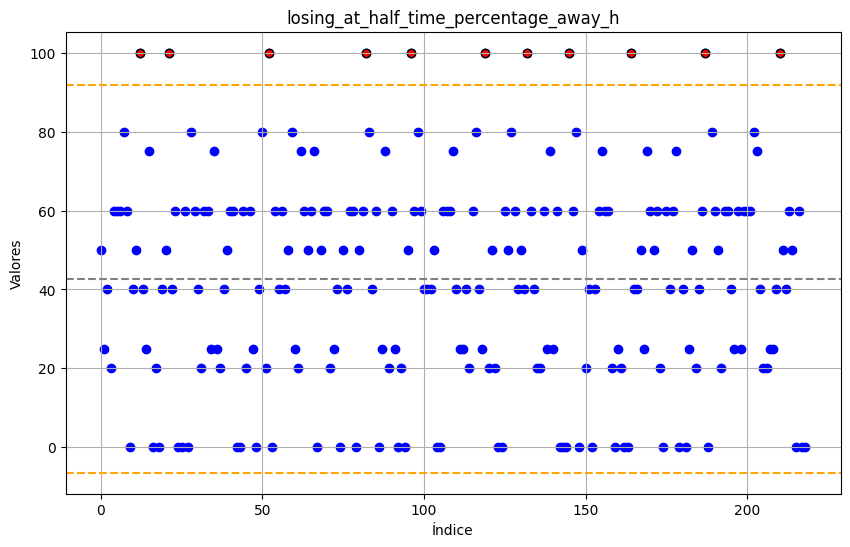

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '42.64840182648402' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


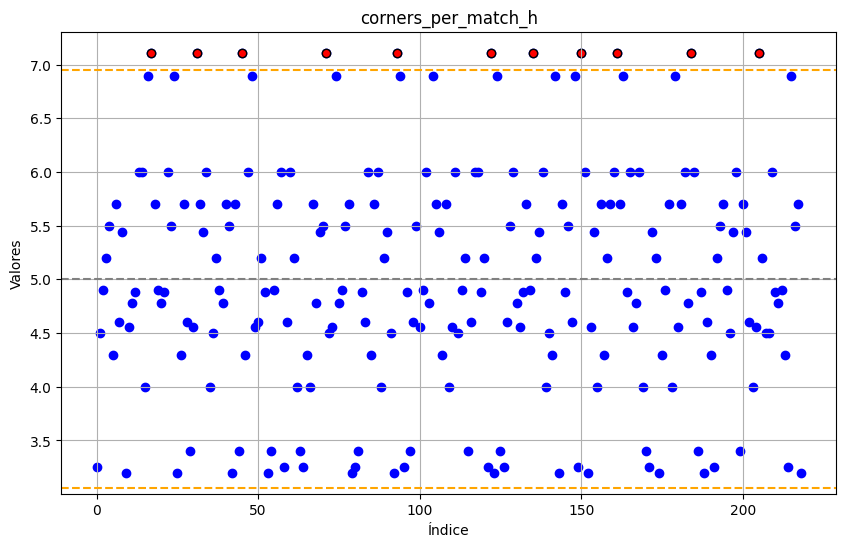

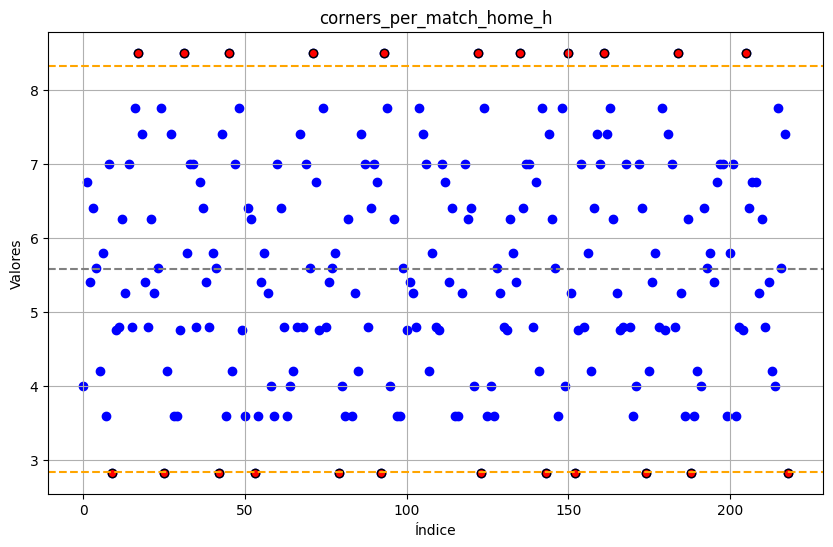

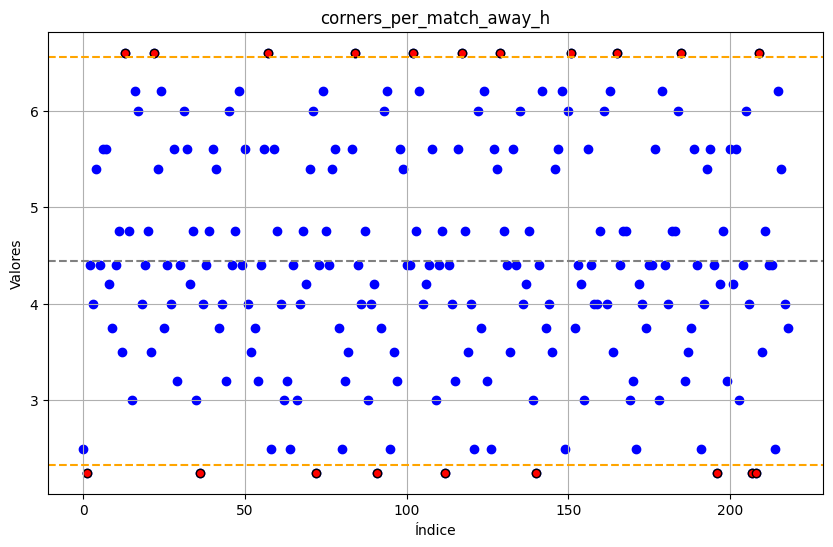

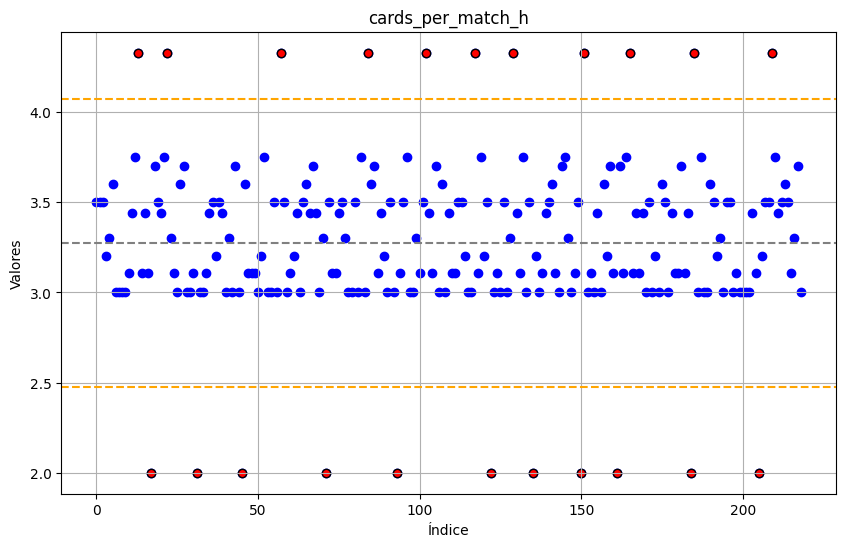

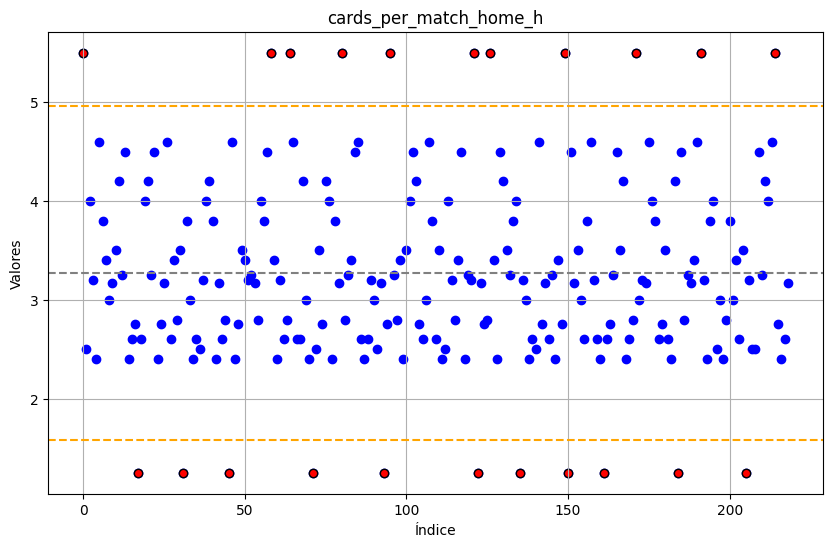

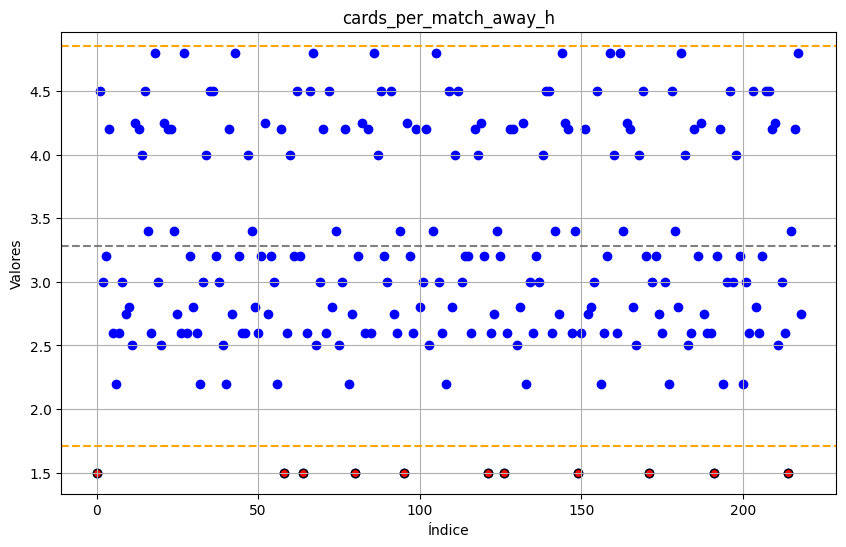

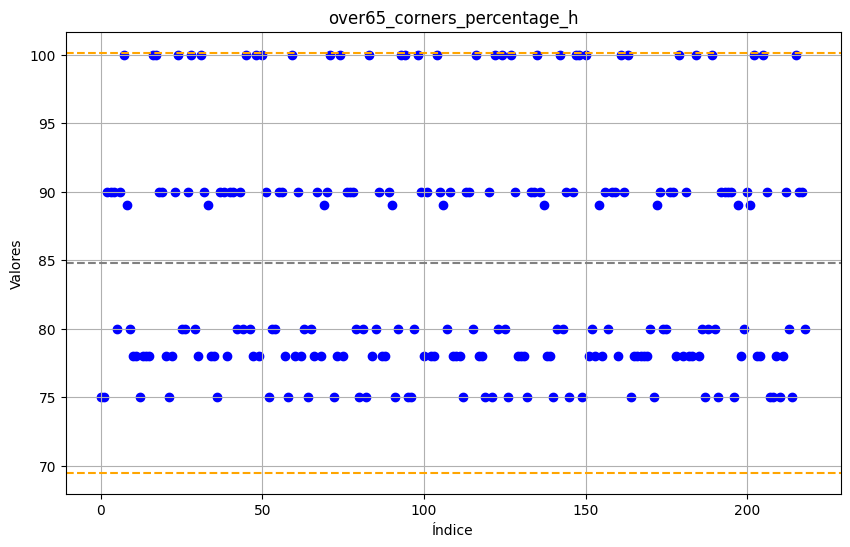

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '84.81735159817352' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


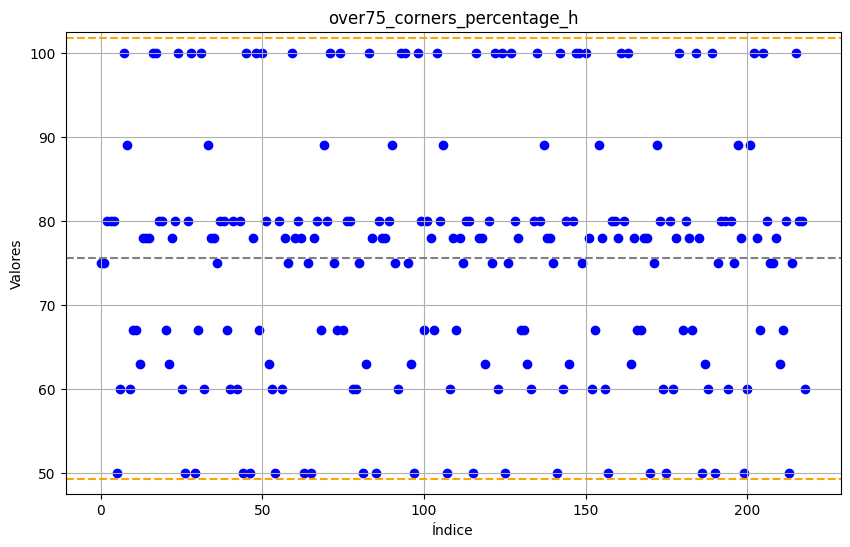

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '75.53424657534246' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


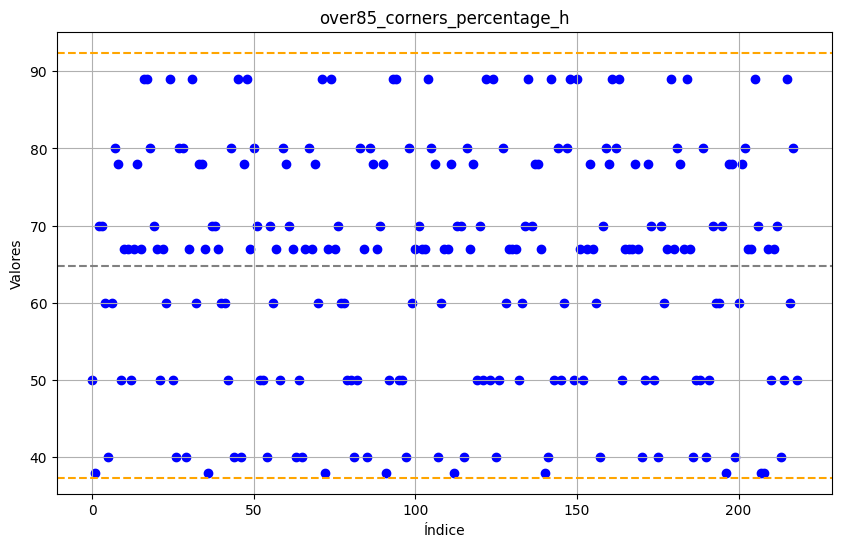

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '64.82191780821918' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


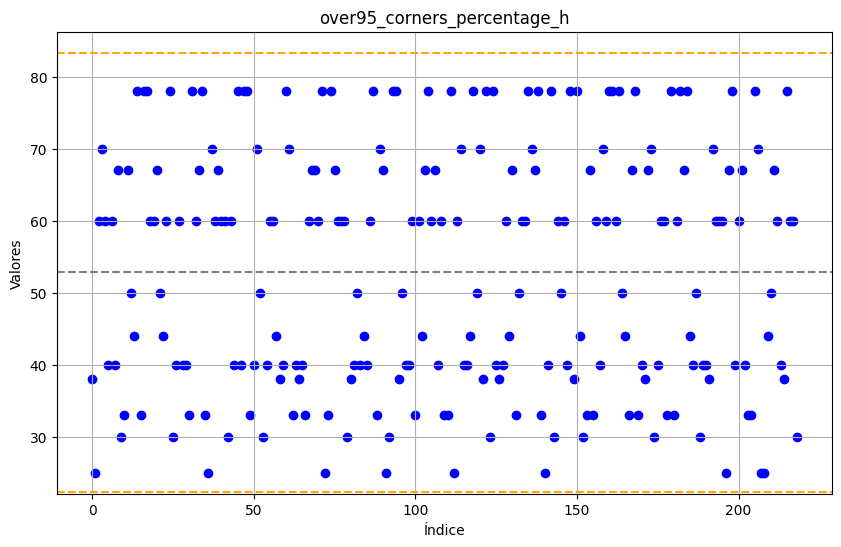

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '52.84474885844749' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


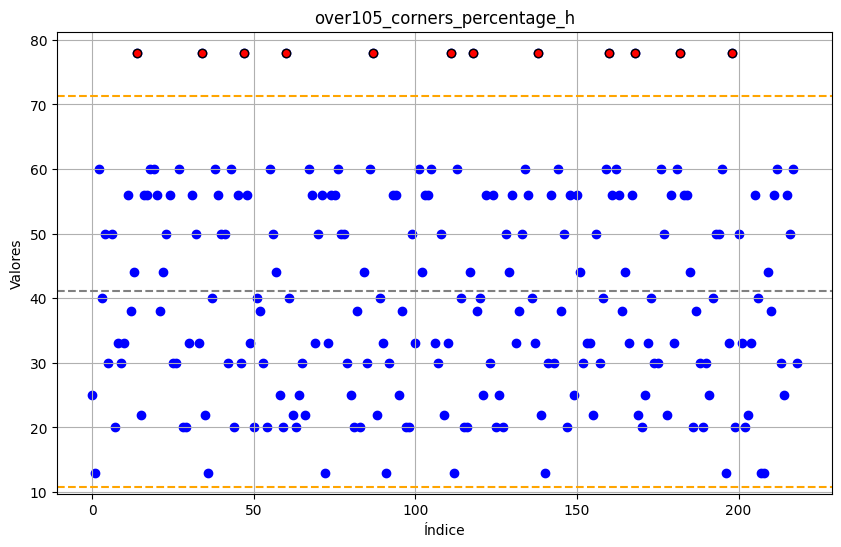

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '41.06392694063927' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


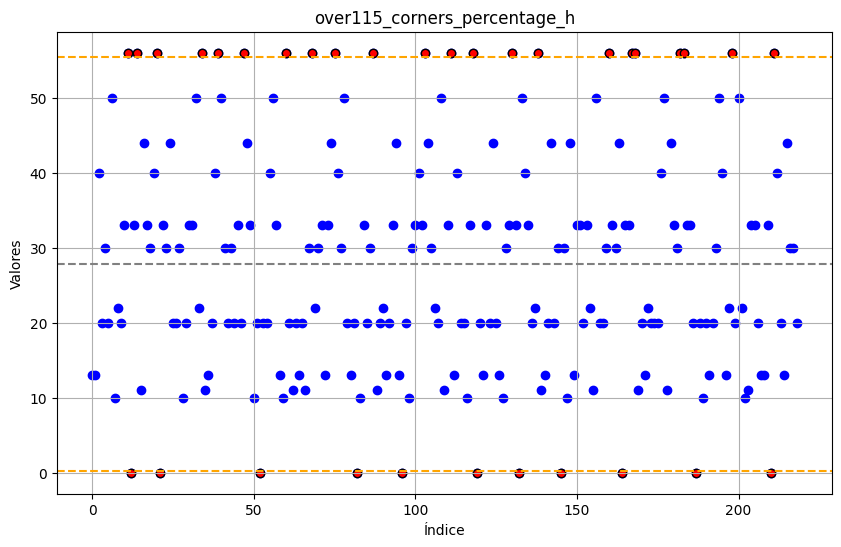

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.85388127853881' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


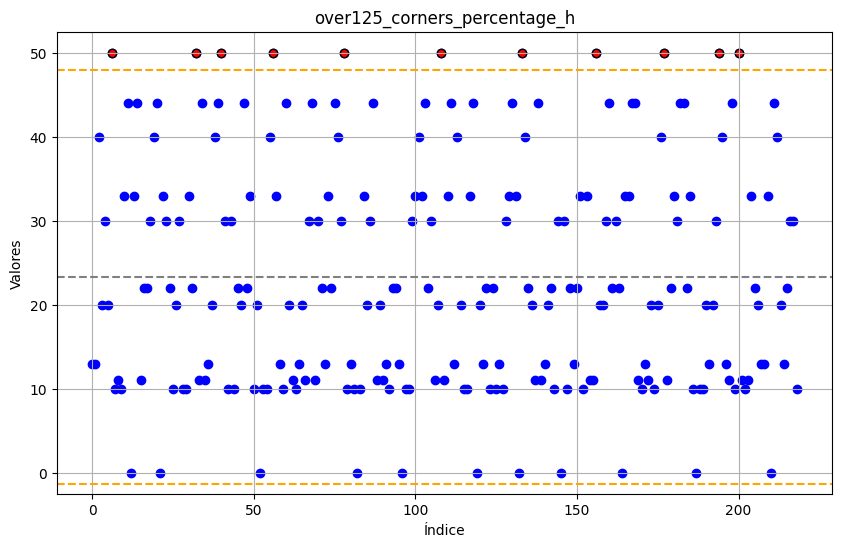

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '23.337899543378995' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


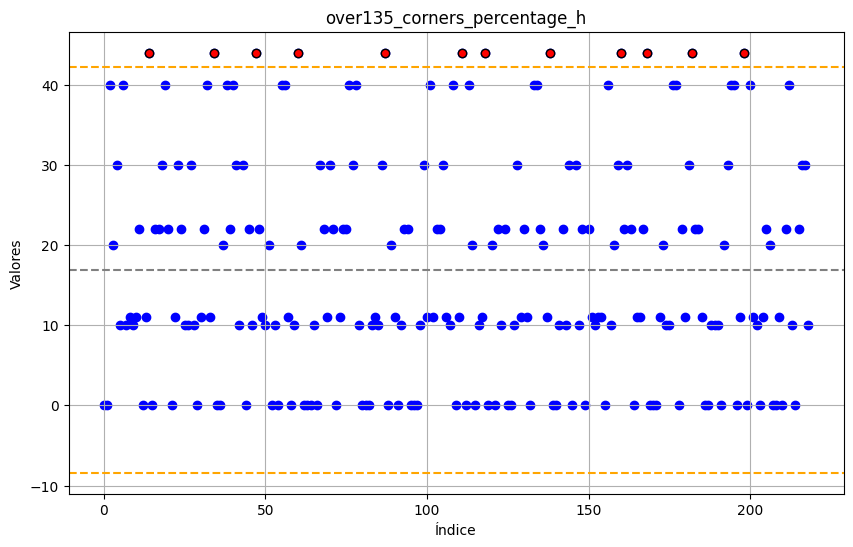

C:\Users\Inteli\AppData\Local\Temp\ipykernel_58456\3518426409.py:38: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16.876712328767123' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['is_outlier'], col] = mean


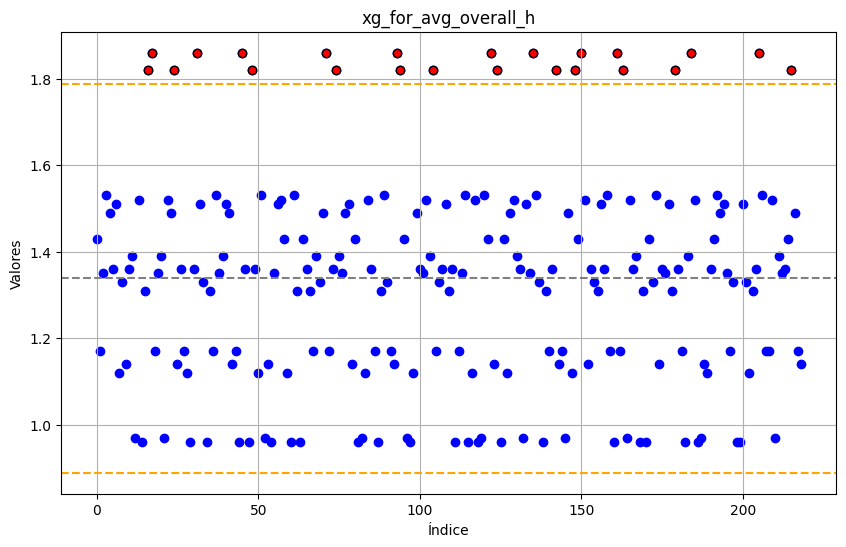

KeyboardInterrupt: 

In [7]:
# Tratamento de outliers
for col in data.columns:
    # Verifica se a coluna é numérica
    if np.issubdtype(data[col].dtype, np.number):
        mean = data[col].mean()
        std_dev = data[col].std()

        data['z_score'] = (data[col] - mean) / std_dev
        threshold = 1.8
        data['is_outlier'] = np.abs(data['z_score']) > threshold

        plt.figure(figsize=(10, 6))

        # Plotar todos os pontos
        plt.scatter(data.index, data[col], color='blue', label='Valores')

        # Plotar os outliers
        plt.scatter(data[data['is_outlier'].astype(bool)].index,
                    data[data['is_outlier'].astype(bool)][col],
                    color='red', label='Outliers', marker='o', edgecolor='black')

        # Adicionar títulos e legendas
        plt.title(col)
        plt.xlabel('Índice')
        plt.ylabel('Valores')
        plt.axhline(y=mean, color='gray', linestyle='--', label='Média')
        plt.axhline(y=mean + threshold * std_dev, color='orange', linestyle='--', label='Limite Superior (Média + 3*Desvio Padrão)')
        plt.axhline(y=mean - threshold * std_dev, color='orange', linestyle='--', label='Limite Inferior (Média - 3*Desvio Padrão)')
        # plt.legend()
        plt.grid(True)

        # Mostrar o gráfico
        plt.show()
        # sleep(2)
        # clear_output(wait=True)  # Clears the output after each iteration

        # Substitui pela média:
        data.loc[data['is_outlier'], col] = mean



# Removendo as colunas auxiliares
data = data.drop(columns=['z_score', 'is_outlier'])

In [12]:
# Define os dados que serão utilizados para treinar o modelo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [13]:
# Cria e treina o modelo do algoritmo Random Forest
randomForest = RandomForestClassifier(n_estimators=100, random_state=42)

randomForest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Calcula a acurácia do modelo
y_pred = randomForest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 62.12%


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.69      0.62        13
           1       0.68      0.71      0.69        35
           2       0.54      0.39      0.45        18

    accuracy                           0.62        66
   macro avg       0.59      0.60      0.59        66
weighted avg       0.62      0.62      0.61        66



<Axes: xlabel='Actual,Predicted'>

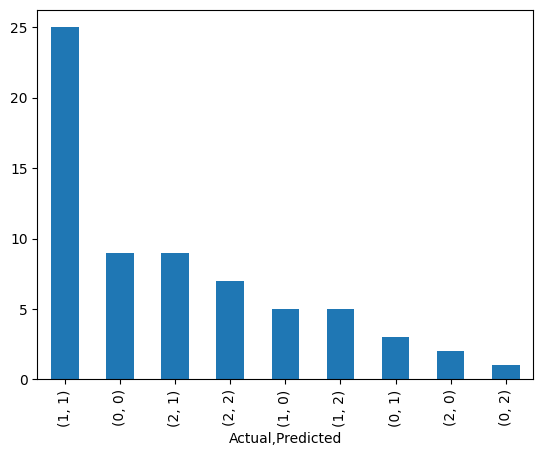

In [16]:
goals_object = {
    'Actual': y_test,
    'Predicted': y_pred,
}

goals_df = pd.DataFrame(goals_object)

goals_df.value_counts().plot(kind="bar", x='Actual', y='Predicted')

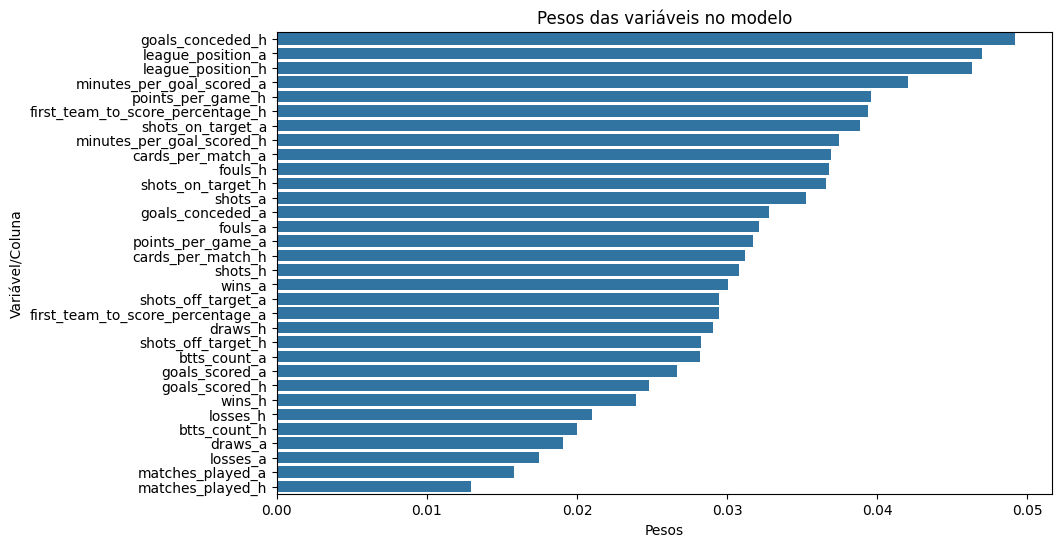

In [17]:
# Gráfico demonstrando o peso de cada variável

feature_importance = randomForest.feature_importances_

dataframe_feature_importance = pd.DataFrame({
    'Features': selected_tables,
    'Importance': feature_importance
})

dataframe_feature_importance = dataframe_feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=dataframe_feature_importance)
plt.title('Pesos das variáveis no modelo')
plt.xlabel('Pesos')
plt.ylabel('Variável/Coluna')
plt.show()

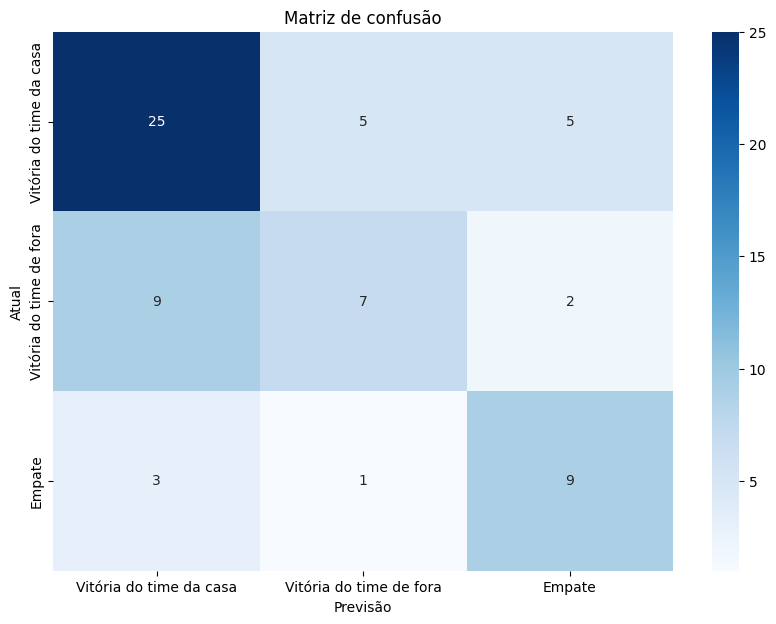

In [18]:
# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred, labels=[1, 2, 0])

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Vitória do time da casa', 'Vitória do time de fora', 'Empate'], yticklabels=['Vitória do time da casa', 'Vitória do time de fora', 'Empate'])
plt.xlabel('Previsão')
plt.ylabel('Atual')
plt.title('Matriz de confusão')
plt.show()